In [1934]:
import pandas as pd
import glob
import os
import re
import chardet
import json
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

import matplotlib
matplotlib.use('Agg')
import venn
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from difflib import SequenceMatcher

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams['legend.fontsize'] = '13'
plt.rcParams['axes.labelsize'] = '13'
plt.rcParams['axes.titlesize'] = '13'
plt.rcParams['lines.linewidth'] = '1'
plt.rcParams['xtick.labelsize'] = '13'
plt.rcParams['ytick.labelsize'] = '13'

plt.rcParams['grid.color'] = 'black'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['patch.facecolor'] = 'b'

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = '3'
plt.rcParams['ytick.major.size'] = '3'
plt.rcParams['xtick.major.width'] = '0.5'
plt.rcParams['ytick.major.width'] = '0.5'

plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.framealpha'] = None

## Load tshark data into memory

In [130]:
tshark_data = '/home/aniketh/devel/src/IoT-local/dataset/test-flows-noicmp'
tshark_data = '/home/aniketh/devel/src/IoT-local/dataset/test-flows'

In [131]:
df_list_1 = []

for csv_file in glob.glob(os.path.join(tshark_data, "*/*.csv")):
    split_path = re.split(r'(-\d{4}-\d{2}-\d{2})', csv_file)
    device_name = split_path[0].replace('/home/aniketh/devel/src/IoT-local/dataset/test-flows/', '')
    device_name = device_name.split('/')[0]
    with open(csv_file, 'rb') as f:
        result = chardet.detect(f.read())
        encoding = result['encoding']

    df = pd.read_csv(csv_file, encoding=encoding)

    df['device_name'] = device_name
    df['file_path'] = csv_file

    df_list_1.append(df)

# Concatenate all DataFrames into a single DataFrame
df_tshark = pd.concat(df_list_1, ignore_index=True)

In [132]:
df_tshark

,stream_id,trans_protocol,src_ip,dst_ip,src_port,dst_port,Protocol,device_name,file_path
0,0,17,192.168.10.201,192.168.10.254,68,67,DHCP,echospot,/home/aniketh/devel/src/IoT-local/dataset/test...
1,0,6,192.168.10.123,192.168.10.201,60596,55443,TLS,echospot,/home/aniketh/devel/src/IoT-local/dataset/test...
2,1,17,192.168.10.201,224.0.0.251,5353,5353,MDNS,echospot,/home/aniketh/devel/src/IoT-local/dataset/test...
3,1,6,192.168.10.226,192.168.10.201,51990,55443,TLS,echospot,/home/aniketh/devel/src/IoT-local/dataset/test...
4,10,17,192.168.10.193,192.168.10.201,50870,50000,UDP,echospot,/home/aniketh/devel/src/IoT-local/dataset/test...
...,...,...,...,...,...,...,...,...,...
560022,95,17,192.168.10.174,255.255.255.255,55050,34571,UDP,icsee-doorbell,/home/aniketh/devel/src/IoT-local/dataset/test...
560023,96,17,192.168.10.174,255.255.255.255,51133,34571,UDP,icsee-doorbell,/home/aniketh/devel/src/IoT-local/dataset/test...
560024,97,17,192.168.10.174,255.255.255.255,57217,34571,UDP,icsee-doorbell,/home/aniketh/devel/src/IoT-local/dataset/test...
560025,98,17,192.168.10.174,255.255.255.255,50523,34571,UDP,icsee-doorbell,/home/aniketh/devel/src/IoT-local/dataset/test...


In [146]:
df_tshark['Protocol'].unique()

array(['DHCP', 'TLS', 'MDNS', 'UDP', 'TCP', 'HTTP', 'IRC', 'SSDP', 'RTCP',
       'MANOLITO', 'AMS', 'ICMP', 'TPLINK-SMARTHOME', 'ENIP', 'PMPROXY',
       'GRE', 'STUN', 'AJP13', 'RSIP', 'LISP', 'MIH', 'IAX2', 'IO-RAW',
       'UDP;QUICRTCP', 'QUIC', 'ATH', 'Gryphon', 'TPCP', 'GSMTAP',
       'AX4000', 'VxLAN', 'ESP', 'RakNet', 'CoAP', 'KNXnet', 'TZSP',
       'ADwinConfig'], dtype=object)

In [149]:
df_tshark['Protocol'] = df_tshark['Protocol'].replace('THRIFTRTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('QUICRTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('THRIFT;UDPRTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('0x0007;TCP;TC-NV;ECATF', 'TCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;IO-RAW;AMS;0x0000', 'IO-RAW')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;IO-RAW;0x0008;0x0000', 'IO-RAW')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-AF;UDPRTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-AF;UDP;THRIFTRTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;QUICRTCP', 'RTCP')



In [134]:
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;?', 'TCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('?;TCP', 'TCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('ENIP;TCP', 'ENIP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('CBSP;TCP', 'TCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TC-NV;0x0007;TCP;ECATF', 'TCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;0x0007;TC-NV;ECATF', 'TCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;CBSP', 'TCP')

df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;?KNXnet/IP', 'KNXnet')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('?KNXnet/IP', 'KNXnet')

df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;THRIFT;CLTPRTCP', 'THRIFT')


df_tshark['Protocol'] = df_tshark['Protocol'].replace('IRC;TCP', 'IRC')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;IRC', 'IRC')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;0x0000', 'TCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('0x0000;TCP', 'TCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('Gryphon;TCP', 'Gryphon')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('AMS;TCP', 'AMS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;AMS', 'AMS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;0x0000;IO-RAW;AMS', 'IO-RAW')

df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;DCP-PFT;CLTPRTCP', 'DCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;QUIC;DCP-PFT;CLTPRTCP', 'DCP')



df_tshark['Protocol'] = df_tshark['Protocol'].replace('?', 'unknown')

df_tshark['Protocol'] = df_tshark['Protocol'].replace('SSDP;ICMP', 'SSDP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('ICMP;SSDP', 'SSDP')

df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;ICMP', 'UDP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('ICMP;UDP', 'UDP')


df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;QUIC', 'QUIC')


df_tshark['Protocol'] = df_tshark['Protocol'].replace('DHCP;ICMP', 'DHCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('ICMP;DHCP', 'DHCP')


df_tshark['Protocol'] = df_tshark['Protocol'].replace('MDNS;ICMP', 'MDNS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('ICMP;MDNS', 'MDNS')

In [135]:
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-AF;UDP;DCP-PFT;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-AF;DCP-PFT;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-PFT;DCP-AF;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;DCP-PFT;DCP-AF;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-PFT;DCP-AF;UDP;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;DCP-PFT;RTCP', 'RTCP')

df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;DCP-AF;DCP-PFT;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-AF;DCP-PFT;UDP;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-PFT;UDP;DCP-AF;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;DCP-AF;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-AF;UDP;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-AF;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-PFT;RTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-PFT;UDP;RTCP', 'RTCP')


In [136]:
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1.2;TCP;TLSv1;SSL', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1.2;TCP;TLSv1', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;TLSv1;TLSv1.2', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1;TLSv1.2;SSL;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1;TLSv1.2;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1.2;TLSv1;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1.2;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;TLSv1.2', 'TLS')

df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;ENIP', 'ENIP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;Gryphon', 'Gryphon')


df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;AJP13', 'AJP13')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('AJP13;TCP', 'AJP13')


df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;SSL;TLSv1', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1;TLSv1.3;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1;SSL;TCP;TLSv1.2', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1.2;SSL;TCP;TLSv1', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;TLSv1.2;SSL;TLSv1', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;TLSv1;TLSv1.3', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1;TLSv1.2;TCP;SSL', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1.2;TLSv1;SSL;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1;TCP;SSL', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1.2;TCP;SSL;TLSv1', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1.2;TLSv1;TCP;SSL', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1.3;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1.3;TCP;TLSv1', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1.3;TLSv1;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('SSL;TLSv1;TCP;TLSv1.2', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('SSL;TLSv1;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;SSL;TLSv1;TLSv1.2', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('SSL;TCP;TLSv1.2;TLSv1', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;TLSv1.2;TLSv1', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;TLSv1', 'TLS')

In [137]:
df_tshark['Protocol'] = df_tshark['Protocol'].replace('HTTP;TCP', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('HTTP/JSON;TCP;HTTP', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('HTTP/XML;TCP', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('HTTP;TCP;HTTP/XML', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('HTTP/XML;HTTP;TCP', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('HTTP/JSON;HTTP;TCP', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;HTTP', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('HTTP;HTTP/XML;TCP', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;HTTP/XML;HTTP', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;HTTP/JSON', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('HTTP/JSON;TCP', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('HTTP;HTTP/JSON;TCP', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('HTTP;TCP;HTTP/JSON', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('HTTP/XML;TCP;HTTP', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;HTTP;HTTP/JSON', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;HTTP/JSON;HTTP', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;HTTP;HTTP/XML', 'HTTP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;HTTP/XML', 'HTTP')

df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1;TCP;TLSv1.2', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1;TCP;TLSv1.2;SSL', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;TLSv1;SSL;TLSv1.2', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;TLSv1.2;TLSv1;SSL', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1;SSL;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;TLSv1;TLSv1.2;SSL', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1;TCP;TLSv1.3', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('SSL;TLSv1.2;TCP;TLSv1', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('SSL;TLSv1;TLSv1.2;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('SSL;TLSv1.2;TLSv1;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1.2;SSL;TLSv1;TCP', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;TLSv1.3;TLSv1', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;TLSv1.3', 'TLS')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TLSv1;TCP;SSL;TLSv1.2', 'TLS')


df_tshark['Protocol'] = df_tshark['Protocol'].str.replace('RTCP.*', 'RTCP', regex=True)
df_tshark['Protocol'] = df_tshark['Protocol'].str.replace(';RTCP.*', 'RTCP', regex=True)

df_tshark['Protocol'] = df_tshark['Protocol'].replace('CLASSIC-STUN', 'STUN')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('CLASSIC-STUN;ICMP', 'STUN')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('ICMP;CLASSIC-STUN', 'STUN')


df_tshark['Protocol'] = df_tshark['Protocol'].replace('0x0000;0x0008;IO-RAW;TCP', 'IO-RAW')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('0x0000;TCP;IO-RAW;AMS', 'IO-RAW')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('0x0000;TCP;AMS;IO-RAW', 'IO-RAW')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;0x0008;IO-RAW;0x0000', 'IO-RAW')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;0x0008;0x0000;IO-RAW', 'IO-RAW')

df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-PFT;QUIC;UDPRTCP', 'QUIC')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('QUIC;UDP', 'QUIC')

In [138]:
df_tshark['Protocol'] = df_tshark['Protocol'].str.replace('RTCP.*', 'RTCP', regex=True)
df_tshark['Protocol'] = df_tshark['Protocol'].str.replace(';RTCP.*', 'RTCP', regex=True)

df_tshark['Protocol'] = df_tshark['Protocol'].replace('RTCP;DCP-PFT;DCP-AF;UDP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;RTCP;QUIC', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-PFT;QUIC;UDP;RTCP', 'RTCP')

df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-PFT;UDPRTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-PFTRTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-AFRTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDPRTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;DCP-AFRTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-PFT;DCP-AFRTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;DCP-PFTRTCP', 'RTCP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('DCP-AF;DCP-PFTRTCP', 'RTCP')


df_tshark['Protocol'] = df_tshark['Protocol'].replace('PCP;PMPROXY;TCP', 'PMPROXY')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;PCP;PMPROXY', 'PMPROXY')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;PMPROXY', 'PMPROXY')

df_tshark['Protocol'] = df_tshark['Protocol'].replace('PMPROXY;TCP', 'PMPROXY')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('PCP;TCP;PMPROXY', 'PMPROXY')


df_tshark['Protocol'] = df_tshark['Protocol'].replace('BAT_BATMAN', 'UDP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('BAT_GW', 'UDP')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('BAT_VIS', 'UDP')




df_tshark['Protocol'] = df_tshark['Protocol'].replace('TPLINK-SMARTHOME/JSON', 'TPLINK-SMARTHOME')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('TCP;TPLINK-SMARTHOME/JSON', 'TPLINK-SMARTHOME')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;THRIFT;DCP-PFTRTCP', 'THRIFT')
df_tshark['Protocol'] = df_tshark['Protocol'].replace('UDP;THRIFT;DCP-PFT;CLTPRTCP', 'THRIFT')

In [150]:
df_tshark_grouped = df_tshark[['Protocol', 'device_name']].groupby('Protocol').nunique()
df_sorted = df_tshark_grouped.sort_values(by='device_name', ascending=False)

In [151]:
df_sorted = df_sorted.drop(['TCP', 'UDP', 'QUIC'], axis=0)
df_sorted

,device_name
Protocol,
DHCP,86
ICMP,76
MDNS,41
HTTP,35
TLS,32
SSDP,29
TPLINK-SMARTHOME,23
IRC,18
RTCP,17


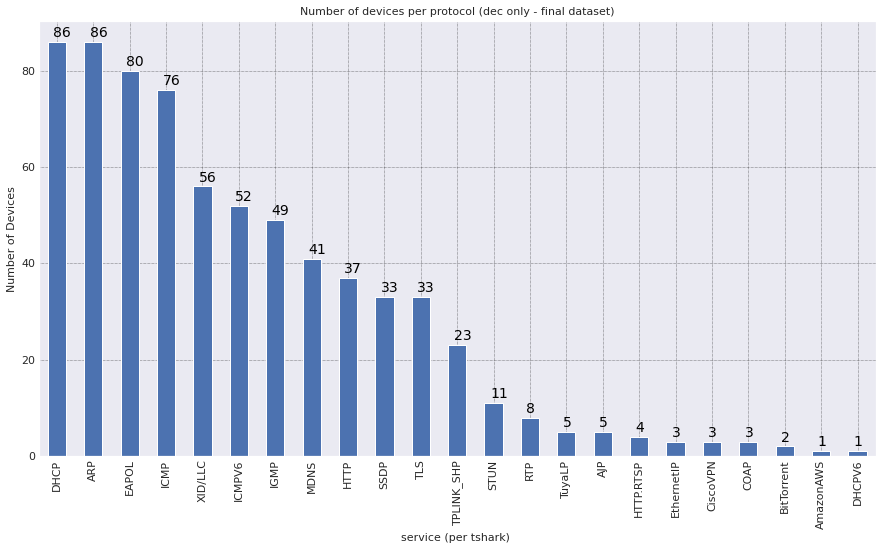

In [749]:
ax = df_sorted.plot(kind='bar', rot=90, figsize=(15, 8), legend=False)
ax.set_xlabel('service (per tshark) ')
ax.set_ylabel('Number of Devices')
ax.set_title('Number of devices per protocol (dec only - final dataset)')

# Add the numbers on top of each bar
for i, v in enumerate(df_sorted['device_name']):
    ax.text(i - 0.1, v + 1, str(v), color='black', fontsize=14)

plt.show()

## Load bro data to memory

In [102]:
def read_conn_log_files(root_dir):
    data = []
    for device_dir in os.listdir(root_dir):
        device_path = os.path.join(root_dir, device_dir)
        if os.path.isdir(device_path):
            for date_dir in os.listdir(device_path):
                date_path = os.path.join(device_path, date_dir)
                if os.path.isdir(date_path):
                    conn_log_path = os.path.join(date_path, 'conn.log')
                    if os.path.isfile(conn_log_path):
                        with open(conn_log_path, 'r') as file:
                            for line in file:
                                try:
                                    conn_data = json.loads(line.strip())
                                    conn_data.update({"device": device_dir, "date": date_dir})
                                    data.append(conn_data)
                                except json.JSONDecodeError as e:
                                    print(f"Error parsing {conn_log_path}: {e}")

    df = pd.DataFrame(data)
    return df

In [103]:
DEC_parsed = "/home/aniketh/devel/src/IoT-local/results/bro_results/dec_parsed"

df_zeek = read_conn_log_files(DEC_parsed)

## Loading ndpi data (with guessing) to memory

In [1804]:
ndpi_dec = '/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing'

df_list = []

# Specify the columns you want to keep
# columns_to_keep = ['#flow_id', 'protocol', 'first_seen', 'last_seen', 'duration', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'ndpi_proto_num', 'ndpi_proto', 'proto_by_ip', 'server_name_sni',
#                   'server_info', 'tls_version', 'ja3c', 'tls_client_unsafe', 'ja3s', 'tls_server_unsafe', 'advertised_alpns', 'negotiated_alpn', 'tls_supported_versions', 'ssh_client_hassh', 'ssh_server_hassh', 'flow_info', 'plen_bins',
#                   'http_user_agent']

columns_to_keep = ['#flow_id', 'protocol', 'first_seen', 'last_seen', 'duration', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'ndpi_proto_num', 'ndpi_proto', 'server_name_sni',
                  'server_info', 'tls_version', 'ja3c', 'tls_client_unsafe', 'ja3s', 'tls_server_unsafe', 'advertised_alpns', 'negotiated_alpn', 'tls_supported_versions', 'ssh_client_hassh', 'ssh_server_hassh', 'flow_info', 'plen_bins',
                  'http_user_agent']

for csv_file in glob.glob(os.path.join(ndpi_dec, "*.csv")):
    split_path = re.split(r'(-\d{4}-\d{2}-\d{2})', csv_file)
    device_name = split_path[0].replace('/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/', '')
    with open(csv_file, 'rb') as f:
        result = chardet.detect(f.read())
        encoding = result['encoding']

    df = pd.read_csv(csv_file, usecols=columns_to_keep, index_col=False)

    df['device_name'] = device_name
    df['file_path'] = csv_file

    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
df_ndpi = pd.concat(df_list, ignore_index=True)

In [ ]:
df_ndpi[['src_ip', 'src_port', 'dst_ip', 'dst_port', 'ndpi_proto', 'device_name']][df_ndpi['ndpi_proto'] == 'SSDP']

In [1899]:
non_standard_port_df = df_ndpi[(df_ndpi['ndpi_proto'] == 'SSDP') & (df_ndpi['src_port'] != 1900) & (df_ndpi['dst_port'] != 1900)]

num_devices = non_standard_port_df['device_name'].nunique()
print('Number of devices using non-standard port for SSDP: ', num_devices)


Number of devices using non-standard port for SSDP:  30


In [1900]:
unique_flows = df_ndpi.drop_duplicates(subset=['src_ip', 'src_port', 'dst_ip', 'dst_port', 'protocol'])
unique_flows

,#flow_id,protocol,first_seen,last_seen,duration,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,ndpi_proto,server_name_sni,server_info,tls_version,ja3c,tls_client_unsafe,ja3s,tls_server_unsafe,advertised_alpns,negotiated_alpn,tls_supported_versions,ssh_client_hassh,ssh_server_hassh,flow_info,plen_bins,http_user_agent,device_name,file_path
0,65,58,1.672269e+09,1.672269e+09,0.000,::,0,ff02::1:ff08:97c5,0,102.0,ICMPV6,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
1,137,58,1.672276e+09,1.672276e+09,0.000,::,0,ff02::1:fffb:edc8,0,102.0,ICMPV6,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
2,68,58,1.672269e+09,1.672269e+09,0.000,::,0,ff02::1:ffb3:dbd0,0,102.0,ICMPV6,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
3,107,17,1.672273e+09,1.672273e+09,0.001,192.168.10.153,35211,192.168.10.193,10006,78.0,STUN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
4,69,58,1.672269e+09,1.672269e+09,0.000,::,0,ff02::1:ffc8:ffd7,0,102.0,ICMPV6,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550492,43,6,1.671867e+09,1.671867e+09,0.169,192.168.10.207,50712,192.168.10.107,7000,7.5,HTTP.RTSP,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0;33;0;0;0;0;0;0;0;0;0;0;0;33;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;33;0;0,NaN,homepod,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/homepod-2022-12-23_02.48.39_192.168.10.107.csv
550508,26,6,1.671849e+09,1.671865e+09,15183.442,192.168.10.207,63630,192.168.10.107,50102,91.0,TLS,NaN,NaN,TLSv1.3,bb380deb6d79afcbb33065ead1ffa0ce,OK,eb1d94daa7e0344597e756a1fb6e7054,OK,http/1.1,NaN,GREASE;TLSv1.3;TLSv1.2;TLSv1.1;TLSv1,NaN,NaN,NaN,50;25;0;0;0;0;0;0;0;25;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,homepod,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/homepod-2022-12-23_02.48.39_192.168.10.107.csv
550509,27,6,1.671849e+09,1.671849e+09,30.641,192.168.10.207,63633,192.168.10.107,50102,91.0,TLS,NaN,NaN,TLSv1.3,bb380deb6d79afcbb33065ead1ffa0ce,OK,eb1d94daa7e0344597e756a1fb6e7054,OK,http/1.1,NaN,GREASE;TLSv1.3;TLSv1.2;TLSv1.1;TLSv1,NaN,NaN,NaN,40;40;0;0;0;0;20;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,homepod,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/homepod-2022-12-23_02.48.39_192.168.10.107.csv
550514,41,6,1.671865e+09,1.671865e+09,0.092,192.168.10.207,63740,192.168.10.107,50102,91.0,TLS,NaN,NaN,TLSv1.3,bb380deb6d79afcbb33065ead1ffa0ce,OK,eb1d94daa7e0344597e756a1fb6e7054,OK,http/1.1,NaN,GREASE;TLSv1.3;TLSv1.2;TLSv1.1;TLSv1,NaN,NaN,NaN,0;50;0;0;0;0;0;0;0;50;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,homepod,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/homepod-2022-12-23_02.48.39_192.168.10.107.csv

## Load all mobile data to memory

In [1759]:
ndpi_dec = '/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap'

df_list = []

# Specify the columns you want to keep
# columns_to_keep = ['#flow_id', 'protocol', 'first_seen', 'last_seen', 'duration', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'ndpi_proto_num', 'ndpi_proto', 'proto_by_ip', 'server_name_sni',
#                   'server_info', 'tls_version', 'ja3c', 'tls_client_unsafe', 'ja3s', 'tls_server_unsafe', 'advertised_alpns', 'negotiated_alpn', 'tls_supported_versions', 'ssh_client_hassh', 'ssh_server_hassh', 'flow_info', 'plen_bins',
#                   'http_user_agent']

columns_to_keep = ['#flow_id', 'protocol', 'first_seen', 'last_seen', 'duration', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'ndpi_proto_num', 'ndpi_proto', 'server_name_sni',
                  'server_info', 'tls_version', 'ja3c', 'tls_client_unsafe', 'ja3s', 'tls_server_unsafe', 'advertised_alpns', 'negotiated_alpn', 'tls_supported_versions', 'ssh_client_hassh', 'ssh_server_hassh', 'flow_info', 'plen_bins',
                  'http_user_agent']

for csv_file in glob.glob(os.path.join(ndpi_dec, "*.csv")):
    split_path = re.split(r'(-\d{4}-\d{2}-\d{2})', csv_file)
    app_name = split_path[0].replace('/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/', '')
    app_name = app_name.split('-')[0]
    with open(csv_file, 'rb') as f:
        result = chardet.detect(f.read())
        encoding = result['encoding']

    df = pd.read_csv(csv_file, usecols=columns_to_keep, index_col=False)

    print(app_name)
    df['app_name'] = app_name
    df['file_path'] = csv_file

    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
df_ndpi_apps = pd.concat(df_list, ignore_index=True)

Orion.Soft
adore.grofood.in
adore.grofood.in
ae.admedia.ADMCSport
ae.propertyfinder.propertyfinder
ai.autonomous.megapp
ai.autonomous.megapp
air.bg.lan.Monopoli
air.bg.lan.Monopoli
air.com.KalromSystems.WomenWorkout
air.com.KalromSystems.WomenWorkout
air.com.buffalo_studios.newflashbingo
air.com.buffalo_studios.newflashbingo
air.com.eu.inove.sss2
air.com.lunime.gachalife
air.com.lunime.gachalife
air.com.playtika.slotomania
air.com.playtika.slotomania
air.com.sgn.cookiejam.gp
air.com.sgn.cookiejam.gp
air.com.tutotoons.app.animalhairsalon2jungle.free
air.com.tutotoons.app.animalhairsalon2jungle.free
air.com.winkypinky.crazybabysupernannyhelp
air.fisherprice.com.animalsounds
air.no.jensen.adjustablesleep
air.no.jensen.adjustablesleep
ak.alizandro.smartaudiobookplayer
ak.alizandro.smartaudiobookplayer
all.video.downloader.allvideodownloader
all.video.downloader.allvideodownloader
am.smarter.smarter3
am.smarter.smarter3
android.AbcApplication
android.AbcApplication
antivirus.anti.virus.clea

In [1760]:
df_ndpi_apps = df_ndpi_apps[df_ndpi_apps['ndpi_proto'] != 'DNS.Google']
df_ndpi_apps = df_ndpi_apps[df_ndpi_apps['ndpi_proto'] != 'DNS.GoogleServices']
df_ndpi_apps = df_ndpi_apps[df_ndpi_apps['ndpi_proto'] != 'RakNet']
df_ndpi_apps = df_ndpi_apps[df_ndpi_apps['ndpi_proto'] != 'TLS.FortiClient']

df_ndpi_apps = df_ndpi_apps[df_ndpi_apps['dst_ip'] != '172.16.4.1']

In [1744]:
# df_ndpi_apps[df_ndpi_apps['ndpi_proto'] == 'TLS.FortiClient']
# df_ndpi_apps.loc[(df_ndpi_apps['ndpi_proto'] == 'TLS.FortiClient'), 'ndpi_proto'] = 'TLS'

In [1761]:
import pandas as pd
import ipaddress

# First, convert the 'src_ip' and 'dst_ip' columns to IP addresses
df_ndpi_apps['src_ip'] = df_ndpi_apps['src_ip'].apply(ipaddress.ip_address)
df_ndpi_apps['dst_ip'] = df_ndpi_apps['dst_ip'].apply(ipaddress.ip_address)

# Define the IP range
ip_network = ipaddress.ip_network('192.168.4.0/24')

# Filter rows where both 'src_ip' and 'dst_ip' are within the specified range
mask = ((df_ndpi_apps['src_ip'].apply(lambda ip: ip in ip_network)) &
        (df_ndpi_apps['dst_ip'].apply(lambda ip: ip in ip_network)))

# Apply the mask to the dataframe
df_filtered = df_ndpi_apps[mask]

# Now filter out the specific device communications
excluded_pairs = [('192.168.4.149', '192.168.4.21'), 
                  ('192.168.4.149', '192.168.4.236'),
                  ('192.168.4.236', '192.168.4.149'),
                  ('192.168.4.21', '192.168.4.149'),
                  ('192.168.4.21', '192.168.4.236'),
                  ('192.168.4.236', '192.168.4.21'), 
                  ('192.168.4.150', '192.168.4.47'), 
                  ('192.168.4.47', '192.168.4.150'),
                 ('192.168.4.47', '192.168.4.236'),
                  ('192.168.4.236', '192.168.4.150'),
                  ('192.168.4.150', '192.168.4.236'),
                 ('192.168.4.236', '192.168.4.47')]

for pair in excluded_pairs:
    mask = ~((df_filtered['src_ip'] == ipaddress.ip_address(pair[0])) &
             (df_filtered['dst_ip'] == ipaddress.ip_address(pair[1])))
    df_filtered = df_filtered[mask]


In [1762]:
df_filtered['dst_ip'] = df_filtered['dst_ip'].astype(str)
df_filtered['src_ip'] = df_filtered['src_ip'].astype(str)

In [1765]:
df_ndpi_apps = df_filtered

In [1755]:
df_filtered

20       192.168.4.42 
27       192.168.4.21 
29       192.168.4.21 
35       192.168.4.21 
42       192.168.4.174
             ...      
31095    192.168.4.179
31096    192.168.4.179
31097    192.168.4.179
31098    192.168.4.179
31112    192.168.4.179
Name: dst_ip, Length: 11085, dtype: object

In [1747]:
df_filtered[df_filtered['dst_ip'].astype(str).str.contains('192.168.4.236')].src_ip.unique()

array([], dtype=object)

In [ ]:
df_filtered[df_filteredstr.startswith('192.168.4.')

In [1675]:
df_filtered[df_filtered['ndpi_proto'] == 'TLS'].dst_ip.unique()

array([IPv4Address('192.168.4.179'), IPv4Address('192.168.4.91'),
       IPv4Address('192.168.4.21')], dtype=object)

In [1766]:
df_filtered[df_filtered['ndpi_proto'] == 'TLS']

,#flow_id,protocol,first_seen,last_seen,duration,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,ndpi_proto,server_name_sni,server_info,tls_version,ja3c,tls_client_unsafe,ja3s,tls_server_unsafe,advertised_alpns,negotiated_alpn,tls_supported_versions,ssh_client_hassh,ssh_server_hassh,flow_info,plen_bins,http_user_agent,app_name,file_path
52,22,6,1.684159e+09,1.684159e+09,0.331,192.168.4.21,45274,192.168.4.179,8009,91.0,TLS,NaN,NaN,TLSv1.2,c25475db6faedfccaf8b67a3fc439e78,OK,1249fb68f48c0444718e4d3b48b27188,OK,NaN,NaN,NaN,NaN,NaN,NaN,0;0;0;0;14;0;14;0;14;0;0;14;14;0;0;0;14;0;0;0;0;0;0;0;0;14;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,ae.admedia.ADMCSport,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/ae.admedia.ADMCSport-200085-regular-1684158717-934AY06DEX_filtered.csv
409,4,6,1.681608e+09,1.681608e+09,0.103,192.168.4.149,38872,192.168.4.179,8009,91.0,TLS,NaN,NaN,TLSv1.2,c25475db6faedfccaf8b67a3fc439e78,OK,1249fb68f48c0444718e4d3b48b27188,OK,NaN,NaN,NaN,NaN,NaN,NaN,0;0;0;0;20;0;0;0;0;0;0;0;20;0;0;20;20;0;0;0;0;0;0;0;0;20;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,app.ym.sondakika,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/app.ym.sondakika-198-nonIoT-1681607515-97XAY12FAX_filtered.csv
441,4,6,1.681607e+09,1.681607e+09,0.091,192.168.4.149,38248,192.168.4.179,8009,91.0,TLS,NaN,NaN,TLSv1.2,c25475db6faedfccaf8b67a3fc439e78,OK,1249fb68f48c0444718e4d3b48b27188,OK,NaN,NaN,NaN,NaN,NaN,NaN,0;0;0;0;20;0;0;0;0;0;0;0;20;0;0;20;20;0;0;0;0;0;0;0;0;20;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,appstoxe.habersondakika,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/appstoxe.habersondakika-35800000-nonIoT-1681607008-97XAY12FAX_filtered.csv
574,4,6,1.681621e+09,1.681621e+09,0.154,192.168.4.149,48156,192.168.4.179,8009,91.0,TLS,NaN,NaN,TLSv1.2,c25475db6faedfccaf8b67a3fc439e78,OK,1249fb68f48c0444718e4d3b48b27188,OK,NaN,NaN,NaN,NaN,NaN,NaN,0;0;0;0;16;16;0;0;0;0;0;16;16;0;0;0;16;0;0;0;0;0;0;0;0;16;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,au.com.cricket,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/au.com.cricket-17702001-nonIoT-1681620392-97XAY12FAX_filtered.csv
956,0,6,1.681637e+09,1.681637e+09,0.102,192.168.4.149,40986,192.168.4.179,8009,91.0,TLS,NaN,NaN,TLSv1.2,c25475db6faedfccaf8b67a3fc439e78,OK,1249fb68f48c0444718e4d3b48b27188,OK,NaN,NaN,NaN,NaN,NaN,NaN,0;0;0;0;33;0;0;0;0;0;0;16;16;0;0;0;16;0;0;0;0;0;0;0;0;16;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,be.bitmunks.ypressalient.walkhoogecrater,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/be.bitmunks.ypressalient.walkhoogecrater-7-nonIoT-1681636661-97XAY12FAX_filtered.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31095,0,6,1.681760e+09,1.681760e+09,0.112,192.168.4.21,44972,192.168.4.179,8009,91.0,TLS,NaN,NaN,TLSv1.2,c25475db6faedfccaf8b67a3fc439e78,OK,1249fb68f48c0444718e4d3b48b27188,OK,NaN,NaN,NaN,NaN,NaN,NaN,0;0;0;0;33;0;0;0;0;0;0;16;16;0;0;0;16;0;0;0;0;0;0;0;0;16;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,zanini.andrea.notchtest,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/zanini.andrea.notchtest-1829-nonIoT-1681759441-934AY06DEX_filtered.csv
31096,1,6,1.681760e+09,1.681760e+09,0.126,192.168.4.21,45004,192.168.4.179,8009,91.0,TLS,NaN,NaN,TLSv1.2,c25475db6faedfccaf8b67a3fc439e78,OK,1249fb68f48c0444718e4d3b48b27188,OK,NaN,NaN,NaN,NaN,NaN,NaN,0;0;0;0;33;0;0;0;0;0;0;16;16;0;0;0;16;0;0;0;0;0;0;0;0;16;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,zanini.andrea.notchtest,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/zanini.andrea.notchtest-1829-nonIoT-1681759441-934AY06DEX_filtered.csv
31097,2,6,1.681760e+09,1.681760e+09,0.092,192.168.4.21,45010,192.168.4.179,8009,91.0,TLS,NaN,NaN,TLSv1.2,c25475db6faedfccaf8b67a3fc439e78,OK,1249fb68f48c0444718e4d3b48b27188,OK,NaN,NaN,NaN,NaN,NaN,NaN,0;0;0;0;20;0;0;0;0;0;0;0;20;0;0;20;20;0;0;0;0;0;0;0;0;20;0;0;0;0;0;0;0;0;0;0;0;0;0;

In [1749]:
df_ndpi_apps = df_ndpi_apps[(df_ndpi_apps['dst_ip'].str.contains('192.168.4|192.168.10|172.16.4')) & (df_ndpi_apps['src_ip'].str.contains('192.168.4|192.168.10|172.16.4'))]

In [1750]:
# df_ndpi_apps[(df_ndpi_apps['ndpi_proto'] == 'TLS') & ~(df_ndpi_apps['dst_ip'].str.contains('192.168.4|192.168.10'))].src_ip.unique()

In [1751]:
df_ndpi_apps[(df_ndpi_apps['ndpi_proto'] == 'TLS') & ~(df_ndpi_apps['dst_ip'].str.contains('192.168.4|192.168.10'))].dst_ip.unique()

array([], dtype=object)

In [1767]:
# Group the DataFrame by 'app_name' and calculate the count of unique 'ndpi_proto' values
grouped_df = df_ndpi_apps.groupby('app_name')['ndpi_proto'].nunique()

# Calculate the average count of unique 'ndpi_proto' values across all groups
average_protocols_per_app = grouped_df.mean()

# Print the result
print(f"The average number of protocols used per app is: {average_protocols_per_app}")
highest_count_app = grouped_df.idxmax()
highest_count = grouped_df.max()

# Find the app with the lowest count
lowest_count_app = grouped_df.idxmin()
lowest_count = grouped_df.min()

# Print the results
print(f"The app with the highest count of protocols is: {highest_count_app} with {highest_count} protocols")
print(f"The app with the lowest count of protocols is: {lowest_count_app} with {lowest_count} protocols")

The average number of protocols used per app is: 1.4124137931034482
The app with the highest count of protocols is: com.studiosoolter.screenmirroring.miracast.apps with 6 protocols
The app with the lowest count of protocols is: air.bg.lan.Monopoli with 1 protocols


In [1768]:
grouped_df = df_ndpi_apps.groupby('app_name')['protocol'].unique()

# Count the number of apps using protocol 6
count_protocol_6 = grouped_df.apply(lambda x: 6 in x).sum()

# Count the number of apps using protocol 1
count_protocol_1 = grouped_df.apply(lambda x: 1 in x).sum()

# Count the number of apps using protocol 17
count_protocol_17 = grouped_df.apply(lambda x: 17 in x).sum()

# Print the results
print(f"The number of apps using protocol 6: {count_protocol_6 / 2335 * 100}")
print(f"The number of apps using protocol 1: {count_protocol_1}")
print(f"The number of apps using protocol 17: {count_protocol_17}")


The number of apps using protocol 6: 26.33832976445396
The number of apps using protocol 1: 99
The number of apps using protocol 17: 225


In [1677]:
df_ndpi_apps.src_ip.unique()

array([IPv4Address('192.168.4.21'), IPv4Address('192.168.4.152'),
       IPv4Address('192.168.4.174'), IPv4Address('192.168.4.179'),
       IPv4Address('192.168.4.47'), IPv4Address('192.168.4.149'),
       IPv4Address('192.168.4.150'), IPv4Address('192.168.4.91'),
       IPv4Address('192.168.4.1'), IPv4Address('192.168.4.166'),
       IPv4Address('192.168.4.236'), IPv4Address('192.168.4.2'),
       IPv4Address('192.168.4.27'), IPv4Address('192.168.4.42'),
       IPv4Address('192.168.4.43'), IPv4Address('192.168.4.139'),
       IPv4Address('192.168.4.159'), IPv4Address('192.168.4.196'),
       IPv4Address('192.168.4.208')], dtype=object)

In [1678]:
df_ndpi_apps.dst_ip.unique()

array([IPv4Address('192.168.4.42'), IPv4Address('192.168.4.21'),
       IPv4Address('192.168.4.174'), IPv4Address('192.168.4.179'),
       IPv4Address('192.168.4.149'), IPv4Address('192.168.4.47'),
       IPv4Address('192.168.4.150'), IPv4Address('192.168.4.152'),
       IPv4Address('192.168.4.236'), IPv4Address('192.168.4.91'),
       IPv4Address('192.168.4.1'), IPv4Address('192.168.4.166'),
       IPv4Address('192.168.4.122'), IPv4Address('192.168.4.255'),
       IPv4Address('192.168.4.2'), IPv4Address('192.168.4.27'),
       IPv4Address('192.168.4.43'), IPv4Address('192.168.4.139'),
       IPv4Address('192.168.4.159'), IPv4Address('192.168.4.185'),
       IPv4Address('192.168.4.196'), IPv4Address('192.168.4.208'),
       IPv4Address('192.168.4.36')], dtype=object)

In [1771]:
df_filtered[['ndpi_proto', 'app_name']].groupby('ndpi_proto').nunique()


,app_name
ndpi_proto,
COAP,1
DHCP,34
DNS,1
HTTP,47
HTTP.SOAP,1
ICMP,99
MDNS,137
NetBIOS,10
SNMP,4


In [1884]:
df_ndpi_apps['ndpi_proto'].unique()

array(['ICMP', 'SSDP', 'MDNS', 'TLS', 'HTTP', 'DHCP', 'NetBIOS', 'SNMP',
       'HTTP.SOAP', 'COAP', 'DNS'], dtype=object)

In [1886]:
import numpy as np
from collections import Counter

# assuming array1 and array2 are your datasets
array1 = np.array(['', '', '', '', '', '', 'NetBIOS', 'SNMP',
       'HTTP.SOAP', '', 'DNS'])

array2 = np.array(['ICMPV6', 'STUN', 'TLS', 'DHCP', 'IGMP', 'ICMP', 'MDNS', 'SSDP',
       'TPLINK_SHP', 'HTTP', 'RTP', 'TuyaLP', 'DHCPV6', 'AJP', 'COAP',
       'HTTP.RTSP',])

# count the occurrences of each protocol in each dataset
counter1 = Counter(array1)
counter2 = Counter(array2)

# find protocols that are common to both datasets
common_protocols = set(counter1.keys()).intersection(set(counter2.keys()))

# for each common protocol, calculate the difference in occurrences
for protocol in common_protocols:
    diff = counter1[protocol] - counter2[protocol]
    if diff > 0:
        print(f"On average, dataset X speaks {protocol} more than Y by {diff} occurrences.")
    elif diff < 0:
        print(f"On average, dataset Y speaks {protocol} more than X by {-diff} occurrences.")
    else:
        print(f"{protocol} occurs equally often in both datasets.")


ICMP and DHCP occur equally often in both datasets.


In [1885]:
df_ndpi['ndpi_proto'].unique()

array(['ICMPV6', 'STUN', 'TLS', 'DHCP', 'IGMP', 'ICMP', 'MDNS', 'SSDP',
       'TPLINK_SHP', 'HTTP', 'RTP', 'TuyaLP', 'DHCPV6', 'AJP', 'COAP',
       'HTTP.RTSP', 'CiscoVPN', 'EthernetIP', 'AmazonAWS', 'BitTorrent'],
      dtype=object)

In [1878]:
df_ndpi_apps[(df_ndpi_apps['ndpi_proto'] == 'NetBIOS') & (df_ndpi_apps['app_name'] == 'com.belkin.wemoandroid')]

,#flow_id,protocol,first_seen,last_seen,duration,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,ndpi_proto,server_name_sni,server_info,tls_version,ja3c,tls_client_unsafe,ja3s,tls_server_unsafe,advertised_alpns,negotiated_alpn,tls_supported_versions,ssh_client_hassh,ssh_server_hassh,flow_info,plen_bins,http_user_agent,app_name,file_path
9182,23,17,1.684068e+09,1.684068e+09,2.949,192.168.4.47,43562,192.168.4.21,137,10.0,NetBIOS,*,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0;100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,com.belkin.wemoandroid,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/com.belkin.wemoandroid-801-IoT-1684068013-934AY06DEX_filtered.csv


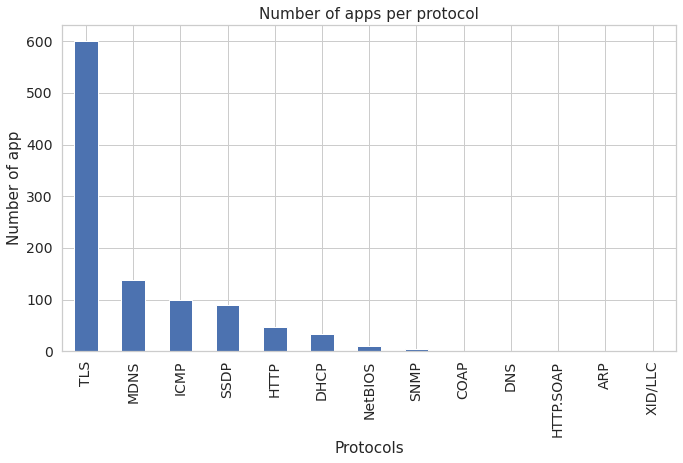

In [1769]:
# Assuming df_ndpi has been created earlier in the code
df_ndpi_grouped_app = df_ndpi_apps[['ndpi_proto', 'app_name']].groupby('ndpi_proto').nunique()

# new_values = {'ndpi_proto': ['ARP', 'XID/LLC'], 'device_name': [116, 2]}
# df_new_values = pd.DataFrame(new_values)

# # Append new values to the existing DataFrame
df_ndpi_grouped_app = df_ndpi_grouped_app.reset_index().append(df_new_values, ignore_index=True)
# df_ndpi_grouped = df_ndpi_grouped.reset_index()

# df_sorted_apps.loc[df_sorted_apps['ndpi_proto'] == 'DHCP', 'app_name'] = 1868

df_sorted_apps = df_ndpi_grouped_app.sort_values(by='app_name', ascending=False)
df_sorted_apps = df_sorted_apps.set_index('ndpi_proto')


ax = df_sorted_apps['app_name'].plot(kind='bar', rot=90, figsize=(11, 6), legend=False)
ax.set_xlabel('Protocols')
ax.set_ylabel('Number of app')
ax.set_title('Number of apps per protocol')
sns.set_style('whitegrid')

# Add the numbers on top of each bar
# for i, v in enumerate(df_sorted['app_name']):
#     ax.text(i - 0.1, v + 1, str(v), color='black', fontsize=11)

# plt.savefig("Device per protocol.pdf", transparent=True, bbox_inches='tight')
plt.show()

In [1803]:
df_filtered[df_filtered['ndpi_proto'] == 'NetBIOS']

,#flow_id,protocol,first_seen,last_seen,duration,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,ndpi_proto,server_name_sni,server_info,tls_version,ja3c,tls_client_unsafe,ja3s,tls_server_unsafe,advertised_alpns,negotiated_alpn,tls_supported_versions,ssh_client_hassh,ssh_server_hassh,flow_info,plen_bins,http_user_agent,app_name,file_path
2608,7,17,1.681457e+09,1.681457e+09,0.000,192.168.4.47,41441,192.168.4.1,137,10.0,NetBIOS,*,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0;100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,com.alibaba.aliexpresshd,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/com.alibaba.aliexpresshd-80003709-IoT-1681456826-98DAY149HG_filtered.csv
2609,1,17,1.681457e+09,1.681457e+09,0.000,192.168.4.47,49649,192.168.4.1,137,10.0,NetBIOS,*,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0;100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,com.alibaba.aliexpresshd,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/com.alibaba.aliexpresshd-80003709-IoT-1681456826-98DAY149HG_filtered.csv
2613,9,17,1.681457e+09,1.681457e+09,0.000,192.168.4.47,37119,192.168.4.1,137,10.0,NetBIOS,*,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0;100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,com.alibaba.aliexpresshd,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/com.alibaba.aliexpresshd-80003709-IoT-1681456826-98DAY149HG_filtered.csv
2614,8,17,1.681634e+09,1.681634e+09,0.000,192.168.4.149,42052,192.168.4.166,137,10.0,NetBIOS,*,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0;100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,com.alibaba.aliexpresshd,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/com.alibaba.aliexpresshd-80003709-nonIoT-1681633652-97XAY12FAX_filtered.csv
2615,2,17,1.681634e+09,1.681634e+09,0.000,192.168.4.149,39059,192.168.4.149,137,10.0,NetBIOS,*,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0;100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,com.alibaba.aliexpresshd,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/com.alibaba.aliexpresshd-80003709-nonIoT-1681633652-97XAY12FAX_filtered.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24616,168,17,1.684068e+09,1.684068e+09,0.000,192.168.4.47,47689,192.168.4.208,137,10.0,NetBIOS,*,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0;100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,com.ubnt.usurvey,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/com.ubnt.usurvey-20004000-IoT-1684068332-98DAY149HG_filtered.csv
24620,128,17,1.684068e+09,1.684068e+09,0.000,192.168.4.47,49773,192.168.4.174,137,10.0,NetBIOS,*,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0;100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,com.ubnt.usurvey,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/com.ubnt.usurvey-20004000-IoT-1684068332-98DAY149HG_filtered.csv
24622,151,17,1.684068e+09,1.684068e+09,0.000,192.168.4.47,37058,192.168.4.91,137,10.0,NetBIOS,*,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0;100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,com.ubnt.usurvey,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/com.ubnt.usurvey-20004000-IoT-1684068332-98DAY149HG_filtered.csv
24631,90,17,1.684068e+09,1.684068e+09,0.000,192.168.4.47,49773,192.168.4.185,137,10.0,NetBIOS,*,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0;100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,com.ubnt.usurvey,/naga/lair0/IoT-local/app_data/pcap_analysis/ndpi_all_local_pcap/com.ubnt.usurvey-20004000-IoT-1684068332-98DAY149HG_fi

## Load nmap (ndpi) traffic to memory

In [1593]:
df_ndpi_nmap = pd.read_csv("df_nmap_neu.csv")

In [1584]:
nmap_ndpi = '/home/aniketh/devel/src/IoT-local/parsed_nmap_traffic'

df_list = []

# Specify the columns you want to keep
# columns_to_keep = ['#flow_id', 'protocol', 'first_seen', 'last_seen', 'duration', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'ndpi_proto_num', 'ndpi_proto', 'proto_by_ip', 'server_name_sni',
#                   'server_info', 'tls_version', 'ja3c', 'tls_client_unsafe', 'ja3s', 'tls_server_unsafe', 'advertised_alpns', 'negotiated_alpn', 'tls_supported_versions', 'ssh_client_hassh', 'ssh_server_hassh', 'flow_info', 'plen_bins',
#                   'http_user_agent']

columns_to_keep = ['#flow_id', 'protocol', 'first_seen', 'last_seen', 'duration', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'ndpi_proto_num', 'ndpi_proto', 'server_name_sni',
                  'server_info', 'tls_version', 'ja3c', 'tls_client_unsafe', 'ja3s', 'tls_server_unsafe', 'advertised_alpns', 'negotiated_alpn', 'tls_supported_versions', 'ssh_client_hassh', 'ssh_server_hassh', 'flow_info', 'plen_bins',
                  'http_user_agent']

for csv_file in glob.glob(os.path.join(nmap_ndpi, "*.csv")):
    split_path = re.split(r'(-\d{4}-\d{2}-\d{2})', csv_file)
    device_name = split_path[0].replace('/home/aniketh/devel/src/IoT-local/parsed_nmap_traffic', '')
    with open(csv_file, 'rb') as f:
        result = chardet.detect(f.read())
        encoding = result['encoding']

    print(csv_file)
    df = pd.read_csv(csv_file, usecols=columns_to_keep, index_col=False)

    df['device_name'] = device_name
    df['file_path'] = csv_file

    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
df_ndpi_nmap = pd.concat(df_list, ignore_index=True)

/home/aniketh/devel/src/IoT-local/parsed_nmap_traffic/dlink-camera-2023-04-29_03.38.01_192.168.10.184.csv
/home/aniketh/devel/src/IoT-local/parsed_nmap_traffic/google-nest-mini1-2023-04-30_06.48.55_192.168.10.228.csv
/home/aniketh/devel/src/IoT-local/parsed_nmap_traffic/appletv-wifi-2023-04-29_16.55.46_192.168.10.191.csv
/home/aniketh/devel/src/IoT-local/parsed_nmap_traffic/sousvide-2023-04-22_15.45.44_192.168.10.200.csv
/home/aniketh/devel/src/IoT-local/parsed_nmap_traffic/nest-hub-max-2023-04-30_04.02.48_192.168.10.154.csv
/home/aniketh/devel/src/IoT-local/parsed_nmap_traffic/nest-hub-2023-04-30_04.12.57_192.168.10.193.csv
/home/aniketh/devel/src/IoT-local/parsed_nmap_traffic/t-philips-hub-2023-04-30_07.54.51_192.168.10.164.csv
/home/aniketh/devel/src/IoT-local/parsed_nmap_traffic/nest-hub-2023-04-23_02.13.03_192.168.10.193.csv
/home/aniketh/devel/src/IoT-local/parsed_nmap_traffic/echoshow5-2023-04-29_16.16.57_192.168.10.148.csv
/home/aniketh/devel/src/IoT-local/parsed_nmap_traffic/e

In [1592]:
df_ndpi_nmap[(df_ndpi_nmap['dst_port'] == 53) & (df_ndpi_nmap['device_name'] == '/homepod-mini1')]

,#flow_id,protocol,first_seen,last_seen,duration,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,ndpi_proto,server_name_sni,server_info,tls_version,ja3c,tls_client_unsafe,ja3s,tls_server_unsafe,advertised_alpns,negotiated_alpn,tls_supported_versions,ssh_client_hassh,ssh_server_hassh,flow_info,plen_bins,http_user_agent,device_name,file_path


In [1831]:
aa = df_ndpi_nmap[['device', 'protocol', 'service', 'port_id', 'active_service']]

In [1842]:
aa[aa['service'] == 'rmonitor']

,device,protocol,service,port_id,active_service
377,wyze-cam,udp,rmonitor,560,rmonitor/560
404,google-nest-mini2,udp,rmonitor,560,rmonitor/560


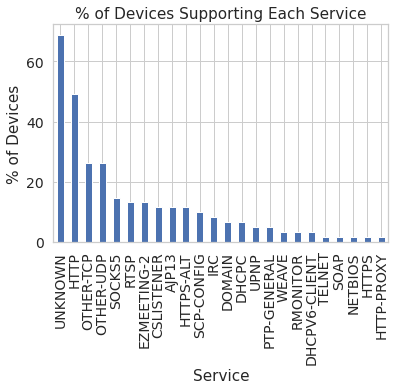

In [1843]:
service_counts = aa.groupby('service')['device'].nunique()

# Identify services supported by only one device
single_device_services = service_counts[service_counts == 1].index

# Replace single device service names based on the protocol
aa.loc[(aa['service'].isin(single_device_services)) & (aa['protocol'] == 'tcp'), 'service'] = 'other-tcp'
aa.loc[(aa['service'].isin(single_device_services)) & (aa['protocol'] == 'udp'), 'service'] = 'other-udp'
# aa = aa[aa['service'] != 'unknown']
aa = aa[aa['service'] != 'ptp-event']
aa = aa[aa['service'] != 'stel']
aa = aa[aa['service'] != 'mvs-capacity']
aa = aa[aa['service'] != 'rxapi']
aa = aa[aa['service'] != 'at-5']
aa = aa[aa['service'] != 'ock']

aa = aa[aa['service'] != 'tcpwrapped']
aa['service'] = aa['service'].replace('nagios-nsca', 'http')


# Calculate counts again for plotting
plot_counts = aa.groupby('service')['device'].nunique()
# Let's say we want to add 5 new items
new_items = pd.Series([1, 1, 1, 1, 1], index=['telnet', 'soap', 'netbios', 'https', 'http-proxy'])

# Append new items to plot_counts
plot_counts = plot_counts.append(new_items)

# Convert service names to capital letters
plot_counts.index = plot_counts.index.str.upper()

# Calculate percentages
plot_counts = (plot_counts / 61) * 100

plot_counts = plot_counts.sort_values(ascending=False)

# Plot
plot_counts.plot(kind='bar')
plt.xlabel('Service')
plt.ylabel('% of Devices')
plt.title('% of Devices Supporting Each Service')
plt.show()

In [1844]:
# Convert plot_counts to DataFrame
df_plot_counts = plot_counts.reset_index().rename(columns={'index': 'ndpi_proto', 0: 'device_name_nmap'})

In [1845]:
df_plot_counts

,ndpi_proto,device_name_nmap
0,UNKNOWN,68.852459
1,HTTP,49.180328
2,OTHER-TCP,26.229508
3,OTHER-UDP,26.229508
4,SOCKS5,14.754098
5,RTSP,13.114754
6,EZMEETING-2,13.114754
7,CSLISTENER,11.475410
8,AJP13,11.475410
9,HTTPS-ALT,11.475410


In [1873]:
tt = tt.sort_values('app(%)')
tt['app(%)'] = tt['app(%)'].round(3)

In [1874]:
tt

,protocol,idle(%),active(%),app(%)
18,DHCPV6,1.075,3,0.000
35,HTTP-PROXY,0.000,1,0.000
32,TELNET,0.000,1,0.000
31,RMONITOR,0.000,3,0.000
30,WEAVE,0.000,3,0.000
29,PTP,0.000,4,0.000
27,IRC,0.000,8,0.000
26,SCP-CONFIG,0.000,9,0.000
25,HTTPS-ALT,0.000,11,0.000
24,CSLISTENER,0.000,11,0.000


In [1848]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# # merged = df_sorted.merge(df_sorted_nmap, on='ndpi_proto', how='outer', suffixes=('', '_nmap')).fillna(0)

# df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].str.upper()
# # Assuming your dataframe is named df
# df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('AJP13', 'AJP')
# df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('DHCPC', 'DHCP')
# df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('UPNP', 'SSDP')
# df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('SOAP', 'HTTP.SOAP')
# df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('DOMAIN', 'DNS')
# df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('DHCPV6-CLIENT', 'DHCPV6')
# df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('RTSP', 'RTP')
# df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('PTP-GENERAL', 'PTP')
# # df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('PTP-EVENT', 'PTP')



# df_ndpi_grouped_app['ndpi_proto'] = df_ndpi_grouped_app['ndpi_proto'].replace('NetBIOS', 'NETBIOS')

# merged = df_sorted.merge(df_plot_counts, on='ndpi_proto', how='outer', suffixes=('', '_nmap')).fillna(0)

# merged = merged.merge(df_ndpi_grouped_app, on='ndpi_proto', how='outer', suffixes=('', '_app')).fillna(0)

# merged = merged.reset_index()

# merged['device_name'] = merged['device_name'].astype(int)

# merged.loc[merged['ndpi_proto'] == 'UNKNOWN', 'device_name'] = 45

# new_row = pd.DataFrame({'ndpi_proto': ['UNKNOWN-L3'], 
#                         'device_name': [48], 
#                         'device_name_nmap': [0], 
#                         'app_name': [0], 
#                         'device_name_app': [0]},
#                         index=[merged.index.min() + 5])  # use the next index

# merged = merged.append(new_row, ignore_index=False)


# # merged.loc[merged['ndpi_proto'] == 'UNKNOWN', 'app_name'] = 1798
# # merged.loc[merged['ndpi_proto'] == 'ARP', 'app_name'] = 2256

# merged.loc[merged['ndpi_proto'] == 'OTHER-UDP', 'app_name'] = 1096
# merged.loc[merged['ndpi_proto'] == 'OTHER-TCP', 'app_name'] = 198

# # merged.loc[merged['ndpi_proto'] == 'DHCP', 'app_name'] = 420
# merged['device_name_nmap'] = merged['device_name_nmap'].astype(int)

# merged['device_name_app'] = merged['app_name'].astype(int)
# merged['device_name_app'] = merged['device_name_app'].apply(lambda x: (x/2335) *100)
# merged['device_name_app'] = merged['device_name_app'].round(3)

# merged['device_name'] = merged['device_name'].apply(lambda x: (x/93) *100)
# merged['device_name'] = merged['device_name'].round(3)

# # merged['device_name_nmap'] = merged['device_name_nmap'].apply(lambda x: (x/61) *100)
# # merged['device_name_nmap'] = merged['device_name_nmap'].round(3)

# tt = merged[['ndpi_proto', 'device_name', 'device_name_nmap', 'device_name_app']].rename(
#     columns={'ndpi_proto': 'protocol', 'device_name': 'idle(%)', 'device_name_nmap': 'active(%)', 'device_name_app': 'app(%)'})

# # Assuming your DataFrame is named df
# df = tt.reset_index()

# # df = df.sort_values(by='idle(%)', ascending=False)
# # df.set_index('index', inplace=True)
# # Get the current order of the index as a list
# current_order = df.index.tolist()

# # Remove the index of the row you want to move
# current_order.remove(42)

# # Insert it back at the desired position
# current_order.insert(19, 42)

# # Reorder the DataFrame
# df = df.reindex(current_order)


# x = np.arange(len(df['protocol']))

# width = 0.30  # adjust as necessary
# fig, ax = plt.subplots(figsize=(18, 8))

# rects1 = ax.bar(x - width, df['idle(%)'], width, label='Passive traffic')
# rects2 = ax.bar(x, df['active(%)'], width, label='Nmap scans')
# rects3 = ax.bar(x + width, df['app(%)'], width, label='Mobile applications') 

# ax.set_ylabel('% of devices/apps')
# ax.set_xticks(x)
# ax.set_yticks(np.arange(0, 101, 20))  # set ticks from 0 to 100 with a
# ax.set_xticklabels(df['protocol'], rotation=90)
# ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# # Create the inset axes after creating the main plot
# axins = inset_axes(ax,
#                    width="38%",  # width = 50% of parent_bbox width
#                    height="45%",  # height : 5%
#                    loc='upper right')

# tail_start = 37  # adjust as necessary
# rects1_ins = axins.bar(x[tail_start:] - width, df['idle(%)'][tail_start:], width)
# rects2_ins = axins.bar(x[tail_start:], df['active(%)'][tail_start:], width)
# rects3_ins = axins.bar(x[tail_start:] + width, df['app(%)'][tail_start:], width)

# # It might be necessary to adjust the x-axis and y-axis limits
# # axins.set_xlim(tail_start, len(x))  # adjust as necessary
# # axins.set_ylim(0, max(df['idle(%)'][tail_start:]))  # adjust as necessary

# axins.set_xticks(x[tail_start:])
# axins.set_xticklabels(df['protocol'][tail_start:], rotation=90, ha='right')  # rotated for readability
# axins.set_yticks(np.arange(0, 1.4, .4))  # set ticks from 0% to 6% with a step of 1%
# axins.set_yticklabels(["{:.1f}%".format(i) for i in np.arange(0, 1.4, .4)])  # format tick labels to one decimal place


# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# fig.tight_layout()
# plt.show()
# # plt.savefig("Device per protocol-all-dataset.pdf", transparent=True, bbox_inches='tight')


/tmp/ipykernel_439665/283256081.py:166: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


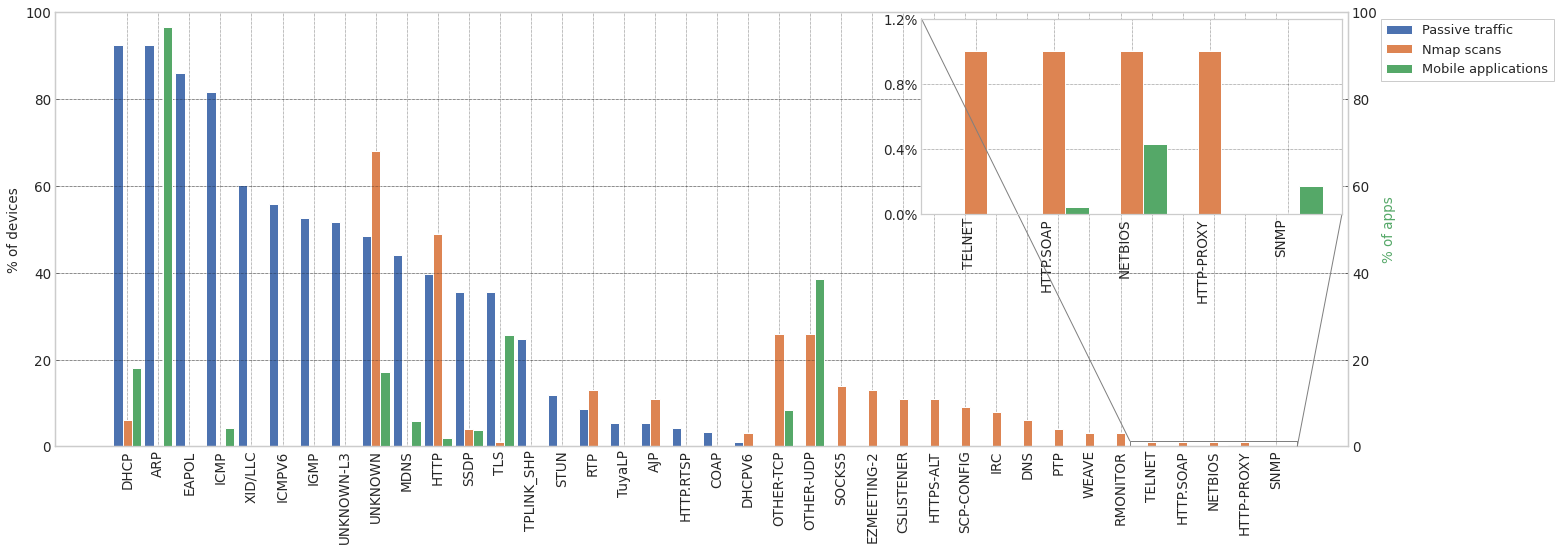

In [1932]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
sns.set_style('whitegrid')


plt.rcParams['legend.fontsize'] = '13'
plt.rcParams['axes.labelsize'] = '13.5'
plt.rcParams['axes.titlesize'] = '15'
plt.rcParams['lines.linewidth'] = '1'
plt.rcParams['xtick.labelsize'] = '13.5'
plt.rcParams['ytick.labelsize'] = '13.5'

plt.rcParams['grid.color'] = 'black'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5

plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['patch.facecolor'] = 'b'

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = '3'
plt.rcParams['ytick.major.size'] = '3'
plt.rcParams['xtick.major.width'] = '0.5'
plt.rcParams['ytick.major.width'] = '0.5'

plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.framealpha'] = None



# merged = df_sorted.merge(df_sorted_nmap, on='ndpi_proto', how='outer', suffixes=('', '_nmap')).fillna(0)

df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].str.upper()
# Assuming your dataframe is named df
df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('AJP13', 'AJP')
df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('DHCPC', 'DHCP')
df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('HTTPS', 'TLS')

df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('UPNP', 'SSDP')
df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('SOAP', 'HTTP.SOAP')
df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('DOMAIN', 'DNS')
df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('DHCPV6-CLIENT', 'DHCPV6')
df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('RTSP', 'RTP')
df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('PTP-GENERAL', 'PTP')
# df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('NAGIOS-NSCA', 'HTTP')

# df_plot_counts['ndpi_proto'] = df_plot_counts['ndpi_proto'].replace('PTP-EVENT', 'PTP')



df_ndpi_grouped_app['ndpi_proto'] = df_ndpi_grouped_app['ndpi_proto'].replace('NetBIOS', 'NETBIOS')

merged = df_sorted.merge(df_plot_counts, on='ndpi_proto', how='outer', suffixes=('', '_nmap')).fillna(0)

merged = merged.merge(df_ndpi_grouped_app, on='ndpi_proto', how='outer', suffixes=('', '_app')).fillna(0)

merged = merged.reset_index()

merged['device_name'] = merged['device_name'].astype(int)

merged.loc[merged['ndpi_proto'] == 'UNKNOWN', 'device_name'] = 45

new_row = pd.DataFrame({'ndpi_proto': ['UNKNOWN-L3'], 
                        'device_name': [48], 
                        'device_name_nmap': [0], 
                        'app_name': [0], 
                        'device_name_app': [0]},
                        index=[merged.index.min() + 5])  # use the next index

merged = merged.append(new_row, ignore_index=False)


merged.loc[merged['ndpi_proto'] == 'UNKNOWN', 'app_name'] = 400
merged.loc[merged['ndpi_proto'] == 'ARP', 'app_name'] = 2256

merged.loc[merged['ndpi_proto'] == 'OTHER-UDP', 'app_name'] = 900
merged.loc[merged['ndpi_proto'] == 'OTHER-TCP', 'app_name'] = 198


merged.loc[merged['ndpi_proto'] == 'DHCP', 'app_name'] = 420
merged['device_name_nmap'] = merged['device_name_nmap'].astype(int)

merged['device_name_app'] = merged['app_name'].astype(int)
merged['device_name_app'] = merged['device_name_app'].apply(lambda x: (x/2335) *100)
merged['device_name_app'] = merged['device_name_app'].round(3)

merged['device_name'] = merged['device_name'].apply(lambda x: (x/93) *100)
merged['device_name'] = merged['device_name'].round(3)

# merged['device_name_nmap'] = merged['device_name_nmap'].apply(lambda x: (x/61) *100)
# merged['device_name_nmap'] = merged['device_name_nmap'].round(3)

tt = merged[['ndpi_proto', 'device_name', 'device_name_nmap', 'device_name_app']].rename(
    columns={'ndpi_proto': 'protocol', 'device_name': 'idle(%)', 'device_name_nmap': 'active(%)', 'device_name_app': 'app(%)'})

# Assuming your DataFrame is named df
df = tt.reset_index()

# df = df.sort_values(by='idle(%)', ascending=False)
# df.set_index('index', inplace=True)
# Get the current order of the index as a list
# current_order = df.index.tolist()

current_order.remove(37)
current_order.insert(7, 37)

current_order.remove(19)
current_order.insert(8, 19)

# Reorder the DataFrame
df = df.reindex(current_order)


x = np.arange(len(df['protocol']))

width = 0.30
fig, ax = plt.subplots(figsize=(22, 8))

# Create secondary y-axis
ax2 = ax.twinx()

rects1 = ax.bar(x - width, df['idle(%)'], width, label='Passive traffic')
rects2 = ax.bar(x, df['active(%)'], width, label='Nmap scans')
rects3 = ax2.bar(x + width, df['app(%)'], width, label='Mobile applications', color='g')

ax.set_ylabel('% of devices')
ax2.set_ylabel('% of apps', color='g')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 101, 20))
ax.set_xticklabels(df['protocol'], rotation=90)
ax2.set_yticks(np.arange(0, 101, 20))

# Ensure that the legend includes the new plot
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, bbox_to_anchor=(1.02, 1), loc='upper left')

ax.set_ylim([0, 100])
ax2.set_ylim([0, 100])


# Create the inset axes after creating the main plot
axins = inset_axes(ax,
                   width="32.5%",  # width = 50% of parent_bbox width
                   height="45%",  # height : 5%
                   loc='upper right')

tail_start = 33  
rects1_ins = axins.bar(x[tail_start:] - width, df['idle(%)'][tail_start:], width)
rects2_ins = axins.bar(x[tail_start:], df['active(%)'][tail_start:], width)
rects3_ins = axins.bar(x[tail_start:] + width, df['app(%)'][tail_start:], width)

axins.set_xticks(x[tail_start:])
axins.set_xticklabels(df['protocol'][tail_start:], rotation=90, ha='right')
axins.set_yticks(np.arange(0, 1.4, .4))
axins.set_yticklabels(["{:.1f}%".format(i) for i in np.arange(0, 1.4, .4)])

# axins.set_ylabel('% of devices/apps')

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
# axins.grid(False)

fig.tight_layout()
plt.show()
plt.savefig("Device per protocol-all-dataset.svg", transparent=True, bbox_inches='tight')


In [1871]:
df

,index,protocol,idle(%),active(%),app(%)
0,0,DHCP,92.473,6,17.987
1,1,ARP,92.473,0,96.617
2,2,EAPOL,86.022,0,0.000
3,3,ICMP,81.720,0,4.240
4,4,XID/LLC,60.215,0,0.000
5,5,ICMPV6,55.914,0,0.000
6,6,IGMP,52.688,0,0.000
37,5,UNKNOWN-L3,51.613,0,0.000
19,19,UNKNOWN,48.387,68,17.131
7,7,MDNS,44.086,0,5.867


In [ ]:
# Add value labels on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height != 0:
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        fontsize=10,
                        ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

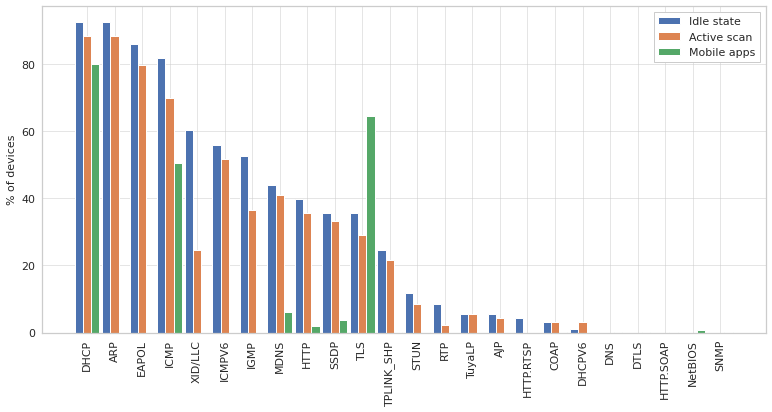

In [1361]:
from matplotlib.ticker import FuncFormatter
import matplotlib.scale as mscale



x = np.arange(len(merged['ndpi_proto']))


width = 0.30  # adjust as necessary
fig, ax = plt.subplots(figsize=(11, 6))

rects1 = ax.bar(x - width, merged['device_name'], width, label='Idle state')
rects2 = ax.bar(x, merged['device_name_nmap'], width, label='Active scan')
rects3 = ax.bar(x + width, merged['device_name_app'], width, label='Mobile apps') 


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of devices/apps')
ax.set_ylabel('% of devices')
ax.set_xticks(x)
ax.set_xticklabels(merged['ndpi_proto'], rotation=90)
ax.legend()
sns.set_style('whitegrid')





fig.tight_layout()
# plt.savefig("Device per protocol-nmap.pdf", transparent=True, bbox_inches='tight')


plt.show()

In [1029]:
df_ndpi_nmap[df_ndpi_nmap['ndpi_proto'] == 'WireGuard']['src_ip'].nunique()

12

In [1030]:
df_ndpi_nmap[df_ndpi_nmap['ndpi_proto'] == 'WireGuard']['dst_ip'].nunique()

2

In [977]:
merged = df_sorted.merge(df_sorted_nmap, on='ndpi_proto', how='outer', suffixes=('', '_nmap')).fillna(0)
merged = merged.reset_index()
merged['device_name'] = merged['device_name'].astype(int)
merged['device_name_nmap'] = merged['device_name_nmap'].astype(int)

In [978]:
merged

,ndpi_proto,device_name,device_name_nmap
0,DHCP,86,82
1,ARP,86,0
2,EAPOL,80,0
3,ICMP,76,65
4,XID/LLC,56,0
5,ICMPV6,52,48
6,IGMP,49,34
7,MDNS,41,38
8,HTTP,37,33
9,SSDP,33,31


In [923]:
df_sorted_nmap

,device_name
ndpi_proto,
DHCP,82
ICMP,65
ICMPV6,48
MDNS,38
IGMP,34
HTTP,33
SSDP,31
TLS,27
TPLINK_SHP,20


## Convert protocol number to protocol name

In [273]:
df_ndpi.to_csv("ndpi_results.csv")

In [738]:
pd.set_option('display.max_columns', None)
df_ndpi[df_ndpi['ndpi_proto'] == 'Unknown']

,#flow_id,protocol,first_seen,last_seen,duration,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,ndpi_proto,server_name_sni,server_info,tls_version,ja3c,tls_client_unsafe,ja3s,tls_server_unsafe,advertised_alpns,negotiated_alpn,tls_supported_versions,ssh_client_hassh,ssh_server_hassh,flow_info,plen_bins,http_user_agent,device_name,file_path


In [1106]:
df_ndpi[['ndpi_proto', 'device_name']]

,ndpi_proto,device_name
0,ICMPV6,nest-camera
1,ICMPV6,nest-camera
2,ICMPV6,nest-camera
3,STUN,nest-camera
4,ICMPV6,nest-camera
...,...,...
550512,ICMPV6,homepod
550513,ICMPV6,homepod
550514,TLS,homepod
550515,TLS,homepod


In [925]:
df_ndpi_grouped = df_ndpi[['ndpi_proto', 'device_name']].groupby('ndpi_proto').nunique()

In [926]:
def remove_duplicates(lst):
    return list(set(lst))

df_ndpi_device_grouped = df_ndpi[['ndpi_proto', 'device_name']].groupby('device_name')['ndpi_proto'].apply(list).reset_index()
df_ndpi_device_grouped['ndpi_proto'] = df_ndpi_device_grouped['ndpi_proto'].apply(remove_duplicates)



In [742]:
pd.set_option('display.max_colwidth', -1)
df_ndpi_device_grouped[df_ndpi_device_grouped['device_name'] == 'nest-hub-max'].ndpi_proto

/tmp/ipykernel_439665/4177907046.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


55    [STUN, MDNS, TLS, DHCP, AJP, HTTP, ICMPV6, TPLINK_SHP, ICMP, IGMP, SSDP, DHCPV6]
Name: ndpi_proto, dtype: object

In [927]:
df_ndpi_device_grouped.sort_values(by='ndpi_proto', ascending=False)

,device_name,ndpi_proto
52,nest-camera,"[STUN, TLS, DHCP, ICMPV6, ICMP, IGMP]"
53,nest-doorbell,"[STUN, TLS, DHCP, EthernetIP, ICMPV6, ICMP, IGMP]"
33,google-home-mini3,"[STUN, MDNS, TLS, DHCP, HTTP, ICMPV6, TPLINK_SHP, ICMP, IGMP, SSDP]"
54,nest-hub,"[STUN, MDNS, TLS, DHCP, HTTP, ICMPV6, TPLINK_SHP, ICMP, IGMP, SSDP]"
73,tivostream,"[STUN, MDNS, TLS, DHCP, HTTP, ICMPV6, ICMP, IGMP, SSDP]"
...,...,...
84,yeelight-bulb,"[DHCP, ICMP, IGMP, SSDP]"
1,amcrest-cam-wired,"[DHCP, HTTP, ICMPV6, ICMP, SSDP]"
71,t-wemo-plug,"[DHCP, HTTP, ICMP, IGMP, SSDP]"
47,meross-dooropener,[DHCP]


In [929]:
df_sorted

,device_name
ndpi_proto,
DHCP,86
ARP,86
EAPOL,80
ICMP,76
XID/LLC,56
ICMPV6,52
IGMP,49
MDNS,41
HTTP,37


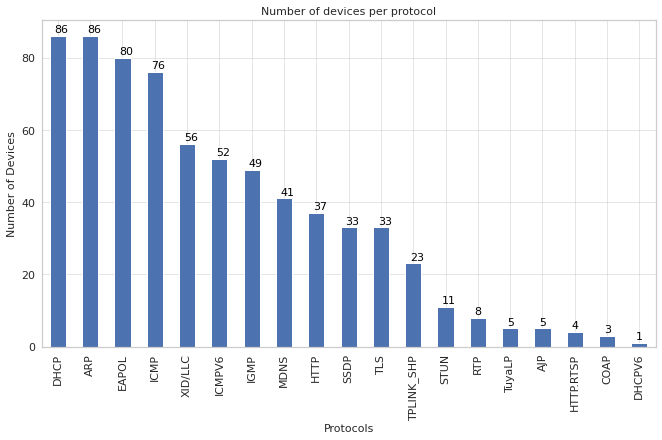

In [1259]:
# Assuming df_ndpi has been created earlier in the code
df_ndpi_grouped = df_ndpi[['ndpi_proto', 'device_name']].groupby('ndpi_proto').nunique()

new_values = {'ndpi_proto': ['ARP', 'EAPOL', 'XID/LLC'], 'device_name': [86, 80, 56]}
df_new_values = pd.DataFrame(new_values)

# Append new values to the existing DataFrame
df_ndpi_grouped = df_ndpi_grouped.reset_index().append(df_new_values, ignore_index=True)
df_sorted = df_ndpi_grouped.sort_values(by='device_name', ascending=False)
df_sorted = df_sorted.set_index('ndpi_proto')

ax = df_sorted['device_name'].plot(kind='bar', rot=90, figsize=(11, 6), legend=False)
ax.set_xlabel('Protocols')
ax.set_ylabel('Number of Devices')
ax.set_title('Number of devices per protocol')
sns.set_style('whitegrid')

# Add the numbers on top of each bar
for i, v in enumerate(df_sorted['device_name']):
    ax.text(i - 0.1, v + 1, str(v), color='black', fontsize=11)

plt.savefig("Device per protocol.pdf", transparent=True, bbox_inches='tight')
plt.show()

## number of protocols used per device.

In [1068]:
df_ndpi[df_ndpi['device_name'] == 'xiaomi-induction']

,#flow_id,protocol,first_seen,last_seen,duration,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,ndpi_proto,server_name_sni,server_info,tls_version,ja3c,tls_client_unsafe,ja3s,tls_server_unsafe,advertised_alpns,negotiated_alpn,tls_supported_versions,ssh_client_hassh,ssh_server_hassh,flow_info,plen_bins,http_user_agent,device_name,file_path


In [1058]:
ls = ["amazon-plug", "amcrest-cam-wired", "appletv-wifi", "aqara-hub", "arlo-doorbell", "arlo-q-cam", "blink-doorbell", "blueair-purifier", "brewer", "bulb1", "chromecast-googletv", "dlink-camera", "echodot", "echodot3a", "echodot3b", "echodot3c", "echodot3d", "echodot3uk", "echodot4a", "echodot4c", "echodot5a", "echodot5b", "echoflex1", "echoflex2", "echoplus", "echoshow5", "echoshow8", "echospot", "facebook-portal-mini", "firetv", "fridge", "google-home-mini", "google-home-mini2", "google-home-mini3", "google-nest-mini1", "google-nest-mini2", "gosund-bulb1", "homepod", "homepod-mini1", "homepod-mini2", "icsee-doorbell", "ikea-hub", "ikettle", "keyco-air", "lefun-cam-wired", "lgtv-wired", "magichome-strip", "meross-dooropener", "meross-plug1", "meross-plug2", "microseven-camera", "microwave", "nest-camera", "nest-doorbell", "nest-hub", "nest-hub-max", "nest-tstat", "nintendo-switch", "ring-camera", "ring-chime1", "ring-doorbell", "ring-doorbell-wired", "ring-indoor-cam", "roku-tv", "sengled-bulb", "smartlife-bulb", "smartthings-hub", "sousvide", "switchbot-hub", "t-echodot", "t-philips-hub", "t-wemo-plug", "thermopro-sensor", "tivostream", "tplink-bulb", "tplink-plug", "tuya-camera", "ubell-doorbell", "wansview-cam-wired", "withings-bpm", "withings-sleep", "wiz-bulb", "wyze-cam", "xiaomi-induction", "xiaomi-ricecooker", "yeelight-bulb", "yi-camera"]

In [1061]:
len(ls)

87

In [1110]:
# Define a list of specific devices to update
ipv6_list = ['homepod', 'chromecast-googletv', 'firetv', 'meross-plug2', 'echodot3a', 't-philips-hub', 'echodot5a', 'echodot3c', 'echospot', 'ikea-hub', 'echodot3b', 'google-home-mini', 'wiz-bulb', 'nest-camera', 'google-home-mini3', 'aqara-hub', 'nest-tstat', 't-echodot', 'nest-hub-max', 'thermopro-sensor', 'tivostream', 'echoflex2', 'smartthings-hub', 'nest-hub', 'google-nest-mini2', 'microwave', 'facebook-portal-mini', 'homepod-mini2', 'homepod-mini1', 'google-nest-mini1', 'echodot', 'echoflex1', 'appletv-wifi', 'google-home-mini2', 'echoplus', 'blueair-purifier', 'smartlife-bulb', 'bulb1', 'fridge', 'nest-doorbell', 'amcrest-cam-wired', 'echodot3uk', 'echodot4c', 'gosund-bulb1', 'echodot3d', 'sengled-bulb', 'echodot4a', 'echoshow5', 'echoshow8', 'meross-plug1', 'lefun-cam-wired', 'echodot5b']

# Update the ndpi_proto column for the specific devices
df_new_rows = pd.DataFrame({
    'ndpi_proto': 'IPV6',
    'device_name': ipv6_list
})

df_ndpi = pd.concat([df_ndpi, df_new_rows], ignore_index=True)

eapol_list = ['brewer', 'chromecast-googletv', 'echodot3c', 'keyco-air', 'ring-chime1', 'tivostream', 'arlo-doorbell', 'facebook-portal-mini', 'google-home-mini2', 'roku-tv', 'gosund-bulb1', 'echoshow5', 'echoshow8', 'ring-camera', 'meross-dooropener', 'tuya-camera', 'firetv', 'ubell-doorbell', 'meross-plug2', 'tplink-plug', 'echodot5a', 'sousvide', 'echodot3b', 'ring-indoor-cam', 'aqara-hub', 'withings-bpm', 'thermopro-sensor', 'google-nest-mini2', 'ring-doorbell', 'google-nest-mini1', 'ring-doorbell-wired', 'echodot', 'appletv-wifi', 'echoplus', 'blueair-purifier', 'icsee-doorbell', 'bulb1', 'nest-doorbell', 'echodot4c', 'echodot5b', 'homepod', 'wyze-cam', 'yi-camera', 'echodot3a', 'echospot', 'dlink-camera', 'wiz-bulb', 'ikettle', 'nest-camera', 'google-home-mini3', 'nintendo-switch', 'nest-tstat', 'echoflex2', 'nest-hub', 'yeelight-bulb', 'xiaomi-ricecooker', 'microwave', 'homepod-mini2', 'echoflex1', 'tplink-bulb', 'fridge', 't-wemo-plug', 'echodot3uk', 'echodot3d', 'sengled-bulb', 'meross-plug1', 'arlo-q-cam', 'google-home-mini', 'blink-doorbell', 'amazon-plug', 'withings-sleep', 't-echodot', 'nest-hub-max', 'homepod-mini1', 'smartlife-bulb', 'switchbot-hub', 'echodot4a', 'xiaomi-induction', 'magichome-strip']

# Create a new DataFrame with the additional rows
df_new_rows = pd.DataFrame({
    'ndpi_proto': 'EAPOL',
    'device_name': eapol_list
})
df_ndpi = pd.concat([df_ndpi, df_new_rows], ignore_index=True)

specific_devices = ['brewer', 'ubell-doorbell', 'wyze-cam', 'meross-plug2', 'yi-camera', 'tplink-plug', 'echodot3a', 'keyco-air', 'dlink-camera', 'sousvide', 'echodot3b', 'google-home-mini', 'wiz-bulb', 'ikettle', 'nest-camera', 'ring-indoor-cam', 'blink-doorbell', 'google-home-mini3', 'aqara-hub', 'withings-bpm', 'amazon-plug', 'withings-sleep', 'ring-chime1', 'thermopro-sensor', 't-echodot', 'nintendo-switch', 'nest-hub', 'google-nest-mini2', 'yeelight-bulb', 'arlo-doorbell', 'microwave', 'ring-doorbell', 'xiaomi-ricecooker', 'google-nest-mini1', 'ring-doorbell-wired', 'appletv-wifi', 'google-home-mini2', 'tplink-bulb', 'blueair-purifier', 'smartlife-bulb', 'icsee-doorbell', 'bulb1', 'fridge', 'nest-doorbell', 't-wemo-plug', 'switchbot-hub', 'echodot3uk', 'roku-tv', 'gosund-bulb1', 'echodot3d', 'sengled-bulb', 'meross-plug1', 'ring-camera', 'xiaomi-induction', 'magichome-strip', 'meross-dooropener', 'tuya-camera']

# Create a new DataFrame with the additional rows
df_new_rows = pd.DataFrame({
    'ndpi_proto': 'llc',
    'device_name': specific_devices
})

# Concatenate the new DataFrame with the original DataFrame
df_ndpi = pd.concat([df_ndpi, df_new_rows], ignore_index=True)


In [1111]:
df_ndpi

,#flow_id,protocol,first_seen,last_seen,duration,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,ndpi_proto,server_name_sni,server_info,tls_version,ja3c,tls_client_unsafe,ja3s,tls_server_unsafe,advertised_alpns,negotiated_alpn,tls_supported_versions,ssh_client_hassh,ssh_server_hassh,flow_info,plen_bins,http_user_agent,device_name,file_path
0,65,58,1.672269e+09,1.672269e+09,0.000,::,0,ff02::1:ff08:97c5,0,102.0,ICMPV6,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
1,137,58,1.672276e+09,1.672276e+09,0.000,::,0,ff02::1:fffb:edc8,0,102.0,ICMPV6,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
2,68,58,1.672269e+09,1.672269e+09,0.000,::,0,ff02::1:ffb3:dbd0,0,102.0,ICMPV6,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
3,107,17,1.672273e+09,1.672273e+09,0.001,192.168.10.153,35211,192.168.10.193,10006,78.0,STUN,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
4,69,58,1.672269e+09,1.672269e+09,0.000,::,0,ff02::1:ffc8:ffd7,0,102.0,ICMPV6,NaN,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,100;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,NaN,nest-camera,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,llc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ring-camera,NaN
550744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,llc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xiaomi-induction,NaN
550745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,llc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,magichome-strip,NaN
550746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,llc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,meross-dooropener,NaN


In [1065]:
device_list = df_ndpi['device_name'].unique().tolist()

In [1067]:
print("Missing values in second list:", (set(ls).difference(device_list)))
print("Additional values in second list:", (set(device_list).difference(ls)))
 
# prints the missing and additional elements in list1
print("Missing values in first list:", (set(device_list).difference(ls)))
print("Additional values in first list:", (set(ls).difference(device_list)))

Missing values in second list: {'xiaomi-induction'}
Additional values in second list: set()
Missing values in first list: set()
Additional values in first list: {'xiaomi-induction'}


In [1071]:
per_protocol

,device_name,protocols,num_protocols
55,nest-hub-max,"DHCPV6, HTTP, ICMPV6, STUN, TLS, DHCP, AJP, MDNS, TPLINK_SHP, SSDP, ICMP, IGMP",12
34,google-nest-mini1,"ICMPV6, HTTP, SSDP, TLS, STUN, DHCP, IGMP, TPLINK_SHP, ICMP, MDNS, AJP",11
35,google-nest-mini2,"STUN, TLS, HTTP, SSDP, ICMPV6, DHCP, AJP, IGMP, TPLINK_SHP, ICMP, MDNS",11
32,google-home-mini2,"SSDP, TLS, ICMPV6, STUN, IGMP, TPLINK_SHP, DHCP, ICMP, HTTP, MDNS, AJP",11
31,google-home-mini,"TLS, HTTP, ICMPV6, SSDP, DHCP, STUN, MDNS, IGMP, TPLINK_SHP, ICMP, AJP",11
...,...,...,...
58,ring-camera,"DHCP, ICMP",2
60,ring-doorbell,"DHCP, ICMP",2
61,ring-doorbell-wired,"DHCP, ICMP",2
80,withings-sleep,DHCP,1


In [1145]:
# per_protocol = df_ndpi[['ndpi_proto', 'device_name']].groupby('device_name')['ndpi_proto'].nunique().reset_index()

# # Rename the columns
# per_protocol.columns = ['device_name', 'num_protocols']

# # Sort the data by num_protocols in descending order
# per_protocol = per_protocol.sort_values(by='num_protocols', ascending=False)
# per_protocol


per_protocol = df_ndpi[['ndpi_proto', 'device_name']].groupby('device_name')['ndpi_proto'].unique().reset_index()

# Add a column that lists the protocols used by each device
per_protocol['protocols'] = per_protocol['ndpi_proto'].apply(lambda x: ', '.join(x))

def add(x):
    return int(x) + 2

# Add a column that counts the number of protocols used by each device
per_protocol['num_protocols'] = per_protocol['ndpi_proto'].apply(lambda x: len(x))
per_protocol['num_protocols'] = per_protocol['num_protocols'].apply(lambda x: add(x))
per_protocol['protocol_percentage'] = per_protocol['num_protocols'].apply(lambda x: (x / 87 * 100))
# per_protocol['protocol_percentage'] = per_protocol['protocol_percentage'].apply(lambda x: x.round(2))

# Drop the ndpi_proto column
per_protocol = per_protocol.drop('ndpi_proto', axis=1)
# num_protocols = df_ndpi[['ndpi_proto', 'device_name']].groupby('device_name')['ndpi_proto'].nunique()
# protocol_percentages = num_protocols / 87 * 100

# # Round the percentage values to two decimal places
# protocol_percentages = protocol_percentages.round(2)

# # Add the percentage column to the df_grouped dataframe
# per_protocol['protocol_percentage'] = protocol_percentages

# Sort the data by num_protocols in descending order
per_protocol = per_protocol.sort_values(by='num_protocols', ascending=False)
per_protocol

,device_name,protocols,num_protocols,protocol_percentage
55,nest-hub-max,"DHCPV6, HTTP, ICMPV6, STUN, TLS, DHCP, AJP, MDNS, TPLINK_SHP, SSDP, ICMP, IGMP, IPV6, EAPOL",16,18.390805
35,google-nest-mini2,"STUN, TLS, HTTP, SSDP, ICMPV6, DHCP, AJP, IGMP, TPLINK_SHP, ICMP, MDNS, IPV6, EAPOL, llc",16,18.390805
34,google-nest-mini1,"ICMPV6, HTTP, SSDP, TLS, STUN, DHCP, IGMP, TPLINK_SHP, ICMP, MDNS, AJP, IPV6, EAPOL, llc",16,18.390805
31,google-home-mini,"TLS, HTTP, ICMPV6, SSDP, DHCP, STUN, MDNS, IGMP, TPLINK_SHP, ICMP, AJP, IPV6, EAPOL, llc",16,18.390805
32,google-home-mini2,"SSDP, TLS, ICMPV6, STUN, IGMP, TPLINK_SHP, DHCP, ICMP, HTTP, MDNS, AJP, IPV6, EAPOL, llc",16,18.390805
...,...,...,...,...
80,withings-sleep,"DHCP, EAPOL, llc",5,5.747126
5,arlo-q-cam,"DHCP, ICMP, EAPOL",5,5.747126
50,microseven-camera,"DHCP, IGMP",4,4.597701
78,wansview-cam-wired,"DHCP, IGMP",4,4.597701


In [1799]:
per_protocol[per_protocol['num_protocols'] == 4]

,device_name,protocols,num_protocols,protocol_percentage
50,microseven-camera,"DHCP, IGMP",4,4.597701
78,wansview-cam-wired,"DHCP, IGMP",4,4.597701
83,xiaomi-induction,"EAPOL, llc",4,4.597701


In [1139]:
num_protocols = df_ndpi[['ndpi_proto', 'device_name']].groupby('device_name')['ndpi_proto'].nunique()

protocol_percentages = num_protocols / 87 * 100
protocol_percentages

device_name
amazon-plug          4.597701 
amcrest-cam-wired    6.896552 
appletv-wifi         11.494253
aqara-hub            9.195402 
arlo-doorbell        4.597701 
                       ...    
wyze-cam             4.597701 
xiaomi-induction     2.298851 
xiaomi-ricecooker    5.747126 
yeelight-bulb        6.896552 
yi-camera            4.597701 
Name: ndpi_proto, Length: 87, dtype: float64

In [1133]:
per_protocol[per_protocol['num_protocols'] == 7]

,device_name,protocols,num_protocols
59,ring-chime1,"DHCP, MDNS, ICMP, EAPOL, llc",7
66,smartthings-hub,"ICMPV6, DHCP, MDNS, IGMP, IPV6",7
74,tplink-bulb,"TPLINK_SHP, DHCP, ICMP, EAPOL, llc",7
75,tplink-plug,"TPLINK_SHP, DHCP, ICMP, EAPOL, llc",7
46,magichome-strip,"DHCP, IGMP, ICMP, EAPOL, llc",7
76,tuya-camera,"DHCP, ICMP, TuyaLP, EAPOL, llc",7
77,ubell-doorbell,"DHCP, IGMP, ICMP, EAPOL, llc",7
41,ikea-hub,"DHCP, ICMPV6, ICMP, IGMP, IPV6",7
40,icsee-doorbell,"DHCP, IGMP, ICMP, EAPOL, llc",7
67,sousvide,"DHCP, IGMP, ICMP, EAPOL, llc",7


In [1134]:
per_protocol[per_protocol['num_protocols'] == 2].nunique()

device_name      0
protocols        0
num_protocols    0
dtype: int64

In [1138]:
per_protocol[per_protocol['num_protocols'] == 10].nunique()

device_name      7
protocols        5
num_protocols    1
dtype: int64

In [1136]:
per_protocol[per_protocol['num_protocols'] == 5].nunique()

device_name      3
protocols        2
num_protocols    1
dtype: int64

In [1128]:
# Group the data by device_name and count the number of unique ndpi_proto values
per_protocol = df_ndpi[['ndpi_proto', 'device_name']].groupby('device_name')['ndpi_proto'].nunique()

# Calculate the average number of protocols used by devices
avg_num_protocols = per_protocol.mean()

# Print the result
print("Average number of protocols used by devices: {:.2f}".format(avg_num_protocols))


Average number of protocols used by devices: 7.53


## Protocols on non IANA ports

In [539]:
unique_protocols = df_ndpi['ndpi_proto'].unique()

unique_dst_ports = []

for protocol in unique_protocols:
    df_temp = df_ndpi[df_ndpi['ndpi_proto'] == protocol]
    unique_ports = df_temp['dst_port'].unique()
    unique_dst_ports.append({'ndpi_proto': protocol, 'unique_dst_ports': unique_ports})

df_unique_ports = pd.DataFrame(unique_dst_ports)

df_unique_ports['count_unique_dst_ports'] = df_unique_ports['unique_dst_ports'].apply(lambda x: len(x))

In [540]:
df_unique_ports

,ndpi_proto,unique_dst_ports,count_unique_dst_ports
0,ICMPV6,[0],1
1,STUN,"[10006, 10001, 49199, 59043, 17301, 41678, 47994, 56170, 26032, 40913, 44570]",11
2,TLS,"[8012, 41293, 41375, 46018, 10101, 41198, 50509, 55443, 8009, 10005, 10010, 38392, 36874, 34396, 16938, 54724, 35328, 27300, 51962, 40174, 37054, 54638, 38676, 41748, 46448, 39344, 28540, 59379, 28160, 45608, 59478, 28663, 38523, 28327, 57544, 38685, 25348, 59158, 50027, 53049, 35233, 443, 9000, 56763, 48627, 38483, 56320, 54349, 32912, 54485, 59118, 42702, 37180, 52928, 54641, 47450, 49712, 55007, 40202, 46482, 47498, 33218, 57376, 41482, 33858, 53885, 49702, 48738, 57662, 51984, 38254, 56941, 56402, 58017, 53126, 16364, 47576, 35314, 37456, 38974, 47658, 39034, 55344, 53302, 53304, 51320, 55350, 51330, 33062, 20681, 55538, 36650, 16171, 41348, 31677, 41924, 59938, 48555, 54246, 45494, ...]",943
3,DHCP,"[67, 68]",2
4,IGMP,[0],1
5,ICMP,[0],1
6,MDNS,[5353],1
7,SSDP,"[50000, 1982, 50032, 1900, 50024, 50027, 50030, 59259, 38763, 50480, 48940, 42902, 52134, 46963, 46364, 37316, 50568, 45913, 47513, 55742, 48587, 56214, 38829, 28671, 59893, 41474, 56859, 38426, 4621, 37936, 36921, 47589, 33318, 44143, 32901, 33887, 46310, 55461, 32998, 48295, 50021, 50028, 50033, 50034, 50035, 50039, 50020, 50029, 50040, 63806, 34296, 40720, 39590, 36021, 50023, 50026, 50031, 50022, 50036, 50037, 27123, 50025, 50038, 8008, 48652, 49991, 42337, 52158, 54217, 35847, 32991, 50876, 32963, 38627, 49682, 41463, 51109, 33765, 43249, 43858, 44977, 60279, 54016, 53159, 30888, 40764, 56676, 41774, 50562, 42380, 54745, 55792, 40945, 57407, 47181, 33413, 36939, 52891, 41060, 44134, ...]",179
8,TPLINK_SHP,"[9999, 50024, 50030, 50031, 50029, 50023, 50028, 50032, 50034, 50037, 50038, 50040, 50022, 50025, 50026, 50021, 50027, 50033, 50039, 50020, 50035, 50036]",22
9,HTTP,"[49153, 1277, 1753, 2029, 49152, 8008, 8060, 80, 64281, 65225, 34326, 54165, 45133]",13


In [332]:
df_ndpi[df_ndpi['ndpi_proto'] == 'RTP'].loc[4584, 'file_path']

'/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/echodot3c-2022-12-25_09.34.09_192.168.10.238.csv'

In [533]:
len(df_ndpi[df_ndpi['ndpi_proto'] == 'RTP'])

29

In [333]:
df_ndpi[['src_ip', 'src_port', 'dst_ip', 'dst_port', 'ndpi_proto', 'device_name']]

,src_ip,src_port,dst_ip,dst_port,ndpi_proto,device_name
0,::,0,ff02::1:ff08:97c5,0,ICMPV6,nest-camera
1,::,0,ff02::1:fffb:edc8,0,ICMPV6,nest-camera
2,::,0,ff02::1:ffb3:dbd0,0,ICMPV6,nest-camera
3,192.168.10.153,35211,192.168.10.193,10006,STUN,nest-camera
4,::,0,ff02::1:ffc8:ffd7,0,ICMPV6,nest-camera
...,...,...,...,...,...,...
550884,fe80::8ec:5d6d:6721:ba9b,0,ff02::1:ff40:e394,0,ICMPV6,homepod
550885,fe80::3198:2512:1a6a:998,0,fe80::8ec:5d6d:6721:ba9b,0,ICMPV6,homepod
550886,192.168.10.207,63740,192.168.10.107,50102,TLS,homepod
550887,192.168.10.207,63742,192.168.10.107,50102,TLS,homepod


## Protocol correction

In [29]:
df_ndpi[df_ndpi['proto_by_ip'] != 'Unknown'].proto_by_ip.unique()

array(['Google', '192.168.10.164', nan, '192.168.10.193',
       '[ff05::c]:1900', '[ff02::c]:1900', 'google-nest-hub',
       '239.255.255.250:1900', '_googlezone._tcp.local',
       '_meshcop._udp.local', 'google-nest-hub-_b8e6._meshcop._udp.local',
       '_googlecast._tcp.local', 'Apple', 'AmazonAWS', '001788685f61',
       'philips_hue_-_685f61._hue._tcp.local', 'google-nest-mini',
       'google-nest-mini-c77bef74312d816ad032265ea6ec040b._googlecast._tcp.local',
       'google-home-mini', 'c77bef74-312d-816a-d032-265ea6ec040b.local',
       '164.10.168.192.in-addr.arpa',
       '2ac4f359-b735-ab57-5bad-57aef8b00862.local',
       '001cdd6b-fe9c-ead0-65b0-50672cd6a671.local',
       'c77bef74-312d-816a-d032-265ea6ec040b._googlezone._tcp.local',
       '69ce76a0-eada-be14-895a-a6c5f0c6a80a.local',
       'google-home-mini-001cdd6bfe9cead065b050672cd6a671._googlecast._tcp.local',
       '2ac4f359-b735-ab57-5bad-57aef8b00862._googlezone._tcp.local'],
      dtype=object)

In [1249]:
df_ndpi.loc[(df_ndpi['ndpi_proto'] == 'CiscoVPN') & (df_ndpi['dst_port'] == 8008), 'ndpi_proto'] = 'SSDP'

In [1250]:
df_ndpi = df_ndpi[df_ndpi['ndpi_proto'] != 'BitTorrent']

In [1251]:
df_ndpi = df_ndpi[df_ndpi['ndpi_proto'] != 'EthernetIP']
df_ndpi = df_ndpi[df_ndpi['ndpi_proto'] != 'AmazonAWS']

In [1252]:
df_ndpi[(df_ndpi['ndpi_proto'] == 'CiscoVPN') & (df_ndpi['dst_port'] == 8008)]

,#flow_id,protocol,first_seen,last_seen,duration,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,ndpi_proto,server_name_sni,server_info,tls_version,ja3c,tls_client_unsafe,ja3s,tls_server_unsafe,advertised_alpns,negotiated_alpn,tls_supported_versions,ssh_client_hassh,ssh_server_hassh,flow_info,plen_bins,http_user_agent,device_name,file_path


In [29]:
 [df_ndpi['ndpi_proto'] == 'TuyaLP'].device_name.unique()

array(['gosund-bulb1', 'thermopro-sensor', 'bulb1', 'smartlife-bulb',
       'tuya-camera'], dtype=object)

## no guessing

In [10]:
ndpi_no_guess = '/home/aniketh/devel/src/IoT-local/results/ndpi_without_protocol_guessing/parsed_dec'

In [11]:
df_list = []

# Specify the columns you want to keep
columns_to_keep = ['#flow_id', 'protocol', 'first_seen', 'last_seen', 'duration', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'ndpi_proto_num', 'ndpi_proto', 'proto_by_ip', 'server_name_sni',
                  'server_info', 'tls_version', 'ja3c', 'tls_client_unsafe', 'ja3s', 'tls_server_unsafe', 'advertised_alpns', 'negotiated_alpn', 'tls_supported_versions', 'ssh_client_hassh', 'ssh_server_hassh', 'flow_info', 'plen_bins',
                  'http_user_agent']


for csv_file in glob.glob(os.path.join(ndpi_no_guess, "*.csv")):
    split_path = re.split(r'(-\d{4}-\d{2}-\d{2})', csv_file)
    device_name = split_path[0].replace('/home/aniketh/devel/src/IoT-local/results/ndpi_without_protocol_guessing/parsed_dec/', '')
    print(csv_file, device_name)
    with open(csv_file, 'rb') as f:
        result = chardet.detect(f.read())
        encoding = result['encoding']

    df = pd.read_csv(csv_file, encoding=encoding, usecols=columns_to_keep)
    df['device_name'] = device_name
    df['file_path'] = csv_file

    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
df_ndpi_ng = pd.concat(df_list, ignore_index=True)

/home/aniketh/devel/src/IoT-local/results/ndpi_without_protocol_guessing/parsed_dec/nest-camera-2022-12-28_15.59.06_192.168.10.153.csv nest-camera
/home/aniketh/devel/src/IoT-local/results/ndpi_without_protocol_guessing/parsed_dec/ring-chime1-2022-12-27_15.15.24_192.168.10.215.csv ring-chime1
/home/aniketh/devel/src/IoT-local/results/ndpi_without_protocol_guessing/parsed_dec/echodot-2022-12-23_16.01.10_192.168.10.205.csv echodot
/home/aniketh/devel/src/IoT-local/results/ndpi_without_protocol_guessing/parsed_dec/ubell-doorbell-2022-12-23_17.56.10_192.168.10.167.csv ubell-doorbell
/home/aniketh/devel/src/IoT-local/results/ndpi_without_protocol_guessing/parsed_dec/echoshow8-2022-12-27_14.50.18_192.168.10.123.csv echoshow8
/home/aniketh/devel/src/IoT-local/results/ndpi_without_protocol_guessing/parsed_dec/echodot3c-2022-12-25_09.34.09_192.168.10.238.csv echodot3c
/home/aniketh/devel/src/IoT-local/results/ndpi_without_protocol_guessing/parsed_dec/lefun-cam-wired-2022-12-25_16.00.54_192.168.

In [12]:
df_ndpi_ng_grouped = df_ndpi_ng[['ndpi_proto', 'device_name']].groupby('ndpi_proto').nunique()
df_sorted_ng = df_ndpi_ng_grouped.sort_values(by='device_name', ascending=False)

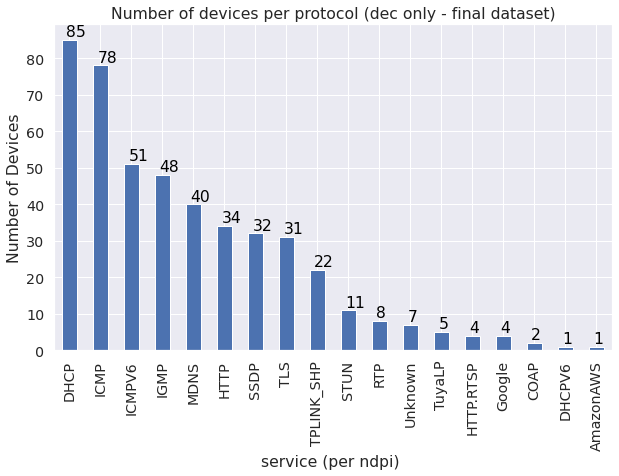

In [13]:
ax = df_sorted_ng.plot(kind='bar', rot=90, figsize=(10, 6), legend=False)
ax.set_xlabel('service (per ndpi) ')
ax.set_ylabel('Number of Devices')
ax.set_title('Number of devices per protocol (dec only - final dataset)')

# Add the numbers on top of each bar
for i, v in enumerate(df_sorted_ng['device_name']):
    ax.text(i - 0.1, v + 1, str(v), color='black')

plt.show()

## Dataset creation and cleanup 

In [312]:
df_tshark['tool'] = 'tshark'
df_zeek['tool'] = 'zeek'
df_ndpi['tool'] = 'ndpi'

In [154]:
df_ndpi[df_ndpi['protocol'] == 17]['ndpi_proto']

3         STUN
11        DHCP
14        STUN
27        STUN
35        STUN
          ... 
550874    MDNS
550875    MDNS
550876    MDNS
550877    MDNS
550888    MDNS
Name: ndpi_proto, Length: 93242, dtype: object

In [314]:
def normalize_protocol_name(protocol_name):
    # Add normalization rules here based on your dataset
    # Example: return protocol_name.lower()
    protocol_name = protocol_name.lower().replace('ajp13', 'ajp')
    protocol_name = protocol_name.lower().replace('tls', 'ssl')
    protocol_name = protocol_name.replace('tplink_shp', 'tplink-smarthome')
    protocol_name = protocol_name.replace('http.rtsp', 'rtsp')

    return protocol_name

In [315]:
df_tshark['normalized_protocol'] = df_tshark['Protocol'].apply(normalize_protocol_name)
df_zeek['service'].fillna('unknown', inplace=True)
df_zeek['normalized_protocol'] = df_zeek['service'].apply(normalize_protocol_name)
df_ndpi['normalized_protocol'] = df_ndpi['ndpi_proto'].apply(normalize_protocol_name)

In [310]:
df_zeek

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,device,date,tool,normalized_protocol
0,1.672216e+09,C86InY2rSpBAkCdBJ3,fe80::271:47ff:fec0:9193,5353,ff02::fb,5353,17,dns,15.840736,1839.0,0.0,S0,0,D,7,2175,0,0,echospot,2022-12-28_03.21.11_192.168.10.201,zeek,dns
1,1.672216e+09,CQJ7m1kKlxr2X0xbf,192.168.10.201,5353,224.0.0.251,5353,17,dns,31.845943,2211.0,0.0,S0,0,D,8,2435,0,0,echospot,2022-12-28_03.21.11_192.168.10.201,zeek,dns
2,1.672216e+09,C7KNi944pQFmt3xQ51,192.168.10.240,48058,192.168.10.201,55443,6,ssl,45.317669,4456.0,3023.0,SF,0,ShADadFf,23,5660,16,3863,echospot,2022-12-28_03.21.11_192.168.10.201,zeek,ssl
3,1.672216e+09,CEqvja45N7yIUHWshb,192.168.10.201,5353,224.0.0.251,5353,17,dns,NaN,NaN,NaN,S0,0,D,1,400,0,0,echospot,2022-12-28_03.21.11_192.168.10.201,zeek,dns
4,1.672216e+09,CaxLSc4PT1mXsEgMi7,fe80::271:47ff:fec0:9193,5353,ff02::fb,5353,17,dns,NaN,NaN,NaN,S0,0,D,1,420,0,0,echospot,2022-12-28_03.21.11_192.168.10.201,zeek,dns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335624,1.672088e+09,CWTtkx2ggiCccXAvoj,0.0.0.0,68,255.255.255.255,67,17,dhcp,0.016058,616.0,0.0,S0,0,D,2,672,0,0,icsee-doorbell,2022-12-25_15.58.41_192.168.10.174,zeek,dhcp
2335625,1.672088e+09,CQn7PcXBUb9DXlSGi,192.168.10.174,68,192.168.10.254,67,17,dhcp,0.412249,0.0,600.0,SHR,0,^d,0,0,2,656,icsee-doorbell,2022-12-25_15.58.41_192.168.10.174,zeek,dhcp
2335626,1.672088e+09,Cd5Nbf4tjz0hU00Mu3,192.168.10.174,59933,255.255.255.255,34571,17,unknown,NaN,NaN,NaN,S0,0,D,1,348,0,0,icsee-doorbell,2022-12-25_15.58.41_192.168.10.174,zeek,unknown
2335627,1.672088e+09,Cp0tv31Ghxpsd9YKfb,192.168.10.174,68,192.168.10.254,67,17,dhcp,2.159344,0.0,900.0,SHR,0,^d,0,0,3,984,icsee-doorbell,2022-12-25_15.58.41_192.168.10.174,zeek,dhcp


In [158]:
df_ndpi['normalized_protocol'].unique()

array(['icmpv6', 'stun', 'ssl', 'dhcp', 'igmp', 'icmp', 'mdns', 'ssdp',
       'tplink-smarthome', 'http', 'rtp', 'tuyalp', 'dhcpv6', 'ajp',
       'coap', 'rtsp', 'ciscovpn', 'ethernetip', 'amazonaws',
       'bittorrent'], dtype=object)

In [159]:
df_tshark['normalized_protocol'].unique()

array(['dhcp', 'ssl', 'mdns', 'udp', 'tcp', 'http', 'irc', 'ssdp', 'rtcp',
       'manolito', 'ams', 'icmp', 'tplink-smarthome', 'enip', 'pmproxy',
       'gre', 'stun', 'ajp', 'rsip', 'lisp', 'mih', 'iax2', 'io-raw',
       'quic', 'ath', 'gryphon', 'tpcp', 'gsmtap', 'ax4000', 'vxlan',
       'esp', 'raknet', 'coap', 'knxnet', 'tzsp', 'adwinconfig'],
      dtype=object)

In [307]:
protocol_mapping = {'udp': 17, 'tcp': 6, 'icmp': 1}
df_zeek['proto'] = df_zeek['proto'].replace(protocol_mapping)

In [317]:
# droping duplicate flows

common_columns = ['src_ip', 'dst_ip', 'src_port', 'dst_port', 'trans_protocol']
df_tshark_common = df_tshark[['device_name', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'tool', 'trans_protocol', 'normalized_protocol', 'file_path']].rename(columns={'file_path': 'file_path_tshark'}).drop_duplicates(subset=common_columns)
df_zeek_common = df_zeek[['id.orig_h', 'id.resp_h', 'id.orig_p', 'id.resp_p', 'tool', 'proto', 'normalized_protocol']].rename(columns={'id.orig_h': 'src_ip', 'id.resp_h': 'dst_ip', 'id.orig_p': 'src_port', 'id.resp_p': 'dst_port', 'proto': 'trans_protocol'}).drop_duplicates(subset=common_columns)
df_ndpi_common = df_ndpi[['device_name', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'tool', 'protocol', 'normalized_protocol', 'file_path']].rename(columns={'protocol': 'trans_protocol', 'file_path': 'file_path_ndpi'}).drop_duplicates(subset=common_columns)

In [162]:
df_ndpi_common['trans_protocol'] = df_ndpi_common['trans_protocol'].astype(int)

In [163]:
df_tshark_common

,device_name,src_ip,dst_ip,src_port,dst_port,tool,trans_protocol,normalized_protocol,file_path_tshark
0,echospot,192.168.10.201,192.168.10.254,68,67,tshark,17,dhcp,/home/aniketh/devel/src/IoT-local/dataset/test...
1,echospot,192.168.10.123,192.168.10.201,60596,55443,tshark,6,ssl,/home/aniketh/devel/src/IoT-local/dataset/test...
2,echospot,192.168.10.201,224.0.0.251,5353,5353,tshark,17,mdns,/home/aniketh/devel/src/IoT-local/dataset/test...
3,echospot,192.168.10.226,192.168.10.201,51990,55443,tshark,6,ssl,/home/aniketh/devel/src/IoT-local/dataset/test...
4,echospot,192.168.10.193,192.168.10.201,50870,50000,tshark,17,udp,/home/aniketh/devel/src/IoT-local/dataset/test...
...,...,...,...,...,...,...,...,...,...
560022,icsee-doorbell,192.168.10.174,255.255.255.255,55050,34571,tshark,17,udp,/home/aniketh/devel/src/IoT-local/dataset/test...
560023,icsee-doorbell,192.168.10.174,255.255.255.255,51133,34571,tshark,17,udp,/home/aniketh/devel/src/IoT-local/dataset/test...
560024,icsee-doorbell,192.168.10.174,255.255.255.255,57217,34571,tshark,17,udp,/home/aniketh/devel/src/IoT-local/dataset/test...
560025,icsee-doorbell,192.168.10.174,255.255.255.255,50523,34571,tshark,17,udp,/home/aniketh/devel/src/IoT-local/dataset/test...


In [164]:
df_ndpi_common

,device_name,src_ip,dst_ip,src_port,dst_port,tool,trans_protocol,normalized_protocol,file_path_ndpi
0,nest-camera,::,ff02::1:ff08:97c5,0,0,ndpi,58,icmpv6,/home/aniketh/devel/src/IoT-local/parsed_dec_n...
1,nest-camera,::,ff02::1:fffb:edc8,0,0,ndpi,58,icmpv6,/home/aniketh/devel/src/IoT-local/parsed_dec_n...
2,nest-camera,::,ff02::1:ffb3:dbd0,0,0,ndpi,58,icmpv6,/home/aniketh/devel/src/IoT-local/parsed_dec_n...
3,nest-camera,192.168.10.153,192.168.10.193,35211,10006,ndpi,17,stun,/home/aniketh/devel/src/IoT-local/parsed_dec_n...
4,nest-camera,::,ff02::1:ffc8:ffd7,0,0,ndpi,58,icmpv6,/home/aniketh/devel/src/IoT-local/parsed_dec_n...
...,...,...,...,...,...,...,...,...,...
550864,homepod,192.168.10.207,192.168.10.107,50712,7000,ndpi,6,rtsp,/home/aniketh/devel/src/IoT-local/parsed_dec_n...
550880,homepod,192.168.10.207,192.168.10.107,63630,50102,ndpi,6,ssl,/home/aniketh/devel/src/IoT-local/parsed_dec_n...
550881,homepod,192.168.10.207,192.168.10.107,63633,50102,ndpi,6,ssl,/home/aniketh/devel/src/IoT-local/parsed_dec_n...
550886,homepod,192.168.10.207,192.168.10.107,63740,50102,ndpi,6,ssl,/home/aniketh/devel/src/IoT-local/parsed_dec_n...


In [165]:
# # cleanup protocol numbers

# df_tshark_common['trans_protocol'] = df_tshark_common['trans_protocol'].replace('TCP', 6)
# df_tshark_common['trans_protocol'] = df_tshark_common['trans_protocol'].replace('UDP', 17)
# df_tshark_common['trans_protocol'] = df_tshark_common['trans_protocol'].replace(17, 1)

# df_ndpi_common['trans_protocol'] = df_ndpi_common['trans_protocol'].astype(int)

# icmp_condition = df_tshark_common['normalized_protocol'] == 'icmp'
# df_tshark_common.loc[icmp_condition, 'trans_protocol'] = df_tshark_common.loc[icmp_condition, 'trans_protocol'].replace(6, 1)

In [166]:
df_tshark_common[df_tshark_common['normalized_protocol'] == 'http']

,device_name,src_ip,dst_ip,src_port,dst_port,tool,trans_protocol,normalized_protocol,file_path_tshark
36,echospot,192.168.10.201,192.168.10.218,42959,49153,tshark,6,http,/home/aniketh/devel/src/IoT-local/dataset/test...
60,echospot,192.168.10.201,192.168.10.218,43004,49153,tshark,6,http,/home/aniketh/devel/src/IoT-local/dataset/test...
72,echospot,192.168.10.201,192.168.10.218,43025,49153,tshark,6,http,/home/aniketh/devel/src/IoT-local/dataset/test...
116,echospot,192.168.10.201,192.168.10.218,43082,49153,tshark,6,http,/home/aniketh/devel/src/IoT-local/dataset/test...
155,echospot,192.168.10.201,192.168.10.218,43119,49153,tshark,6,http,/home/aniketh/devel/src/IoT-local/dataset/test...
...,...,...,...,...,...,...,...,...,...
557844,meross-plug1,192.168.10.232,192.168.10.165,56441,65225,tshark,6,http,/home/aniketh/devel/src/IoT-local/dataset/test...
557845,meross-plug1,192.168.10.207,192.168.10.165,52725,65225,tshark,6,http,/home/aniketh/devel/src/IoT-local/dataset/test...
557846,meross-plug1,192.168.10.207,192.168.10.165,52726,65225,tshark,6,http,/home/aniketh/devel/src/IoT-local/dataset/test...
557847,meross-plug1,192.168.10.232,192.168.10.165,56443,65225,tshark,6,http,/home/aniketh/devel/src/IoT-local/dataset/test...


In [122]:
df_ndpi_common[df_ndpi_common['trans_protocol'] == 17]

,src ip,dst ip,src port,dst port,tool,trans_protocol,normalized_protocol
3,192.168.10.153,192.168.10.193,35211,10006,ndpi,17,stun
11,192.168.10.153,192.168.10.254,68,67,ndpi,17,dhcp
14,192.168.10.153,192.168.10.228,47503,10006,ndpi,17,stun
27,192.168.10.153,192.168.10.228,49081,10006,ndpi,17,stun
35,192.168.10.153,192.168.10.193,37862,10006,ndpi,17,stun
...,...,...,...,...,...,...,...
534955,192.168.10.193,192.168.10.226,47862,50000,ndpi,17,ssdp
534963,192.168.10.160,255.255.255.255,47474,6667,ndpi,17,tuyalp
534966,192.168.10.160,255.255.255.255,59835,6667,ndpi,17,tuyalp
534967,192.168.10.160,255.255.255.255,47058,6667,ndpi,17,tuyalp


In [28]:
df_zeek_common[df_zeek_common['normalized_protocol'] == 'dhcp']

,src ip,dst ip,src port,dst port,tool,normalized_protocol
22,192.168.10.201,192.168.10.254,68,67,zeek,dhcp
39553,192.168.10.196,192.168.10.254,68,67,zeek,dhcp
63109,192.168.10.250,192.168.10.254,68,67,zeek,dhcp
65876,0.0.0.0,255.255.255.255,68,67,zeek,dhcp
90009,192.168.10.216,192.168.10.254,68,67,zeek,dhcp
...,...,...,...,...,...,...
2318662,192.168.10.116,192.168.10.254,68,67,zeek,dhcp
2318710,192.168.10.116,255.255.255.255,68,67,zeek,dhcp
2320278,192.168.10.133,192.168.10.254,68,67,zeek,dhcp
2329878,192.168.10.157,192.168.10.254,68,67,zeek,dhcp


## Calculating the agreement betwwen tshark and ndpi alone

In [208]:
df_tshark_common = df_tshark_common[~df_tshark_common['normalized_protocol'].isin(['udp', 'tcp', 'quic'])]

In [117]:
df_ndpi_tshark = df_ndpi_common.merge(df_tshark_common, on=['src ip', 'dst ip', 'src port', 'dst port'], suffixes=('_ndpi', '_tshark'))
ndpi_tshark_agreement = (df_ndpi_tshark['normalized_protocol_ndpi'] == df_ndpi_tshark['normalized_protocol_tshark']).sum() / df_ndpi_tshark.shape[0] * 100

In [118]:
print("Agreement between the protocols labels between tshark and ndpi {}".format((ndpi_tshark_agreement)))

Agreement between the protocols labels between tshark and ndpi 99.67688213390579


In [1536]:
df_ndpi_tshark[df_ndpi_tshark['normalized_protocol_tshark'] == 'unknown']

,device_name_ndpi,src_ip,dst_ip,src_port,dst_port,tool_ndpi,trans_protocol_ndpi,normalized_protocol_ndpi,file_path_ndpi,device_name_tshark,tool_tshark,trans_protocol_tshark,normalized_protocol_tshark,file_path_tshark


In [120]:
print("total common flows, ndpi and tshark {}".format(format_number(df_ndpi_tshark.shape[0])))

total common flows, ndpi and tshark 180.7K


### Heatmap between protocols

In [123]:
# data=df_ndpi_common.merge(df_tshark_common, on=['src ip', 'dst ip', 'src port', 'dst port'], how='outer')
# data

In [124]:
# intersection = pd.merge(df_tshark_common, df_ndpi_common, on=['src ip', 'dst ip', 'src port', 'dst port'], how='inner', suffixes=('_tshark', '_ndpi'))
# intersection.shape[0]

In [182]:
merged_df[(merged_df['normalized_protocol_ndpi'] == 'undetected') & (merged_df['src port'] == 34464)]

,device_name_tshark,src ip,dst ip,src port,dst port,tool_tshark,trans_protocol,normalized_protocol_tshark,file_path_tshark,device_name_ndpi,tool_ndpi,normalized_protocol_ndpi,file_path_ndpi
7957,google-home-mini3,192.168.10.239,192.168.10.164,34464,80.0,tshark,6,http,/home/aniketh/devel/src/IoT-local/results/tsha...,undetected,undetected,undetected,undetected
8132,google-home-mini3,192.168.10.180,192.168.10.239,34464,10005.0,tshark,6,tls,/home/aniketh/devel/src/IoT-local/results/tsha...,undetected,undetected,undetected,undetected
30448,lgtv-wired,192.168.10.249,192.168.10.238,34464,50000.0,tshark,1,unknown-L3,/home/aniketh/devel/src/IoT-local/results/tsha...,undetected,undetected,undetected,undetected
78403,echospot,192.168.10.201,192.168.10.254,34464,7.0,tshark,6,unknown-L3,/home/aniketh/devel/src/IoT-local/results/tsha...,undetected,undetected,undetected,undetected
256851,firetv,192.168.10.151,192.168.10.254,34464,7.0,tshark,6,unknown-L3,/home/aniketh/devel/src/IoT-local/results/tsha...,undetected,undetected,undetected,undetected


In [91]:
df_tshark_common['normalized_protocol'] = df_tshark_common['normalized_protocol'].replace(['udp', 'tcp', 'quic'], 'unknown-L3')

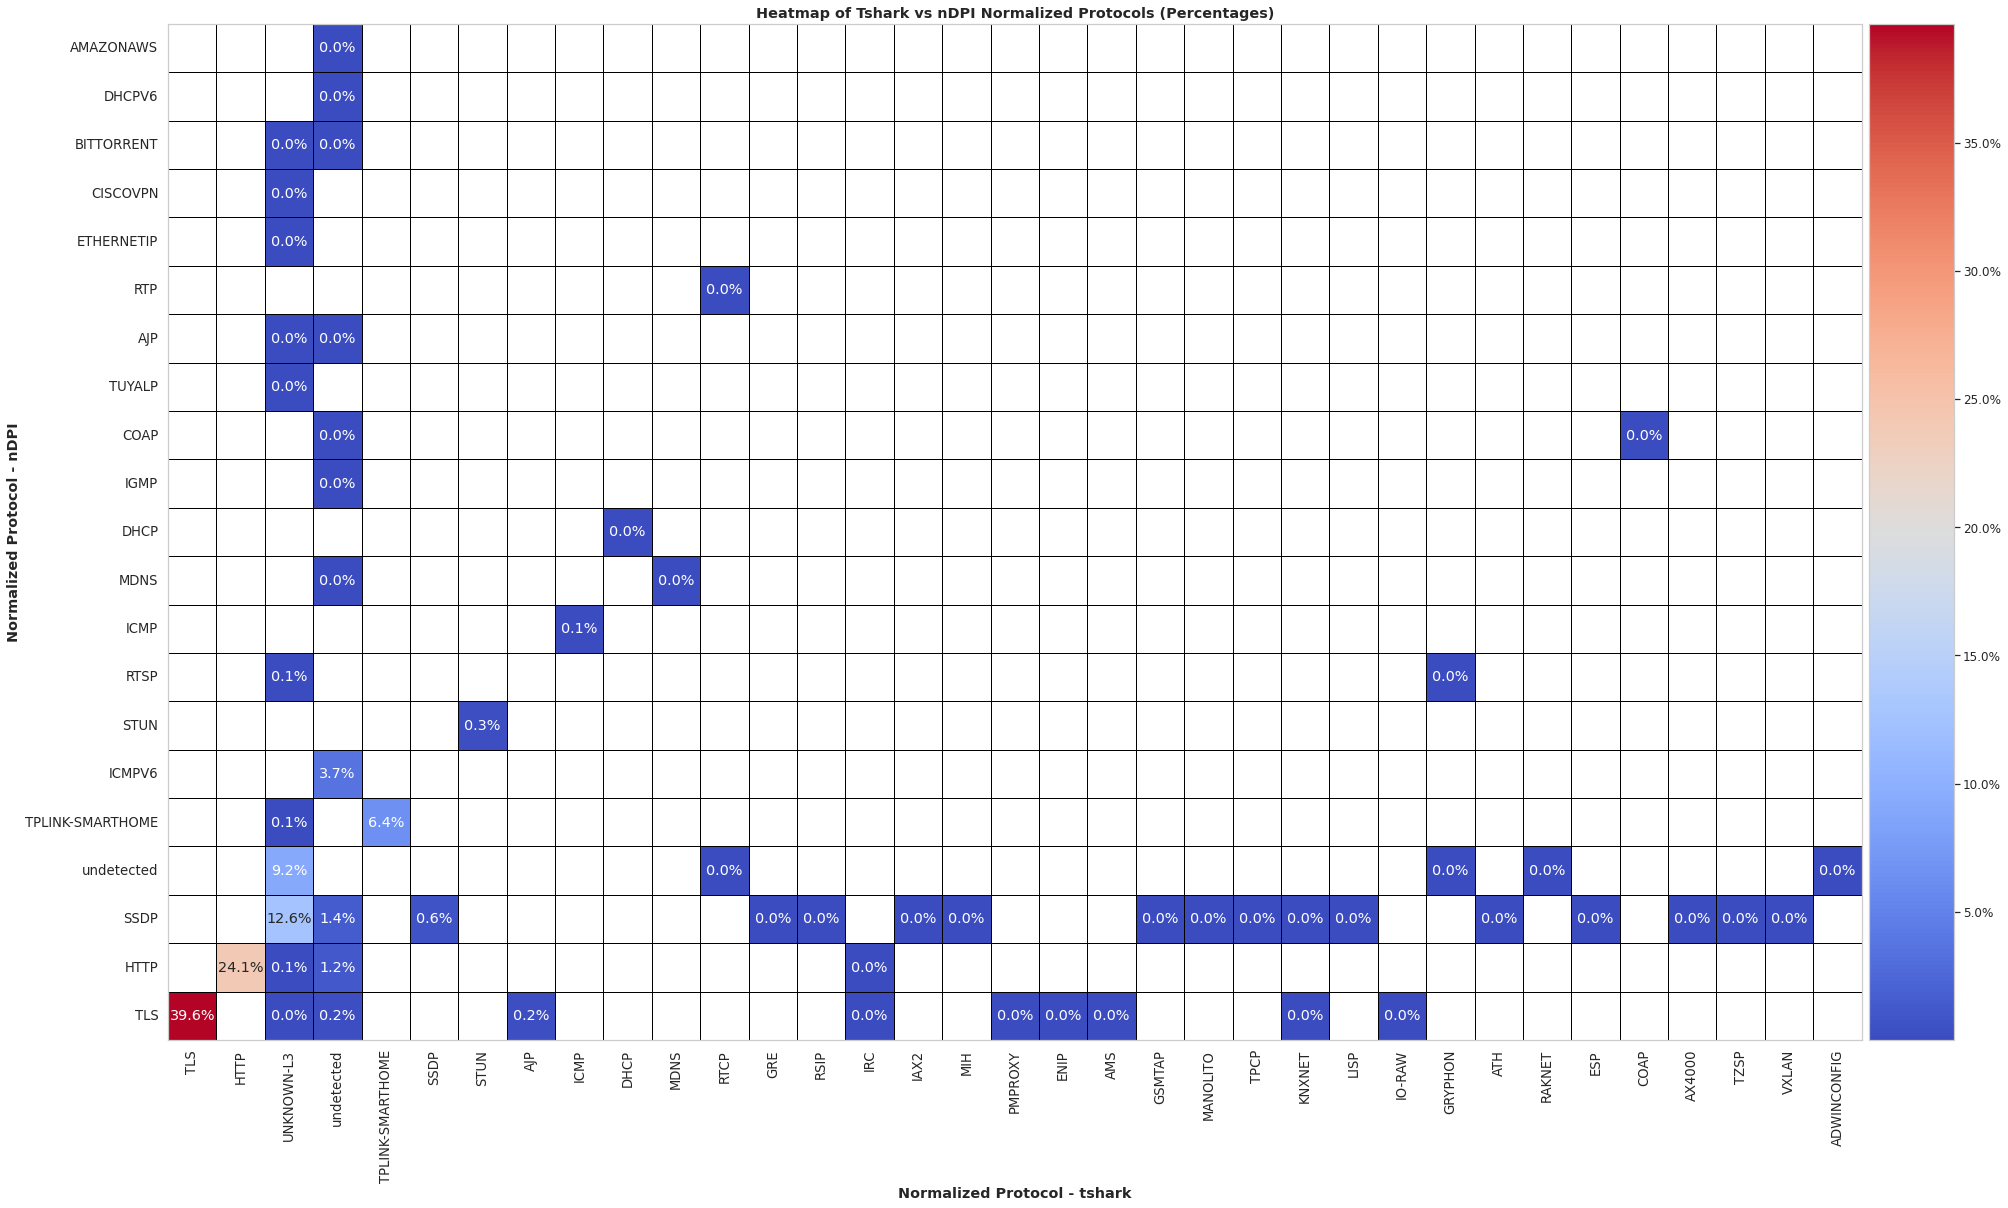

In [232]:
%matplotlib inline

merged_df = pd.merge(df_tshark_common, df_ndpi_common, on=['src_ip', 'dst_ip', 'src_port', 'dst_port', 'trans_protocol'], how='outer', suffixes=('_tshark', '_ndpi'))
merged_df = merged_df.replace(np.nan, 'undetected', regex=True)

# Create a crosstab to count the frequency of each combination of normalized_protocol_tshark and normalized_protocol_ndpi
protocol_crosstab = pd.crosstab(merged_df['normalized_protocol_ndpi'], merged_df['normalized_protocol_tshark'])
total_pairs = protocol_crosstab.sum().sum()
protocol_crosstab_normalized =  protocol_crosstab / total_pairs

row_sums = protocol_crosstab_normalized.sum(axis=1).sort_values(ascending=True)
col_sums = protocol_crosstab_normalized.sum(axis=0).sort_values(ascending=False)
protocol_crosstab_normalized = protocol_crosstab_normalized.loc[row_sums.index, col_sums.index]

mask = protocol_crosstab_normalized == 0
formatted_annotation = np.vectorize(format_number)(protocol_crosstab_normalized.loc[row_sums.index, col_sums.index])


# Normalize the crosstab values by the total number of pairs
from mpl_toolkits.axes_grid1 import make_axes_locatable

mask = protocol_crosstab_normalized == 0

annot_max = protocol_crosstab_normalized.max().max()

plt.figure(figsize=(32, 42))
plt.title('Heatmap of Tshark vs nDPI Normalized Protocols (Percentages)', fontweight='bold')
sns.set(font_scale=1.2)
ax = plt.gca()
sns.set_style("whitegrid")

sns.heatmap(protocol_crosstab_normalized, 
            mask=mask, annot=True, cbar=False, 
            square=True, fmt='.1%', linecolor='black',
            linewidths=1, vmax=annot_max, 
            cmap='coolwarm')

for _, spine in ax.spines.items():
    spine.set_visible(True)

plt.xlabel('Normalized Protocol - tshark', fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel('Normalized Protocol - nDPI', fontweight='bold')

# Create a separate colorbar with custom height
def percentage_formatter(x, pos):
    return f"{x:.1%}"

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(ax.get_children()[0], cax=cax)

# Apply custom formatter to the colorbar
cbar.ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
cbar.ax.tick_params(labelsize=12)  # Adjust the font size of the colorbar labels

plt.savefig("heatmap_protocol_classifiers_percentage.pdf", transparent=True, bbox_inches='tight')

plt.show()

In [95]:
# new_order = list(protocol_crosstab_normalized.columns)
# new_order.remove('undetected')
# new_order.insert(0, 'undetected')
# new_order.remove('unknown-L3')
# new_order.insert(2, 'unknown-L3')
# new_order.remove('irc')
# new_order.insert(4, 'irc')
# new_order.remove('coap')
# new_order.insert(5, 'coap')
# new_order.remove('dhcp')
# new_order.insert(6, 'dhcp')
# new_order.remove('unknown')
# new_order.insert(36, 'unknown')
# # Reorder the columns in the DataFrame
# protocol_crosstab_normalized = protocol_crosstab_normalized[new_order]

In [96]:
# # Define the new order of rows
# new_order = list(protocol_crosstab_normalized.index)
# new_order.remove('undetected')
# new_order.insert(23, 'undetected')
# new_order.remove('unknown')
# new_order.insert(0, 'unknown')
# # Reorder the rows in the DataFrame
# protocol_crosstab_normalized = protocol_crosstab_normalized.reindex(new_order)

--------

In [160]:
df_tshark_common[(df_tshark_common['normalized_protocol'] == 'icmp') & (df_tshark_common['src port'] == 53)]

,device_name,src ip,dst ip,src port,dst port,tool,trans_protocol,normalized_protocol,file_path_tshark
14917,ikea-hub,"192.168.10.185,155.33.33.75","155.33.33.75,192.168.10.185",53,52487,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
14918,ikea-hub,"192.168.10.185,155.33.33.75","155.33.33.75,192.168.10.185",53,57159,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
14919,ikea-hub,"192.168.10.185,155.33.33.70","155.33.33.70,192.168.10.185",53,62757,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
14920,ikea-hub,"192.168.10.185,155.33.33.75","155.33.33.75,192.168.10.185",53,59334,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
14921,ikea-hub,"192.168.10.185,155.33.33.75","155.33.33.75,192.168.10.185",53,64498,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
...,...,...,...,...,...,...,...,...,...
594878,google-home-mini2,"192.168.10.102,8.8.8.8","8.8.8.8,192.168.10.102",53,57415,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
594880,google-home-mini2,"192.168.10.102,8.8.8.8","8.8.8.8,192.168.10.102",53,33683,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
594882,google-home-mini2,"192.168.10.102,8.8.8.8","8.8.8.8,192.168.10.102",53,59843,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
594889,google-home-mini2,"192.168.10.102,8.8.8.8","8.8.8.8,192.168.10.102",53,53737,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...


In [178]:
df_tshark_common = df_tshark_common[~((df_tshark_common['normalized_protocol'] == 'icmp') & (df_tshark_common['src port'] == 53))]

In [170]:
file_path = df_tshark_common.loc[14917, 'file_path_tshark']

In [171]:
file_path

'/home/aniketh/devel/src/IoT-local/results/tshark_results/parsed_dec/ikea-hub_2022-12-27_15.14.33_192.168.10.185.csv'

In [162]:
df_tshark_common[df_tshark_common['normalized_protocol'] == 'icmp']

,device_name,src ip,dst ip,src port,dst port,tool,trans_protocol,normalized_protocol,file_path_tshark
14917,ikea-hub,"192.168.10.185,155.33.33.75","155.33.33.75,192.168.10.185",53,52487,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
14918,ikea-hub,"192.168.10.185,155.33.33.75","155.33.33.75,192.168.10.185",53,57159,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
14919,ikea-hub,"192.168.10.185,155.33.33.70","155.33.33.70,192.168.10.185",53,62757,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
14920,ikea-hub,"192.168.10.185,155.33.33.75","155.33.33.75,192.168.10.185",53,59334,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
14921,ikea-hub,"192.168.10.185,155.33.33.75","155.33.33.75,192.168.10.185",53,64498,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
...,...,...,...,...,...,...,...,...,...
594878,google-home-mini2,"192.168.10.102,8.8.8.8","8.8.8.8,192.168.10.102",53,57415,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
594880,google-home-mini2,"192.168.10.102,8.8.8.8","8.8.8.8,192.168.10.102",53,33683,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
594882,google-home-mini2,"192.168.10.102,8.8.8.8","8.8.8.8,192.168.10.102",53,59843,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...
594889,google-home-mini2,"192.168.10.102,8.8.8.8","8.8.8.8,192.168.10.102",53,53737,tshark,1,icmp,/home/aniketh/devel/src/IoT-local/results/tsha...


In [166]:
# Check if the source IP address has a comma in the string
mask = df_tshark_common['src ip'].str.contains(',')

# Filter the DataFrame to show only the rows where the source IP address has a comma
df_filtered = df_tshark_common[mask]

# Print the filtered DataFrame
print(df_filtered)

              device_name                       src ip  \
14917            ikea-hub  192.168.10.185,155.33.33.75   
14918            ikea-hub  192.168.10.185,155.33.33.75   
14919            ikea-hub  192.168.10.185,155.33.33.70   
14920            ikea-hub  192.168.10.185,155.33.33.75   
14921            ikea-hub  192.168.10.185,155.33.33.75   
...                   ...                          ...   
594878  google-home-mini2       192.168.10.102,8.8.8.8   
594880  google-home-mini2       192.168.10.102,8.8.8.8   
594882  google-home-mini2       192.168.10.102,8.8.8.8   
594889  google-home-mini2       192.168.10.102,8.8.8.8   
594892  google-home-mini2       192.168.10.102,8.8.8.8   

                             dst ip src port  dst port    tool  \
14917   155.33.33.75,192.168.10.185       53     52487  tshark   
14918   155.33.33.75,192.168.10.185       53     57159  tshark   
14919   155.33.33.70,192.168.10.185       53     62757  tshark   
14920   155.33.33.75,192.168.10.185    

In [157]:
df_ndpi_common[df_ndpi_common['normalized_protocol'] == 'icmp']

,device_name,src ip,dst ip,src port,dst port,tool,trans_protocol,normalized_protocol,file_path_ndpi
103,nest-camera,192.168.10.153,192.168.10.117,0,0,ndpi,1,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
130,nest-camera,192.168.10.153,192.168.10.193,0,0,ndpi,1,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
139,nest-camera,192.168.10.153,192.168.10.228,0,0,ndpi,1,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
143,nest-camera,192.168.10.153,192.168.10.239,0,0,ndpi,1,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
147,nest-camera,192.168.10.153,192.168.10.254,0,0,ndpi,1,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
...,...,...,...,...,...,...,...,...,...
534979,homepod,192.168.10.107,17.188.143.251,0,0,ndpi,1,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
534983,homepod,192.168.10.107,17.188.178.58,0,0,ndpi,1,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
534984,homepod,192.168.10.107,17.188.172.68,0,0,ndpi,1,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
534997,homepod,192.168.10.107,17.188.182.200,0,0,ndpi,1,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...


In [151]:
merged_df[(merged_df['normalized_protocol_tshark'] == 'undetected') & (merged_df['normalized_protocol_ndpi'] == 'icmp')]

,device_name_tshark,src ip,dst ip,src port,dst port,tool_tshark,trans_protocol,normalized_protocol_tshark,file_path_tshark,device_name_ndpi,tool_ndpi,normalized_protocol_ndpi,file_path_ndpi
327680,undetected,192.168.10.153,192.168.10.117,0,0.0,undetected,1,undetected,undetected,nest-camera,ndpi,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
327698,undetected,192.168.10.153,192.168.10.193,0,0.0,undetected,1,undetected,undetected,nest-camera,ndpi,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
327706,undetected,192.168.10.153,192.168.10.228,0,0.0,undetected,1,undetected,undetected,nest-camera,ndpi,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
327709,undetected,192.168.10.153,192.168.10.239,0,0.0,undetected,1,undetected,undetected,nest-camera,ndpi,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
327712,undetected,192.168.10.153,192.168.10.254,0,0.0,undetected,1,undetected,undetected,nest-camera,ndpi,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445320,undetected,192.168.10.107,17.188.143.251,0,0.0,undetected,1,undetected,undetected,homepod,ndpi,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
445321,undetected,192.168.10.107,17.188.178.58,0,0.0,undetected,1,undetected,undetected,homepod,ndpi,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
445322,undetected,192.168.10.107,17.188.172.68,0,0.0,undetected,1,undetected,undetected,homepod,ndpi,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...
445323,undetected,192.168.10.107,17.188.182.200,0,0.0,undetected,1,undetected,undetected,homepod,ndpi,icmp,/home/aniketh/devel/src/IoT-local/results/ndpi...


In [125]:
def format_number(num):
    if num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num / 1_000:.1f}K"
    else:
        return str(num)

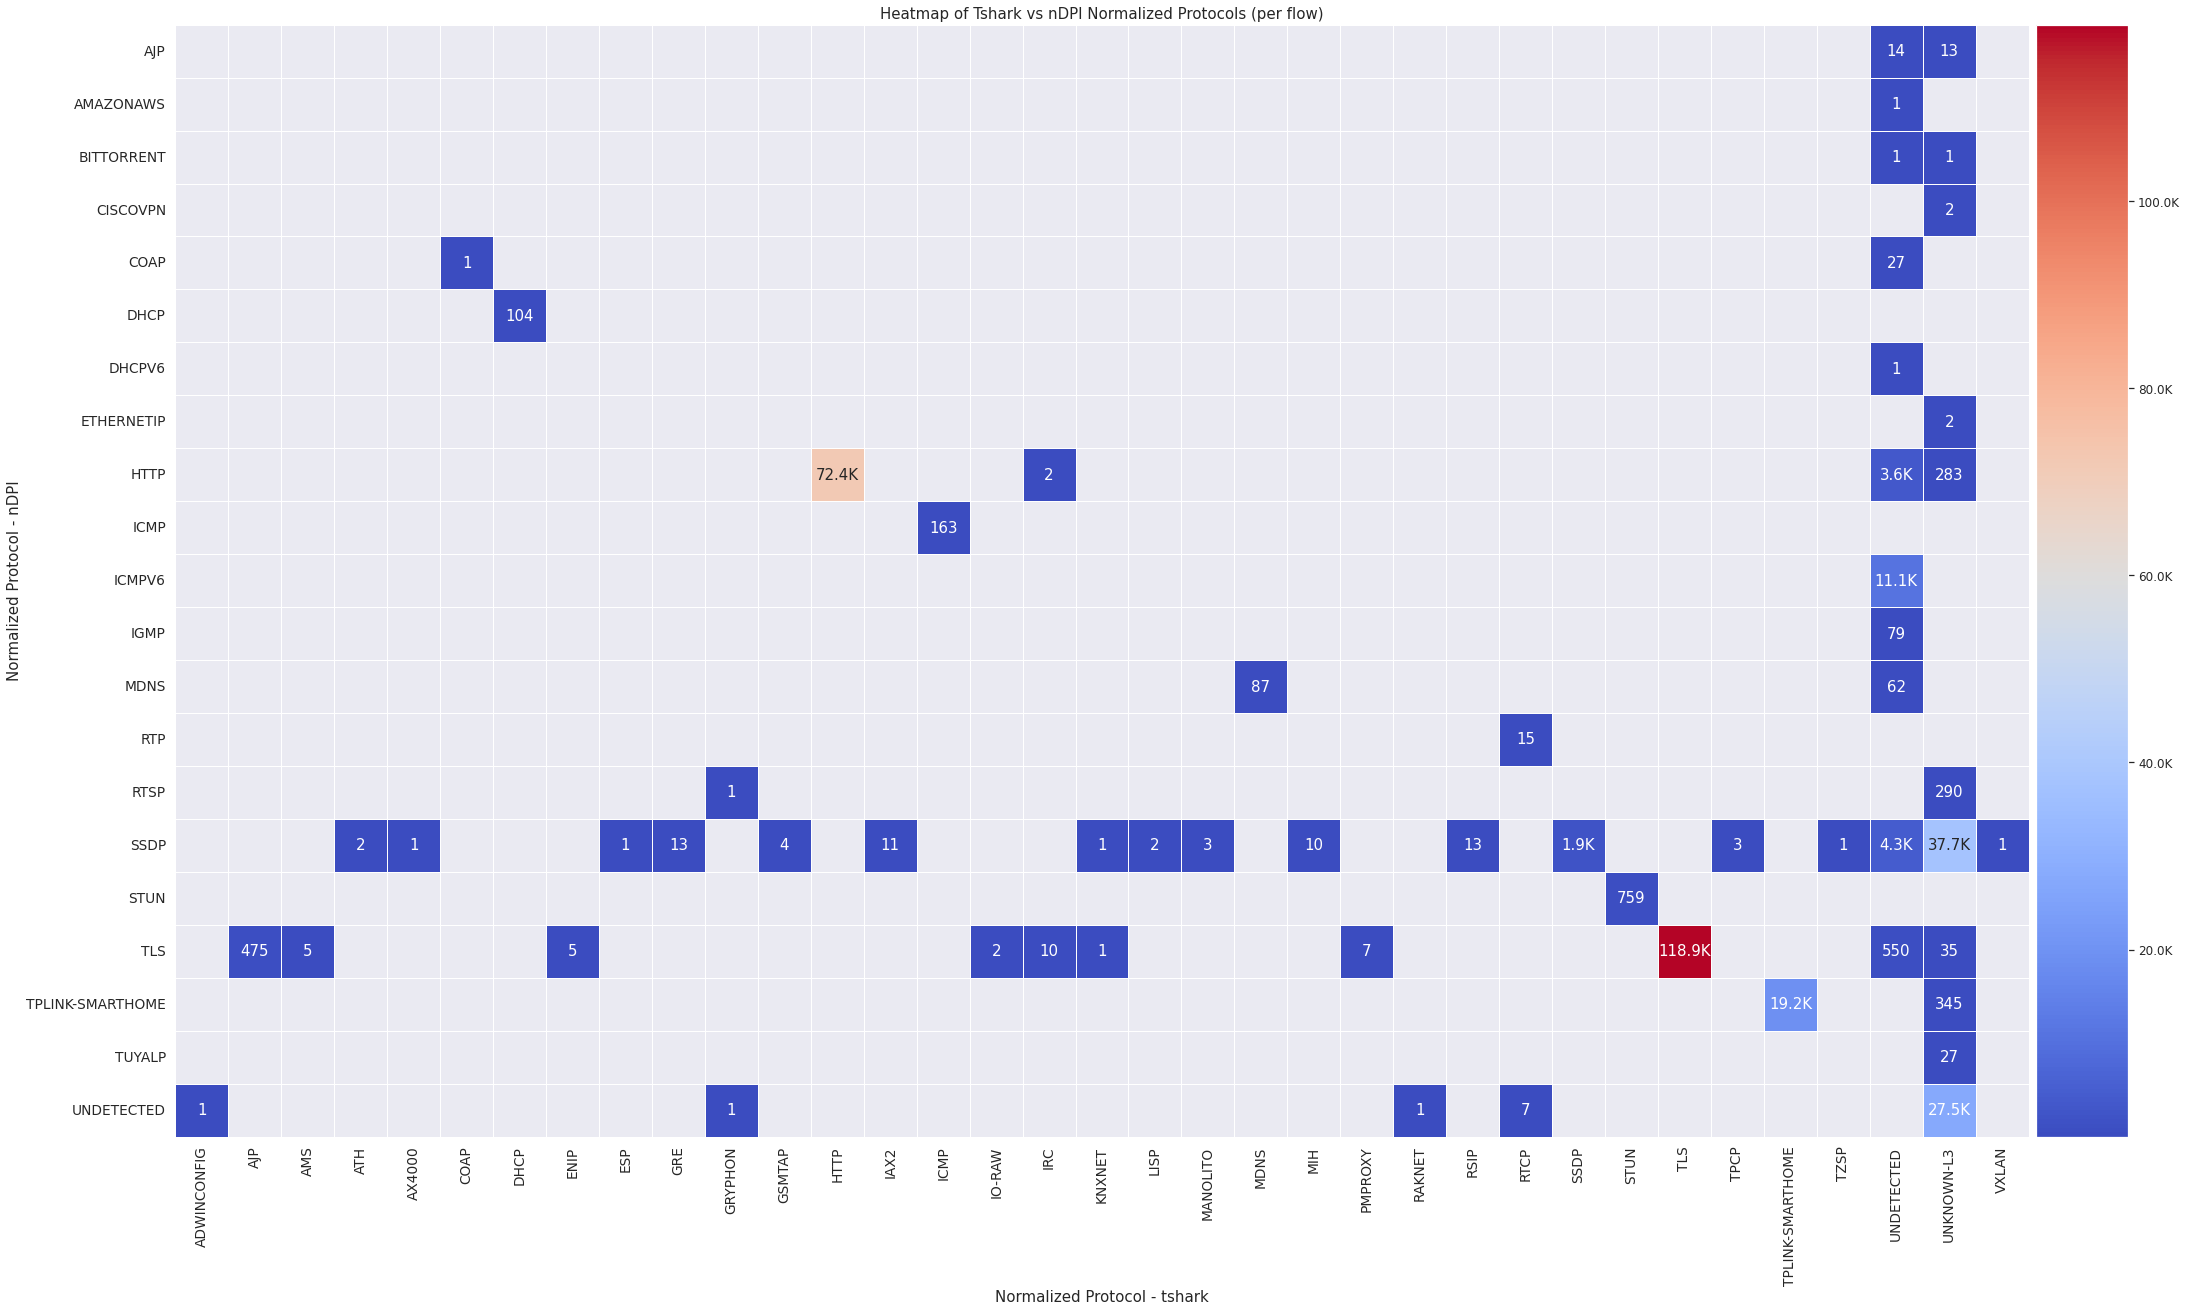

In [233]:
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

df_tshark_common['normalized_protocol'] = df_tshark_common['normalized_protocol'].replace(['udp', 'tcp', 'quic'], 'unknown-L3')
df_tshark_common['normalized_protocol'] = df_tshark_common['normalized_protocol'].replace('ssl', 'tls')
df_ndpi_common['normalized_protocol'] = df_ndpi_common['normalized_protocol'].replace('ssl', 'tls')

merged_df = pd.merge(df_tshark_common, df_ndpi_common, on=['src_ip', 'dst_ip', 'src_port', 'dst_port', 'trans_protocol'], how='outer', suffixes=('_tshark', '_ndpi'))
merged_df = merged_df.replace(np.nan, 'undetected', regex=True)

merged_df['normalized_protocol_tshark'] = merged_df['normalized_protocol_tshark'].str.upper()
merged_df['normalized_protocol_ndpi'] = merged_df['normalized_protocol_ndpi'].str.upper()

# Create a crosstab to count the frequency of each combination of normalized_protocol_tshark and normalized_protocol_ndpi
protocol_crosstab_normalized = pd.crosstab(merged_df['normalized_protocol_ndpi'], merged_df['normalized_protocol_tshark'])

# new_order = list(protocol_crosstab_normalized.columns)
# new_order.remove('undetected')
# new_order.insert(0, 'undetected')
# new_order.remove('unknown-L3')
# new_order.insert(2, 'unknown-L3')
# new_order.remove('irc')
# new_order.insert(4, 'irc')
# new_order.remove('coap')
# new_order.insert(5, 'coap')
# new_order.remove('dhcp')
# new_order.insert(6, 'dhcp')
# new_order.remove('unknown')
# new_order.insert(36, 'unknown')
# # Reorder the columns in the DataFrame
# protocol_crosstab_normalized = protocol_crosstab_normalized[new_order]

# # Define the new order of rows
# new_order = list(protocol_crosstab_normalized.index)
# new_order.remove('undetected')
# new_order.insert(23, 'undetected')
# new_order.remove('unknown')
# new_order.insert(0, 'unknown')
# # Reorder the rows in the DataFrame
# protocol_crosstab_normalized = protocol_crosstab_normalized.reindex(new_order)

formatted_annotation = np.vectorize(format_number)(protocol_crosstab_normalized)

mask = protocol_crosstab_normalized == 0

# Create the heatmap with actual numbers instead of percentages
plt.figure(figsize=(35, 28))
sns.set(font_scale=1.25)
ax = plt.gca()

sns.heatmap(protocol_crosstab_normalized, mask=mask, cmap='coolwarm', annot=formatted_annotation, cbar=False, square=True, fmt='', linewidths=0.5)
plt.xlabel('Normalized Protocol - tshark')
plt.ylabel('Normalized Protocol - nDPI')
plt.title('Heatmap of Tshark vs nDPI Normalized Protocols (per flow)')

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cbar = plt.colorbar(ax.get_children()[0], cax=cax)
# cbar.ax.tick_params(labelsize=12)  # Adjust the font size of the colorbar labels

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(ax.get_children()[0], cax=cax)

# Custom formatter for the colorbar
cbar_formatter = FuncFormatter(lambda x, pos: format_number(x))
cbar.ax.yaxis.set_major_formatter(cbar_formatter)

cbar.ax.tick_params(labelsize=12)

plt.savefig("heatmap_protocol_classifiers_per_flow.pdf", transparent=True)

plt.show()

In [236]:
merged_df[merged_df['normalized_protocol_ndpi'] == 'BITTORRENT']

,device_name_tshark,src_ip,dst_ip,src_port,dst_port,tool_tshark,trans_protocol,normalized_protocol_tshark,file_path_tshark,device_name_ndpi,tool_ndpi,normalized_protocol_ndpi,file_path_ndpi
269812,echoplus,192.168.10.100,192.168.10.254,53646.0,7.0,tshark,6,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test...,echoplus,ndpi,BITTORRENT,/home/aniketh/devel/src/IoT-local/parsed_dec_n...
298543,undetected,fe80::401:f71f:7d36:81ec,fe80::4ae1:e9ff:fe97:17c1,51413.0,64281.0,undetected,6,UNDETECTED,undetected,meross-plug2,ndpi,BITTORRENT,/home/aniketh/devel/src/IoT-local/parsed_dec_n...


In [250]:
merged_df[merged_df['normalized_protocol_ndpi'] == 'BITTORRENT'].loc[269812, 'file_path_tshark']

'/home/aniketh/devel/src/IoT-local/dataset/test-flows/echoplus/2022-12-26_15.59.40_192.168.10.100.csv'

In [248]:
merged_df[merged_df['normalized_protocol_ndpi'] == 'CISCOVPN']

,device_name_tshark,src_ip,dst_ip,src_port,dst_port,tool_tshark,trans_protocol,normalized_protocol_tshark,file_path_tshark,device_name_ndpi,tool_ndpi,normalized_protocol_ndpi,file_path_ndpi
65355,chromecast-googletv,192.168.10.240,192.168.10.117,42770.0,8008.0,tshark,6,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test...,chromecast-googletv,ndpi,CISCOVPN,/home/aniketh/devel/src/IoT-local/parsed_dec_n...
68591,chromecast-googletv,192.168.10.226,192.168.10.117,50568.0,8008.0,tshark,6,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test...,echodot3uk,ndpi,CISCOVPN,/home/aniketh/devel/src/IoT-local/parsed_dec_n...


In [238]:
merged_df[merged_df['normalized_protocol_ndpi'] == 'ETHERNETIP']

,device_name_tshark,src_ip,dst_ip,src_port,dst_port,tool_tshark,trans_protocol,normalized_protocol_tshark,file_path_tshark,device_name_ndpi,tool_ndpi,normalized_protocol_ndpi,file_path_ndpi
17380,echospot,192.168.10.201,192.168.10.254,44818.0,7.0,tshark,6,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test...,echospot,ndpi,ETHERNETIP,/home/aniketh/devel/src/IoT-local/parsed_dec_n...
70686,chromecast-googletv,192.168.10.117,192.168.10.181,44818.0,8012.0,tshark,6,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test...,chromecast-googletv,ndpi,ETHERNETIP,/home/aniketh/devel/src/IoT-local/parsed_dec_n...


In [239]:
merged_df[merged_df['normalized_protocol_ndpi'] == 'ETHERNETIP'].loc[70686, 'file_path_tshark']

'/home/aniketh/devel/src/IoT-local/dataset/test-flows/chromecast-googletv/2022-12-23_16.00.42_192.168.10.117.csv'

-------

In [1545]:
merged_df[merged_df['normalized_protocol_tshark'] == 'UNKNOWN-L3']

,device_name_tshark,src_ip,dst_ip,src_port,dst_port,tool_tshark,trans_protocol,normalized_protocol_tshark,file_path_tshark,device_name_ndpi,tool_ndpi,normalized_protocol_ndpi,file_path_ndpi
4,echospot,192.168.10.193,192.168.10.201,50870.0,50000.0,tshark,17.0,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test-flows/echospot/2022-12-25_08.14.28_192.168.10.201.csv,echospot,ndpi,SSDP,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/echospot-2022-12-25_08.14.28_192.168.10.201.csv
5,echospot,192.168.10.201,192.168.10.254,47632.0,7.0,tshark,6.0,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test-flows/echospot/2022-12-25_08.14.28_192.168.10.201.csv,undetected,undetected,UNDETECTED,undetected
6,echospot,192.168.10.249,192.168.10.201,54822.0,50000.0,tshark,17.0,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test-flows/echospot/2022-12-25_08.14.28_192.168.10.201.csv,lgtv-wired,ndpi,SSDP,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/lgtv-wired-2022-12-24_17.57.39_192.168.10.249.csv
11,echospot,192.168.10.201,192.168.10.118,47009.0,55443.0,tshark,6.0,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test-flows/echospot/2022-12-25_08.14.28_192.168.10.201.csv,undetected,undetected,UNDETECTED,undetected
18,echospot,192.168.10.193,192.168.10.201,58656.0,50000.0,tshark,17.0,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test-flows/echospot/2022-12-25_08.14.28_192.168.10.201.csv,echospot,ndpi,SSDP,/home/aniketh/devel/src/IoT-local/parsed_dec_new_with_guessing/echospot-2022-12-25_08.14.28_192.168.10.201.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280256,icsee-doorbell,192.168.10.174,255.255.255.255,55050.0,34571.0,tshark,17.0,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test-flows/icsee-doorbell/2022-12-26_15.58.43_192.168.10.174.csv,undetected,undetected,UNDETECTED,undetected
280257,icsee-doorbell,192.168.10.174,255.255.255.255,51133.0,34571.0,tshark,17.0,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test-flows/icsee-doorbell/2022-12-26_15.58.43_192.168.10.174.csv,undetected,undetected,UNDETECTED,undetected
280258,icsee-doorbell,192.168.10.174,255.255.255.255,57217.0,34571.0,tshark,17.0,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test-flows/icsee-doorbell/2022-12-26_15.58.43_192.168.10.174.csv,undetected,undetected,UNDETECTED,undetected
280259,icsee-doorbell,192.168.10.174,255.255.255.255,50523.0,34571.0,tshark,17.0,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test-flows/icsee-doorbell/2022-12-26_15.58.43_192.168.10.174.csv,undetected,undetected,UNDETECTED,undetected


In [665]:
len(protocol_crosstab_normalized.index)

18

In [666]:
len(protocol_crosstab_normalized.columns)

35

In [1558]:
protocol_crosstab_normalized_log['UNDETECTED'].sum()

20.904572576427473

In [1555]:
protocol_crosstab_normalized_log

normalized_protocol_tshark,TLS,HTTP,SSDP,TPLINK-SMARTHOME,STUN,ICMP,DHCP,MDNS,RTCP,COAP,UNDETECTED,UNKNOWN-L3,ADWINCONFIG,AJP,AMS,ATH,AX4000,ENIP,ESP,GRE,GRYPHON,GSMTAP,IAX2,IO-RAW,IRC,KNXNET,LISP,MANOLITO,MIH,PMPROXY,RAKNET,RSIP,TPCP,TZSP,VXLAN
normalized_protocol_ndpi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AJP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.176091,1.146128,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
AMAZONAWS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.301030,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
DHCPV6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.301030,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
ICMPV6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,4.043794,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
IGMP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.903090,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
RTSP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,2.463893,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.30103,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
TUYALP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.447158,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000
UNDETECTED,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.90309,0.00000,0.000000,4.438780,0.30103,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.30103,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.30103,0.000000,0.00000,0.00000,0.00000
COAP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.30103,1.447158,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000


In [1684]:
merged_df[['normalized_protocol_tshark', 'device_name_tshark']].groupby('normalized_protocol_tshark').nunique()

# df_ndpi_grouped_app = df_ndpi_apps[['ndpi_proto', 'app_name']].groupby('ndpi_proto').nunique()


,device_name_tshark
normalized_protocol_tshark,
ADWINCONFIG,1
AJP,9
AMS,4
ATH,2
AX4000,1
COAP,1
DHCP,86
ENIP,4
ESP,1


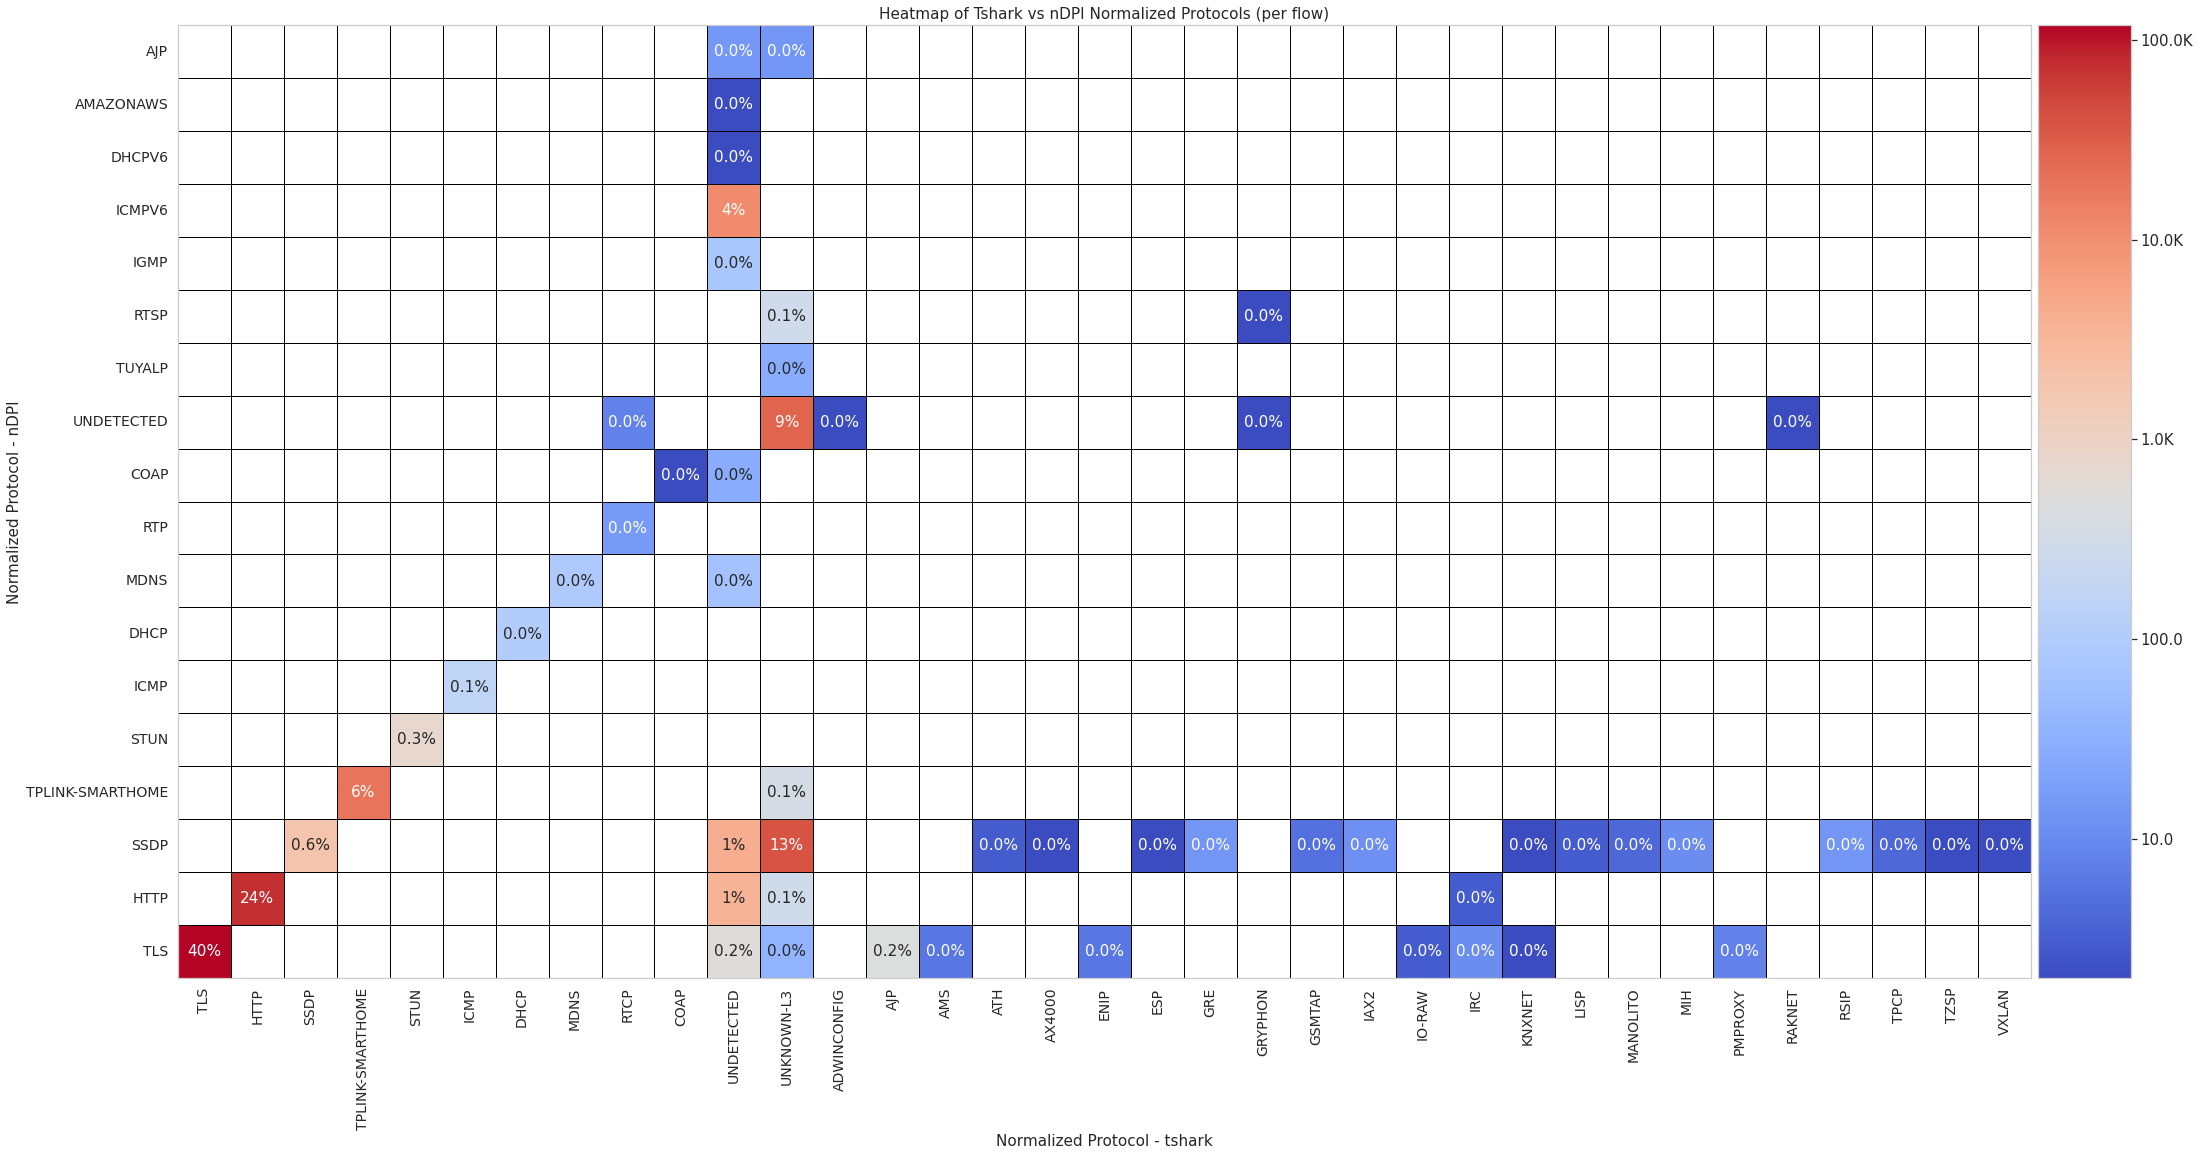

In [1553]:
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

df_tshark_common['normalized_protocol'] = df_tshark_common['normalized_protocol'].replace(['udp', 'tcp', 'quic'], 'unknown-L3')
df_tshark_common['normalized_protocol'] = df_tshark_common['normalized_protocol'].replace('ssl', 'tls')
df_ndpi_common['normalized_protocol'] = df_ndpi_common['normalized_protocol'].replace('ssl', 'tls')

merged_df = pd.merge(df_tshark_common, df_ndpi_common, on=['src_ip', 'dst_ip', 'src_port', 'dst_port', 'trans_protocol'], how='outer', suffixes=('_tshark', '_ndpi'))
merged_df = merged_df.replace(np.nan, 'undetected', regex=True)

merged_df['normalized_protocol_tshark'] = merged_df['normalized_protocol_tshark'].str.upper()
merged_df['normalized_protocol_ndpi'] = merged_df['normalized_protocol_ndpi'].str.upper()


# Create a crosstab to count the frequency of each combination of normalized_protocol_tshark and normalized_protocol_ndpi
protocol_crosstab_normalized = pd.crosstab(merged_df['normalized_protocol_ndpi'], merged_df['normalized_protocol_tshark'])

# total_pairs = protocol_crosstab_normalized.sum().sum()
# protocol_crosstab_normalized =  protocol_crosstab_normalized / total_pairs


new_order = list(protocol_crosstab_normalized.columns)
new_order.remove('TLS')
new_order.insert(0, 'TLS')
new_order.remove('HTTP')
new_order.insert(1, 'HTTP')
new_order.remove('SSDP')
new_order.insert(2, 'SSDP')
new_order.remove('TPLINK-SMARTHOME')
new_order.insert(3, 'TPLINK-SMARTHOME')
new_order.remove('STUN')
new_order.insert(4, 'STUN')
new_order.remove('ICMP')
new_order.insert(5, 'ICMP')
new_order.remove('DHCP')
new_order.insert(6, 'DHCP')
new_order.remove('MDNS')
new_order.insert(7, 'MDNS')
new_order.remove('RTCP')
new_order.insert(8, 'RTCP')
new_order.remove('COAP')
new_order.insert(9, 'COAP')
new_order.remove('UNDETECTED')
new_order.insert(10, 'UNDETECTED')
new_order.remove('UNKNOWN-L3')
new_order.insert(11, 'UNKNOWN-L3')
# new_order.remove('AJP')
# new_order.insert(5, 'AJP')
# new_order.remove('coap')
# new_order.insert(5, 'coap')
# new_order.remove('dhcp')
# new_order.insert(6, 'dhcp')
# new_order.remove('unknown')
# new_order.insert(36, 'unknown')
# Reorder the columns in the DataFrame
protocol_crosstab_normalized = protocol_crosstab_normalized[new_order]

# row_sums = protocol_crosstab_normalized.sum(axis=1).sort_values(ascending=True)
# col_sums = protocol_crosstab_normalized.sum(axis=0).sort_values(ascending=False)
# protocol_crosstab_normalized = protocol_crosstab_normalized.loc[row_sums.index, col_sums.index]

new_order = list(protocol_crosstab_normalized.index)
new_order.remove('TLS')
new_order.insert(17, 'TLS')
new_order.remove('HTTP')
new_order.insert(16, 'HTTP')
new_order.remove('SSDP')
new_order.insert(15, 'SSDP')
new_order.remove('TPLINK-SMARTHOME')
new_order.insert(14, 'TPLINK-SMARTHOME')
new_order.remove('STUN')
new_order.insert(13, 'STUN')
new_order.remove('ICMP')
new_order.insert(12, 'ICMP')
new_order.remove('DHCP')
new_order.insert(11, 'DHCP')
new_order.remove('MDNS')
new_order.insert(10, 'MDNS')
new_order.remove('RTP')
new_order.insert(9, 'RTP')
new_order.remove('COAP')
new_order.insert(8, 'COAP')
# new_order.remove('unknown')
# new_order.insert(0, 'unknown')
# Reorder the rows in the DataFrame
protocol_crosstab_normalized = protocol_crosstab_normalized.reindex(new_order)

protocol_crosstab_normalized_log = np.log10(protocol_crosstab_normalized + 1)

# protocol_crosstab_normalized_log = protocol_crosstab_normalized_log[new_order]
mask = protocol_crosstab_normalized == 0

total_pairs = protocol_crosstab_normalized.sum().sum()
formatted_annotation = np.vectorize(lambda x: f'{x/total_pairs*100:.1f}%' if x/total_pairs*100 < 1 else f'{round(x/total_pairs*100):.0f}%')(protocol_crosstab_normalized)

# formatted_annotation = np.vectorize(format_number)(protocol_crosstab_normalized.loc[row_sums.index, col_sums.index])
# formatted_annotation = np.vectorize(format_number)(protocol_crosstab_normalized)


# formatted_annotation = np.vectorize(format_number)(protocol_crosstab_normalized)

# mask = protocol_crosstab_normalized == 0

# Create the heatmap with actual numbers instead of percentages
plt.figure(figsize=(35, 28))
sns.set(font_scale=1.27)
sns.set_style("whitegrid")
ax = plt.gca()


# sns.heatmap(protocol_crosstab_normalized, mask=mask, cmap='coolwarm', 
#             linecolor='black', annot=formatted_annotation, 
#             cbar=False, square=True, fmt='', linewidths=0.8)

sns.heatmap(protocol_crosstab_normalized_log, mask=mask, cmap='coolwarm', 
            linecolor='black', annot=formatted_annotation, 
            cbar=False, square=True, fmt='', linewidths=0.8)


for _, spine in ax.spines.items():
    spine.set_visible(True)

plt.xlabel('Normalized Protocol - tshark')
plt.ylabel('Normalized Protocol - nDPI')
plt.title('Heatmap of Tshark vs nDPI Normalized Protocols (per flow)')

# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cbar = plt.colorbar(ax.get_children()[0], cax=cax)
# cbar.ax.tick_params(labelsize=12)  # Adjust the font size of the lorbar labels

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# cbar = plt.colorbar(ax.get_children()[0], cax=cax)
cbar = plt.colorbar(ax.get_children()[0], cax=cax, format='%.0f')


# Custom formatter for the colorbar
# cbar_formatter = FuncFormatter(lambda x, pos: format_number(x))
cbar_formatter = FuncFormatter(lambda x, pos: format_number(10**x))

cbar.ax.yaxis.set_major_formatter(cbar_formatter)

cbar.ax.tick_params(labelsize=15)

# plt.savefig("heatmap_protocol_classifiers_per_flow.pdf", transparent=True, bbox_inches='tight')

plt.show()

In [1540]:
protocol_crosstab_normalized

normalized_protocol_tshark,TLS,HTTP,TPLINK-SMARTHOME,SSDP,STUN,ICMP,DHCP,MDNS,RTCP,COAP,UNDETECTED,UNKNOWN-L3,ADWINCONFIG,AJP,AMS,ATH,AX4000,ENIP,ESP,GRE,GRYPHON,GSMTAP,IAX2,IO-RAW,IRC,KNXNET,LISP,MANOLITO,MIH,PMPROXY,RAKNET,RSIP,TPCP,TZSP,VXLAN
normalized_protocol_ndpi,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AJP,0,0,0,0,0,0,0,0,0,0,14,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AMAZONAWS,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DHCPV6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ICMPV6,0,0,0,0,0,0,0,0,0,0,11060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IGMP,0,0,0,0,0,0,0,0,0,0,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
RTSP,0,0,0,0,0,0,0,0,0,0,0,290,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TUYALP,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UNDETECTED,0,0,0,0,0,0,0,0,7,0,0,27464,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
COAP,0,0,0,0,0,0,0,0,0,1,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


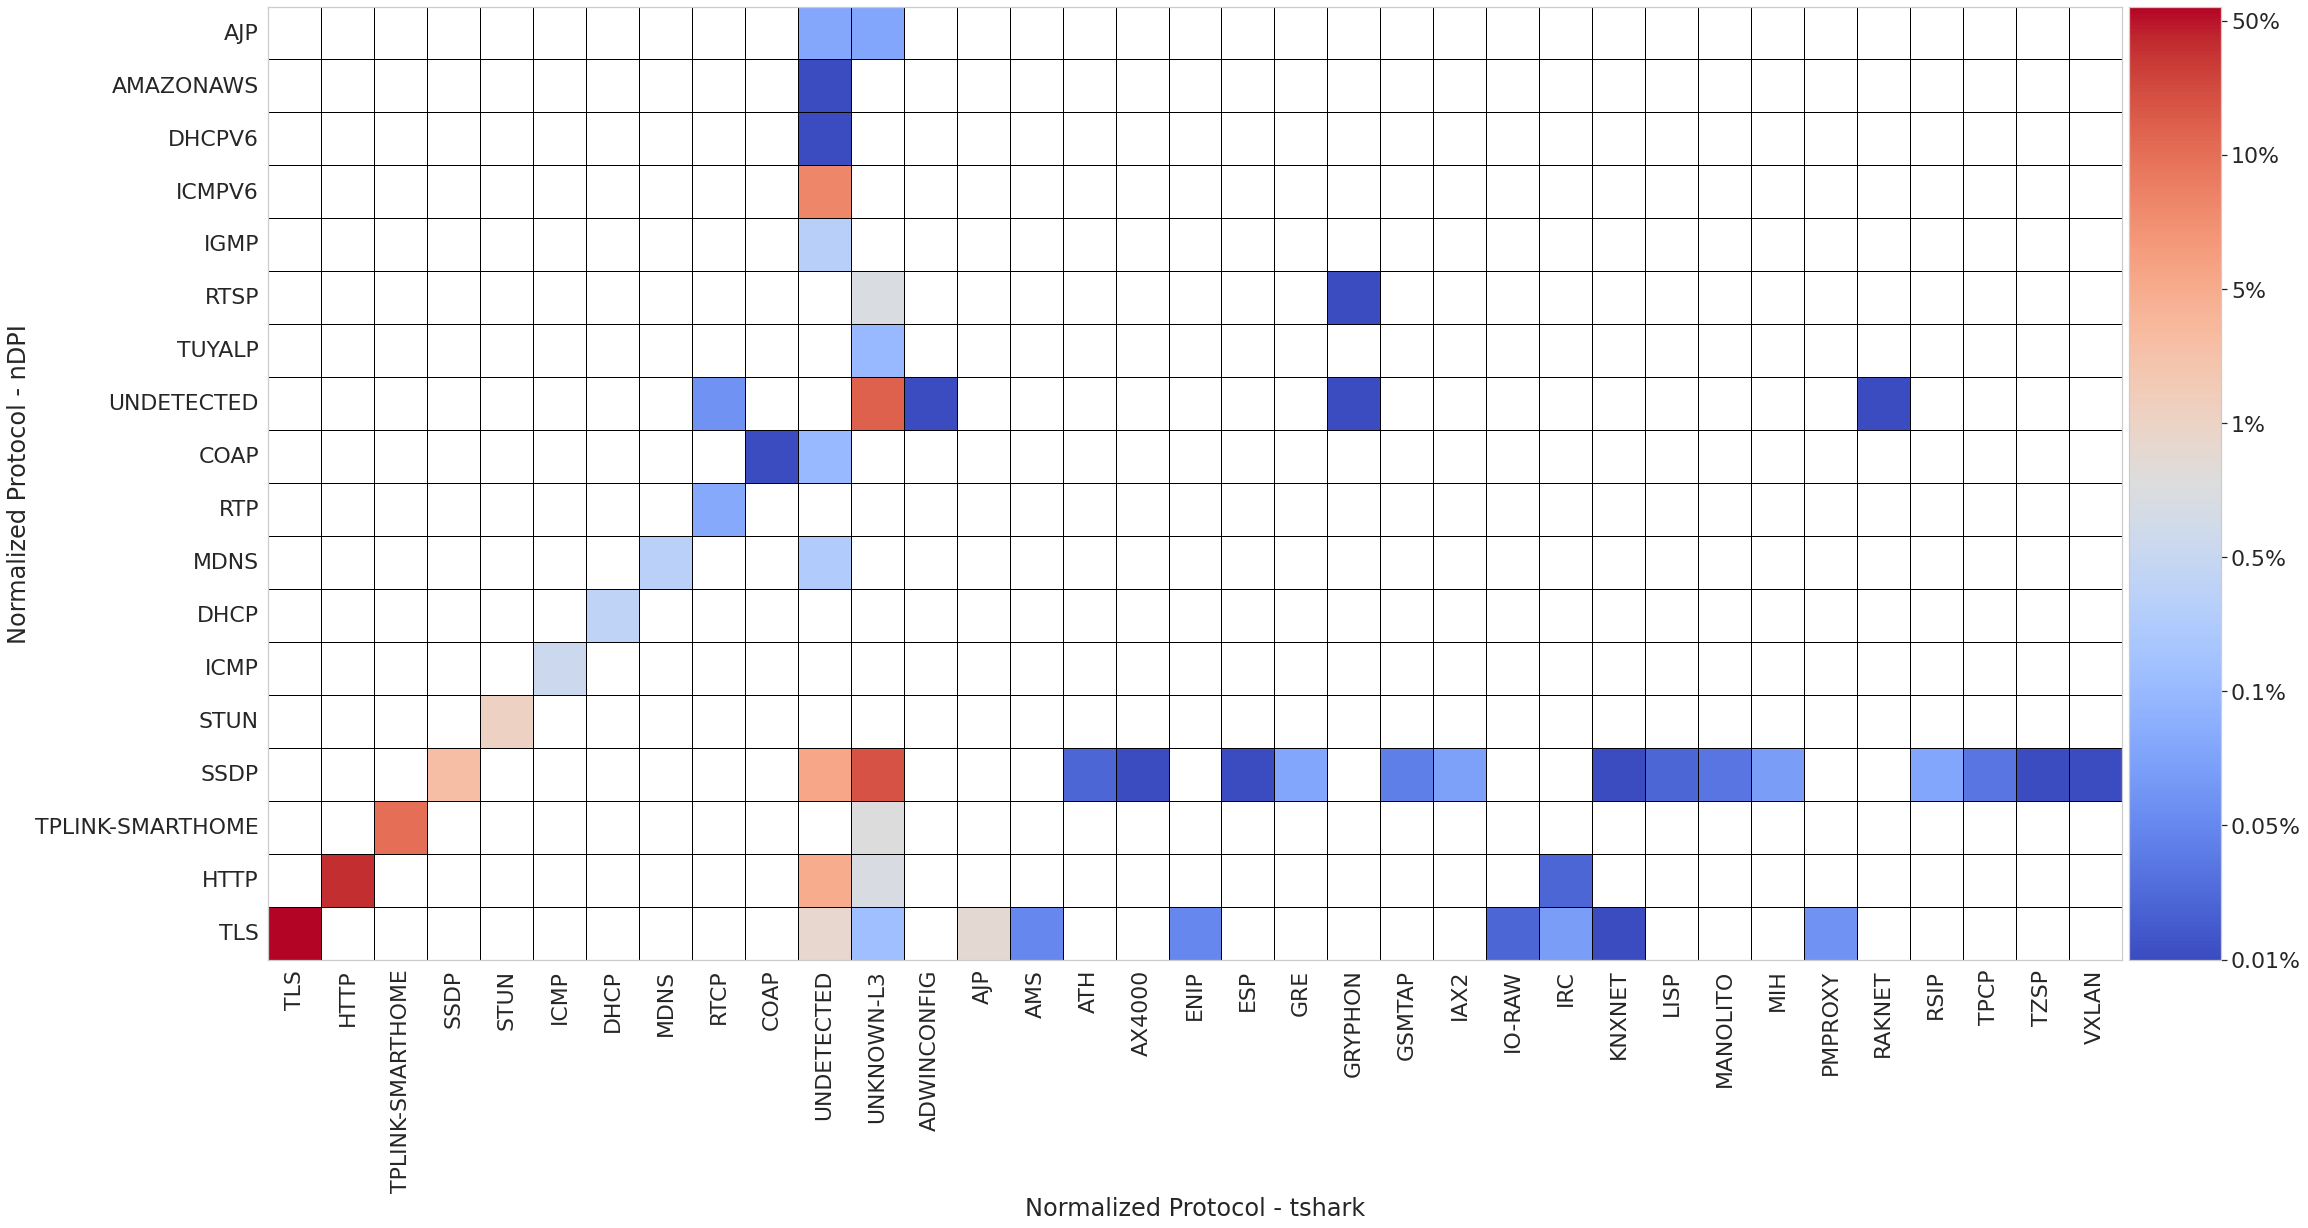

In [1935]:
### NEW HEATMAP ###

from matplotlib.ticker import FuncFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker

df_tshark_common['normalized_protocol'] = df_tshark_common['normalized_protocol'].replace(['udp', 'tcp', 'quic'], 'unknown-L3')
df_tshark_common['normalized_protocol'] = df_tshark_common['normalized_protocol'].replace('ssl', 'tls')
df_ndpi_common['normalized_protocol'] = df_ndpi_common['normalized_protocol'].replace('ssl', 'tls')

merged_df = pd.merge(df_tshark_common, df_ndpi_common, on=['src_ip', 'dst_ip', 'src_port', 'dst_port', 'trans_protocol'], how='outer', suffixes=('_tshark', '_ndpi'))
merged_df = merged_df.replace(np.nan, 'undetected', regex=True)

merged_df['normalized_protocol_tshark'] = merged_df['normalized_protocol_tshark'].str.upper()
merged_df['normalized_protocol_ndpi'] = merged_df['normalized_protocol_ndpi'].str.upper()


# Create a crosstab to count the frequency of each combination of normalized_protocol_tshark and normalized_protocol_ndpi
protocol_crosstab_normalized = pd.crosstab(merged_df['normalized_protocol_ndpi'], merged_df['normalized_protocol_tshark'])

# total_pairs = protocol_crosstab_normalized.sum().sum()
# protocol_crosstab_normalized =  protocol_crosstab_normalized / total_pairs


new_order = list(protocol_crosstab_normalized.columns)
new_order.remove('TLS')
new_order.insert(0, 'TLS')
new_order.remove('HTTP')
new_order.insert(1, 'HTTP')
new_order.remove('TPLINK-SMARTHOME')
new_order.insert(2, 'TPLINK-SMARTHOME')
new_order.remove('SSDP')
new_order.insert(3, 'SSDP')
new_order.remove('STUN')
new_order.insert(4, 'STUN')
new_order.remove('ICMP')
new_order.insert(5, 'ICMP')
new_order.remove('DHCP')
new_order.insert(6, 'DHCP')
new_order.remove('MDNS')
new_order.insert(7, 'MDNS')
new_order.remove('RTCP')
new_order.insert(8, 'RTCP')
new_order.remove('COAP')
new_order.insert(9, 'COAP')
new_order.remove('UNDETECTED')
new_order.insert(10, 'UNDETECTED')
new_order.remove('UNKNOWN-L3')
new_order.insert(11, 'UNKNOWN-L3')
protocol_crosstab_normalized = protocol_crosstab_normalized[new_order]


new_order = list(protocol_crosstab_normalized.index)
new_order.remove('TLS')
new_order.insert(17, 'TLS')
new_order.remove('HTTP')
new_order.insert(16, 'HTTP')
new_order.remove('TPLINK-SMARTHOME')
new_order.insert(15, 'TPLINK-SMARTHOME')
new_order.remove('SSDP')
new_order.insert(14, 'SSDP')
new_order.remove('STUN')
new_order.insert(13, 'STUN')
new_order.remove('ICMP')
new_order.insert(12, 'ICMP')
new_order.remove('DHCP')
new_order.insert(11, 'DHCP')
new_order.remove('MDNS')
new_order.insert(10, 'MDNS')
new_order.remove('RTP')
new_order.insert(9, 'RTP')
new_order.remove('COAP')
new_order.insert(8, 'COAP')

protocol_crosstab_normalized = protocol_crosstab_normalized.reindex(new_order)

protocol_crosstab_normalized_log = np.log10(protocol_crosstab_normalized)
mask = protocol_crosstab_normalized == 0

total_pairs = protocol_crosstab_normalized.sum().sum()
# formatted_annotation = np.vectorize(lambda x: f'{x/total_pairs*100:.1f}%' if x/total_pairs*100 < 1 else f'{round(x/total_pairs*100):.0f}%')(protocol_crosstab_normalized)
formatted_annotation = np.vectorize(lambda x: f'{x/total_pairs*100:.1f}%')(protocol_crosstab_normalized)
formatted_annotation = np.vectorize(format_number)(protocol_crosstab_normalized)


# Create the heatmap with actual numbers instead of percentages
plt.figure(figsize=(35, 28))
sns.set(font_scale=2)
sns.set_style("whitegrid")
ax = plt.gca()

# First heatmap using log scale for color representation
sns.heatmap(protocol_crosstab_normalized_log, mask=mask, cmap='coolwarm',
            linecolor='black', cbar=False, square=True, linewidths=0.8, alpha=1)

# Overlay the second heatmap with annotations and no color (alpha=0)
# sns.heatmap(protocol_crosstab_normalized_log, mask=mask, cmap='coolwarm',
#             linecolor='black', alpha=0, annot=formatted_annotation,
#             cbar=False, square=True, fmt='', linewidths=0.8)

for _, spine in ax.spines.items():
    spine.set_visible(True)

plt.xlabel('Normalized Protocol - tshark')
# plt.xticks(rotation=80)
# plt.yticks(rotation=20)

plt.ylabel('Normalized Protocol - nDPI')
# plt.title('Heatmap of Tshark vs nDPI Normalized Protocols')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(ax.get_children()[0], cax=cax)

# 0.5%, 1%, 5%, 10%

# def format_number_percentage(x):
#     value = x*10
#     if value == 50.0:
#         return '50%'
#     if value == 40.0:
#         return '10%'
#     if value == 30.0:
#         return '5%'
#     if value == 20.0:
#         return '1%'
#     if value == 10.0:
#         return '0.05%'
#     if value == 0.0:
#         return '0.01%'

# cbar_formatter1 = FuncFormatter(lambda x, pos: format_number_percentage(x))
# cbar.ax.yaxis.set_major_formatter(cbar_formatter1)
# cbar.ax.tick_params(labelsize=15)
# cbar.ax.yaxis.set_major_formatter(ticker.LogFormatter(labelOnlyBase=False))
tick_positions = np.linspace(0, 5, 8)
tick_labels = ['0.01%', '0.05%', '0.1%', '0.5%', '1%', '5%', '10%', '50%']

cbar.ax.yaxis.set_ticks(tick_positions)
cbar.ax.yaxis.set_major_formatter(ticker.FixedFormatter(tick_labels))

# cbar.ax.tick_params(labelsize=15)

plt.savefig("heatmap_protocol_classifiers_log.pdf", transparent=True, bbox_inches='tight')

plt.show()

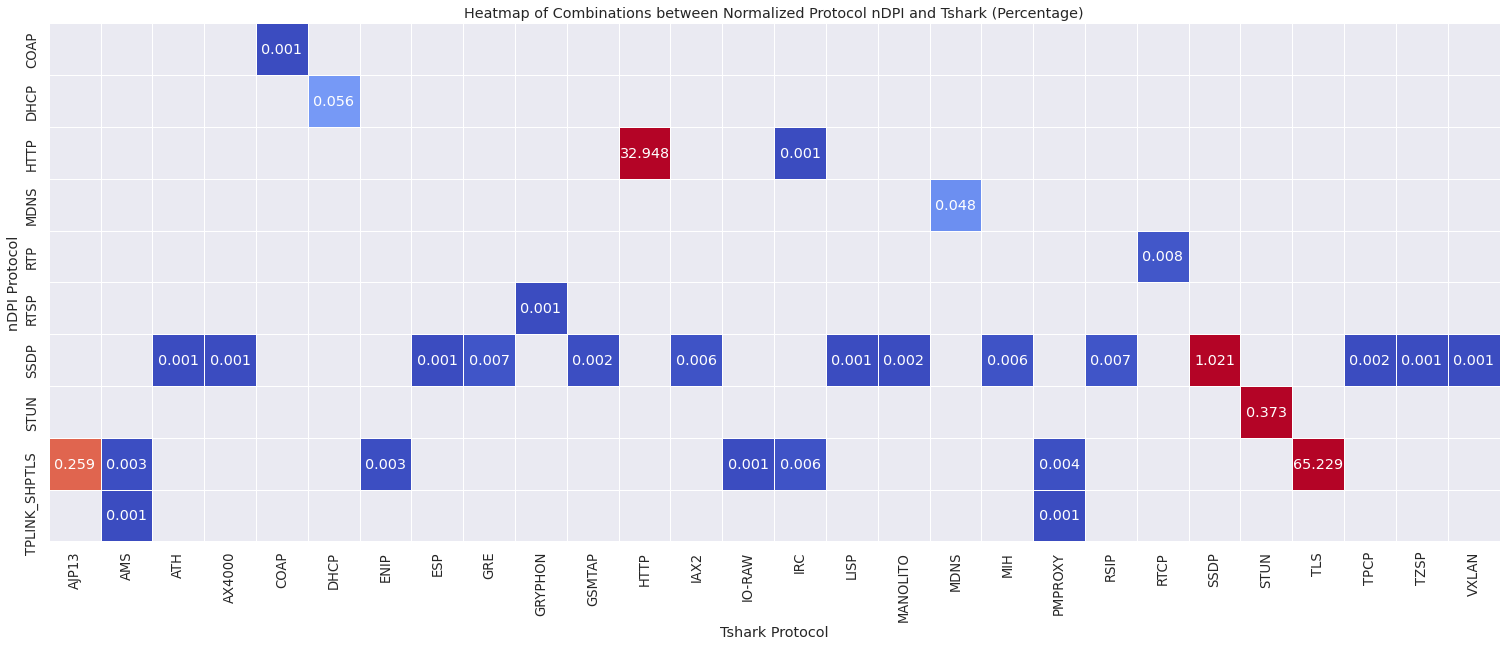

In [166]:
df_ndpi_tshark['normalized_protocol_ndpi'] = df_ndpi_tshark['normalized_protocol_ndpi'].replace('ssl', 'tls').str.upper()
df_ndpi_tshark['normalized_protocol_tshark'] = df_ndpi_tshark['normalized_protocol_tshark'].replace('ssl', 'tls').str.upper()

# Create a pivot table with counts for each combination of protocols
pivot_table = df_ndpi_tshark.pivot_table(index='normalized_protocol_ndpi', columns='normalized_protocol_tshark', aggfunc='size', fill_value=0)

# Calculate the percentage for each cell
total_count = pivot_table.sum().sum()
percentage_pivot_table = pivot_table / total_count * 100

# Function to replace zeros with an empty string
def remove_zeros(val):
    return '' if val == 0 else '{:.3f}'.format(val)

# Apply the remove_zeros function to the pivot table
formatted_pivot_table = percentage_pivot_table.applymap(remove_zeros)

mask = percentage_pivot_table == 0

# Draw the heatmap
plt.figure(figsize=(26, 10))
sns.set(font_scale=1.2)
sns.heatmap(percentage_pivot_table, mask=mask, annot=formatted_pivot_table, cmap='coolwarm', cbar=False, square=True, fmt='', linewidths=0.5, vmax=.3)
plt.xlabel('Tshark Protocol')
plt.ylabel('nDPI Protocol')
plt.title('Heatmap of Combinations between Normalized Protocol nDPI and Tshark (Percentage)')
plt.show()

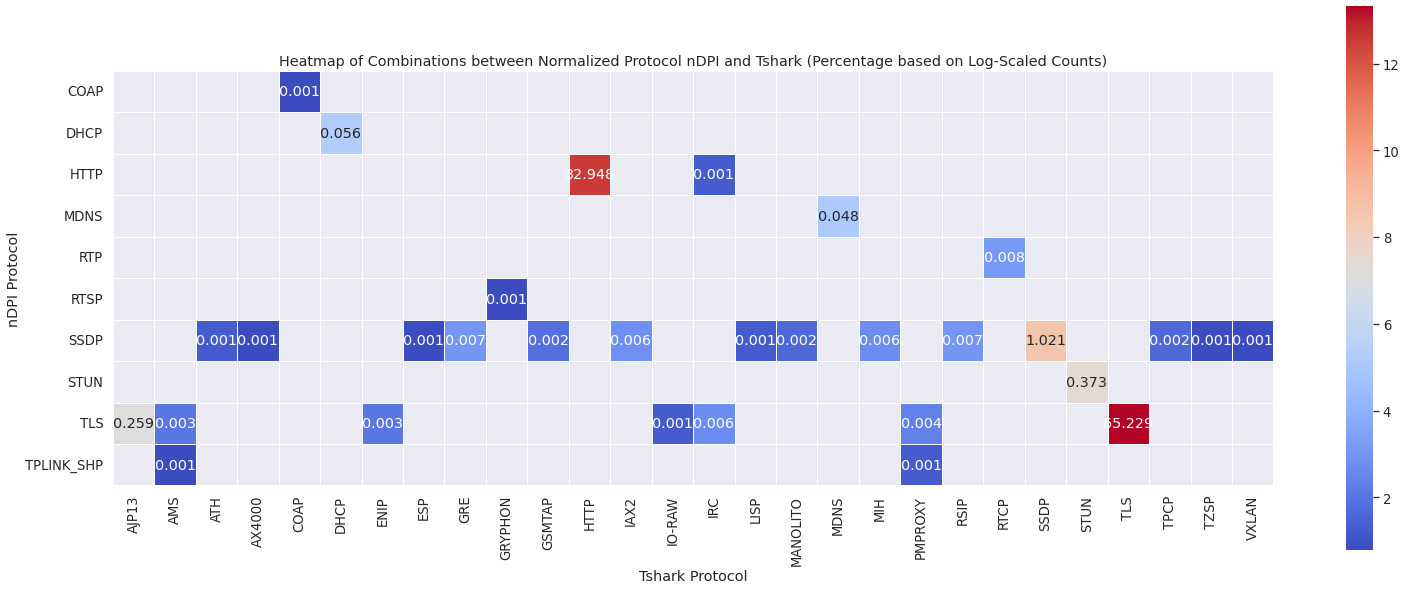

In [174]:
import numpy as np

# Apply log scale (base 10) to the raw counts in the pivot table
log_pivot_table = np.log10(pivot_table + 1)  # Add 1 to avoid log(0)

# Calculate the percentage for each cell using the log-scaled values
total_log_count = log_pivot_table.sum().sum()
log_percentage_pivot_table = log_pivot_table / total_log_count * 100

def remove_zeros(val):
    return '' if val <= 0 else '{:.2f}'.format(val)

# Draw the heatmap
plt.figure(figsize=(26, 10))
sns.set(font_scale=1.2)
sns.heatmap(log_percentage_pivot_table, annot=formatted_pivot_table, mask=mask, cmap='coolwarm', square=True, fmt='', linewidths=0.5, vmax=log_percentage_pivot_table.max().max())
plt.xlabel('Tshark Protocol')
plt.ylabel('nDPI Protocol')
plt.title('Heatmap of Combinations between Normalized Protocol nDPI and Tshark (Percentage based on Log-Scaled Counts)')
plt.show()

In [140]:
total_count = pivot_table.sum().sum()

In [103]:
format_number(total_count)

'238.3K'

-----------------

## Calculating the stats for per tools (only execute if you want to find per tool stats, otherwise DON'T)

In [137]:
df_tshark['normalized_protocol'] = df_tshark['normalized_protocol'].replace('tcp', 'unknown')
df_tshark['normalized_protocol'] = df_tshark['normalized_protocol'].replace('udp', 'unknown')
df_tshark_common = df_tshark[['src ip', 'dst ip', 'src port', 'dst port', 'tool', 'normalized_protocol']].drop_duplicates(subset=common_columns)
# df_tshark['normalized_protocol'] = df_tshark['normalized_protocol'].replace('quic', 'unknown')

In [289]:
def format_number(num):
    if num >= 1_000_000:
        return f"{num / 1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num / 1_000:.1f}K"
    else:
        return str(num)

    
# print("# of unique flows identified as per zeek {}".format(format_number(len(df_zeek_common))))
print("# of unique flows identified as per tshark {}".format(format_number(len(df_tshark_common))))
print("# of unique flows identified as per ndpi {}".format(format_number(len(df_ndpi_common))))


# of unique flows identified as per tshark 280.3K
# of unique flows identified as per ndpi 272.5K


In [290]:
print("# flows identified as zeek {}".format(format_number(len(df_zeek))))
print("# flows identified as tshark {}".format(format_number(len(df_tshark))))
print("# flows identified as ndpi {}".format(format_number(len(df_ndpi))))


# flows identified as zeek 2.3M
# flows identified as tshark 560.0K
# flows identified as ndpi 550.9K


In [293]:
# a = len(df_zeek_common[df_zeek_common['normalized_protocol'] != 'unknown']) / len(df_zeek_common) * 100
b = len(df_ndpi_common[df_ndpi_common['normalized_protocol'] != 'unknown']) / len(df_ndpi_common) * 100
c = len(df_tshark_common[df_tshark_common['normalized_protocol'] != 'unknown']) / len(df_tshark_common) * 100

# au = len(df_zeek_common[df_zeek_common['normalized_protocol'] == 'unknown']) / len(df_zeek_common) * 100
bu = len(df_ndpi_common[df_ndpi_common['normalized_protocol'] == 'unknown']) / len(df_ndpi_common) * 100
cu = len(df_tshark_common[df_tshark_common['normalized_protocol'] == 'unknown']) / len(df_tshark_common) * 100


# print("% of unique flows labelled as per zeek {:.2f}".format(a))
# print("% of unique flows unlabelled as per zeek {:.2f}".format(au))
print(" ")
print("% of unique flows labelled as per ndpi {:.2f}".format(b))
print("% of unique flows unlabelled as per ndpi {:.2f}".format(bu))
print(" ")
print("% of unique flows labelled as per tshark {:.2f}".format(c))
print("% of unique flows unlabelled as per tshark {:.2f}".format(cu))

 
% of unique flows labelled as per ndpi 100.00
% of unique flows unlabelled as per ndpi 0.00
 
% of unique flows labelled as per tshark 100.00
% of unique flows unlabelled as per tshark 0.00


In [294]:
# Get the unique protocols per tool
unique_protocols_tshark = df_tshark_common['normalized_protocol'].nunique()
# unique_protocols_zeek = df_zeek_common['normalized_protocol'].nunique()
unique_protocols_ndpi = df_ndpi_common['normalized_protocol'].nunique()

# Get the top 3 most common protocols per tool
top3_tshark = df_tshark_common['normalized_protocol'].value_counts(normalize=True).head(5) * 100
# top3_zeek = df_zeek_common['normalized_protocol'].value_counts(normalize=True).head(5) * 100
top3_ndpi = df_ndpi_common['normalized_protocol'].value_counts(normalize=True).head(5) * 100

In [295]:
top3_tshark = df_tshark_common['normalized_protocol'].value_counts().head(4) * 100
# top3_zeek = df_zeek_common['normalized_protocol'].value_counts().head(5) * 100
top3_ndpi = df_ndpi_common['normalized_protocol'].value_counts().head(6) * 100

In [149]:
df_zeek_common['normalized_protocol'].unique()

array(['dns', 'ssl', 'http', 'unknown', 'dhcp'], dtype=object)

In [297]:
print("Unique Protocols for Tshark:", unique_protocols_tshark)
# print("Unique Protocols for Zeek:", unique_protocols_zeek)
print("Unique Protocols for nDPI:", unique_protocols_ndpi)
print("\nTop 3 Most Common Protocols for Tshark:\n", top3_tshark)
# print("\nTop 3 Most Common Protocols for Zeek:\n", top3_zeek)
print("\nTop 3 Most Common Protocols for nDPI:\n", top3_ndpi)

Unique Protocols for Tshark: 34
Unique Protocols for nDPI: 20

Top 3 Most Common Protocols for Tshark:
 TLS                 11889200
HTTP                 7240500
UNKNOWN-L3           6611600
TPLINK-SMARTHOME     1920700
Name: normalized_protocol, dtype: int64

Top 3 Most Common Protocols for nDPI:
 TLS                 11998200
HTTP                 7626500
SSDP                 4400000
TPLINK-SMARTHOME     1955200
ICMPV6               1106000
STUN                   75900
Name: normalized_protocol, dtype: int64


In [56]:
df_tshark_common[df_tshark_common['normalized_protocol'] == 'unknown']

,src ip,dst ip,src port,dst port,tool,normalized_protocol
342475,KNXnet/IP,192.168.10.198,192.168.10.148,40000,tshark,unknown


In [55]:
df_tshark_common

,src ip,dst ip,src port,dst port,tool,normalized_protocol
0,192.168.10.123,192.168.10.148,57072,55443,tshark,ssl
1,192.168.10.123,192.168.10.148,57070,55443,tshark,ssl
2,192.168.10.123,192.168.10.148,57068,55443,tshark,ssl
3,192.168.10.148,192.168.10.164,49106,80,tshark,http
4,192.168.10.182,192.168.10.148,36188,55443,tshark,ssl
...,...,...,...,...,...,...
594909,192.168.10.228,192.168.10.180,10005,39229,tshark,ssl
594913,192.168.10.228,192.168.10.193,10005,55818,tshark,ssl
594923,192.168.10.163,192.168.10.228,10005,37350,tshark,ssl
594936,192.168.10.228,192.168.10.102,10005,36076,tshark,ssl


## Classification agreement comparison

In [298]:
df_ndpi_tshark = df_ndpi_common.merge(df_tshark_common, on=['src_ip', 'dst_ip', 'src_port', 'dst_port'], suffixes=('_ndpi', '_tshark'))
# df_ndpi_zeek = df_ndpi_common.merge(df_zeek_common, on=['src ip', 'dst ip', 'src port', 'dst port'], suffixes=('_ndpi', '_zeek'))
# df_zeek_tshark = df_zeek_common.merge(df_tshark_common, on=['src ip', 'dst ip', 'src port', 'dst port'], suffixes=('_zeek', '_tshark'))

In [299]:
df_ndpi_tshark

,device_name_ndpi,src_ip,dst_ip,src_port,dst_port,tool_ndpi,trans_protocol_ndpi,normalized_protocol_ndpi,file_path_ndpi,device_name_tshark,tool_tshark,trans_protocol_tshark,normalized_protocol_tshark,file_path_tshark
0,nest-camera,192.168.10.153,192.168.10.193,35211,10006,ndpi,17,STUN,/home/aniketh/devel/src/IoT-local/parsed_dec_n...,nest-hub,tshark,17,STUN,/home/aniketh/devel/src/IoT-local/dataset/test...
1,nest-camera,192.168.10.193,192.168.10.153,51566,8012,ndpi,6,TLS,/home/aniketh/devel/src/IoT-local/parsed_dec_n...,nest-hub,tshark,6,TLS,/home/aniketh/devel/src/IoT-local/dataset/test...
2,nest-camera,192.168.10.228,192.168.10.153,44364,8012,ndpi,6,TLS,/home/aniketh/devel/src/IoT-local/parsed_dec_n...,google-nest-mini1,tshark,6,TLS,/home/aniketh/devel/src/IoT-local/dataset/test...
3,nest-camera,192.168.10.180,192.168.10.153,51069,8012,ndpi,6,TLS,/home/aniketh/devel/src/IoT-local/parsed_dec_n...,google-home-mini,tshark,6,TLS,/home/aniketh/devel/src/IoT-local/dataset/test...
4,nest-camera,192.168.10.180,192.168.10.153,51071,8012,ndpi,6,TLS,/home/aniketh/devel/src/IoT-local/parsed_dec_n...,google-home-mini,tshark,6,TLS,/home/aniketh/devel/src/IoT-local/dataset/test...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252785,homepod,192.168.10.207,192.168.10.107,50712,7000,ndpi,6,RTSP,/home/aniketh/devel/src/IoT-local/parsed_dec_n...,homepod,tshark,6,UNKNOWN-L3,/home/aniketh/devel/src/IoT-local/dataset/test...
252786,homepod,192.168.10.207,192.168.10.107,63630,50102,ndpi,6,TLS,/home/aniketh/devel/src/IoT-local/parsed_dec_n...,homepod,tshark,6,TLS,/home/aniketh/devel/src/IoT-local/dataset/test...
252787,homepod,192.168.10.207,192.168.10.107,63633,50102,ndpi,6,TLS,/home/aniketh/devel/src/IoT-local/parsed_dec_n...,homepod,tshark,6,TLS,/home/aniketh/devel/src/IoT-local/dataset/test...
252788,homepod,192.168.10.207,192.168.10.107,63740,50102,ndpi,6,TLS,/home/aniketh/devel/src/IoT-local/parsed_dec_n...,homepod,tshark,6,TLS,/home/aniketh/devel/src/IoT-local/dataset/test...


In [45]:
df_ndpi_zeek

,src ip,dst ip,src port,dst port,tool_ndpi,normalized_protocol_ndpi,tool_zeek,normalized_protocol_zeek
0,192.168.10.153,192.168.10.193,35211,10006,ndpi,stun,zeek,unknown
1,192.168.10.193,192.168.10.153,51566,8012,ndpi,ssl,zeek,ssl
2,192.168.10.193,192.168.10.153,51566,8012,ndpi,ssl,zeek,unknown
3,192.168.10.228,192.168.10.153,44364,8012,ndpi,ssl,zeek,ssl
4,192.168.10.228,192.168.10.153,44364,8012,ndpi,ssl,zeek,unknown
...,...,...,...,...,...,...,...,...
255138,192.168.10.207,192.168.10.107,63630,50102,ndpi,ssl,zeek,ssl
255139,192.168.10.207,192.168.10.107,63630,50102,ndpi,ssl,zeek,unknown
255140,192.168.10.207,192.168.10.107,63633,50102,ndpi,ssl,zeek,ssl
255141,192.168.10.207,192.168.10.107,63740,50102,ndpi,ssl,zeek,ssl


In [300]:
ndpi_tshark_agreement = (df_ndpi_tshark['normalized_protocol_ndpi'] == df_ndpi_tshark['normalized_protocol_tshark']).mean() * 100
# ndpi_zeek_agreement = (df_ndpi_zeek['normalized_protocol_ndpi'] == df_ndpi_zeek['normalized_protocol_zeek']).mean() * 100
# zeek_tshark_agreement = (df_zeek_tshark['normalized_protocol_zeek'] == df_zeek_tshark['normalized_protocol_tshark']).mean() * 100

print("Percentage of agreement between ndpi and tshark: {:.2f}%".format(ndpi_tshark_agreement))
# print("Percentage of agreement between ndpi and zeek: {:.2f}%".format(ndpi_zeek_agreement))
# print("Percentage of agreement between zeek and tshark: {:.2f}%".format(zeek_tshark_agreement))

Percentage of agreement between ndpi and tshark: 84.48%


In [301]:
ndpi_tshark_agreement = ((df_ndpi_tshark['normalized_protocol_ndpi'] == df_ndpi_tshark['normalized_protocol_tshark']).sum() / len(df_ndpi_tshark)) * 100
# ndpi_zeek_agreement = ((df_ndpi_zeek['normalized_protocol_ndpi'] == df_ndpi_zeek['normalized_protocol_zeek']).sum() / len(df_ndpi_zeek)) * 100
# zeek_tshark_agreement = ((df_zeek_tshark['normalized_protocol_zeek'] == df_zeek_tshark['normalized_protocol_tshark']).sum() / len(df_zeek_tshark)) * 100

print("Percentage of agreement between ndpi and tshark: {:.2f}%".format(ndpi_tshark_agreement))
# print("Percentage of agreement between ndpi and zeek: {:.2f}%".format(ndpi_zeek_agreement))
# print("Percentage of agreement between zeek and tshark: {:.2f}%".format(zeek_tshark_agreement))

Percentage of agreement between ndpi and tshark: 84.48%


In [34]:
df_ndpi_tshark['ndpi_tshark_agreement'] = (df_ndpi_tshark['normalized_protocol_ndpi'] == df_ndpi_tshark['normalized_protocol_tshark'])
df_ndpi_zeek['ndpi_zeek_agreement'] = (df_ndpi_zeek['normalized_protocol_ndpi'] == df_ndpi_zeek['normalized_protocol_zeek'])
df_zeek_tshark['zeek_tshark_agreement'] = (df_zeek_tshark['normalized_protocol_zeek'] == df_zeek_tshark['normalized_protocol_tshark'])

In [41]:
df_ndpi_tshark[df_ndpi_tshark['ndpi_tshark_agreement'] == False].to_csv('ndpi_tshark_disagreement.csv')

In [44]:
df_ndpi_zeek[df_ndpi_zeek['ndpi_zeek_agreement'] == False].to_csv('ndpi_zeek_disagreement.csv')

In [46]:
df_zeek_tshark[df_zeek_tshark['zeek_tshark_agreement'] == False].to_csv('tshark_zeek_disagreement.csv')

In [68]:
df_zeek_tshark[df_zeek_tshark['zeek_tshark_agreement'] == False].drop_duplicates(subset=['normalized_protocol_zeek', 'normalized_protocol_tshark'])

,src ip,dst ip,src port,dst port,tool_zeek,normalized_protocol_zeek,tool_tshark,normalized_protocol_tshark,zeek_tshark_agreement
0,192.168.10.201,224.0.0.251,5353,5353,zeek,dns,tshark,mdns,False
5,192.168.10.201,192.168.10.254,39589,7,zeek,unknown,tshark,tcp,False
22,192.168.10.201,192.168.10.218,33236,49153,zeek,http,tshark,tcp,False
23,192.168.10.201,192.168.10.218,33236,49153,zeek,unknown,tshark,http,False
25,192.168.10.123,192.168.10.201,60196,55443,zeek,unknown,tshark,ssl,False
66,192.168.10.249,192.168.10.201,42886,50000,zeek,unknown,tshark,udp,False
91,192.168.10.201,239.255.255.250,50000,1900,zeek,unknown,tshark,ssdp,False
3473,192.168.10.201,192.168.10.238,55444,55444,zeek,unknown,tshark,rtcp,False
5261,192.168.10.240,192.168.10.201,57000,55443,zeek,ssl,tshark,irc,False
6138,192.168.10.201,192.168.10.250,40000,55443,zeek,ssl,tshark,tcp,False


In [37]:
df_ndpi_zeek[df_ndpi_zeek['ndpi_zeek_agreement'] == False].drop_duplicates(subset=['normalized_protocol_ndpi', 'normalized_protocol_zeek'])

,src ip,dst ip,src port,dst port,tool_ndpi,normalized_protocol_ndpi,tool_zeek,normalized_protocol_zeek,ndpi_zeek_agreement
0,192.168.10.153,192.168.10.193,35211,10006,ndpi,stun,zeek,unknown,False
2,192.168.10.193,192.168.10.153,51566,8012,ndpi,ssl,zeek,unknown,False
135,192.168.10.215,224.0.0.251,5353,5353,ndpi,mdns,zeek,dns,False
141,192.168.10.193,192.168.10.205,45329,50000,ndpi,ssdp,zeek,unknown,False
167,192.168.10.205,192.168.10.114,38835,9999,ndpi,tplink_shp,zeek,unknown,False
4575,192.168.10.236,192.168.10.238,55444,55444,ndpi,rtp,zeek,unknown,False
4616,192.168.10.238,192.168.10.218,60244,49153,ndpi,http,zeek,unknown,False
6110,192.168.10.214,255.255.255.255,49154,6667,ndpi,tuyalp,zeek,unknown,False
19497,fe80::3198:2512:1a6a:998,ff02::1:2,546,547,ndpi,dhcpv6,zeek,unknown,False
19539,192.168.10.154,192.168.10.228,42356,8009,ndpi,ajp,zeek,unknown,False


In [54]:
df_ndpi_zeek[df_ndpi_zeek['ndpi_zeek_agreement'] == False].drop_duplicates(subset=['normalized_protocol_ndpi', 'normalized_protocol_zeek'])

,src ip,dst ip,src port,dst port,tool_ndpi,normalized_protocol_ndpi,tool_zeek,normalized_protocol_zeek,ndpi_zeek_agreement
0,192.168.10.153,192.168.10.193,35211,10006,ndpi,stun,zeek,unknown,False
5,192.168.10.193,192.168.10.153,51566,8012,ndpi,ssl,zeek,unknown,False
2477332,192.168.10.215,224.0.0.251,5353,5353,ndpi,mdns,zeek,dns,False
2477646,192.168.10.193,192.168.10.205,45329,50000,ndpi,ssdp,zeek,unknown,False
2477762,192.168.10.205,192.168.10.114,38835,9999,ndpi,tplink_shp,zeek,unknown,False
2777426,192.168.10.236,192.168.10.238,55444,55444,ndpi,rtp,zeek,unknown,False
2777650,192.168.10.238,192.168.10.218,60244,49153,ndpi,http,zeek,unknown,False
3614961,192.168.10.214,255.255.255.255,49154,6667,ndpi,tuyalp,zeek,unknown,False
3874768,fe80::3198:2512:1a6a:998,ff02::1:2,546,547,ndpi,dhcpv6,zeek,unknown,False
3928961,192.168.10.154,192.168.10.228,42356,8009,ndpi,ajp,zeek,unknown,False


In [55]:
df_ndpi_tshark[df_ndpi_tshark['ndpi_tshark_agreement'] == False].drop_duplicates(subset=['normalized_protocol_ndpi', 'normalized_protocol_tshark'])

,src ip,dst ip,src port,dst port,tool_ndpi,normalized_protocol_ndpi,tool_tshark,normalized_protocol_tshark,ndpi_tshark_agreement
82342,192.168.10.193,192.168.10.205,45329,50000,ndpi,ssdp,tshark,udp,False
82452,192.168.10.205,192.168.10.114,38835,9999,ndpi,tplink_shp,tshark,tcp,False
83490,192.168.10.223,192.168.10.205,9999,50024,ndpi,tplink_shp,tshark,udp,False
118492,192.168.10.236,192.168.10.238,55444,55444,ndpi,rtp,tshark,rtcp,False
118708,192.168.10.238,192.168.10.218,60244,49153,ndpi,http,tshark,tcp,False
122027,192.168.10.193,192.168.10.102,46482,8009,ndpi,ssl,tshark,ajp13,False
123387,192.168.10.154,192.168.10.193,10010,38392,ndpi,ssl,tshark,tcp,False
131878,192.168.10.214,255.255.255.255,49154,6667,ndpi,tuyalp,tshark,udp,False
174386,192.168.10.198,192.168.10.201,41170,50000,ndpi,ssdp,tshark,manolito,False
182427,192.168.10.118,192.168.10.238,44818,55443,ndpi,ssl,tshark,enip,False


In [320]:
# Merge dataframes to find the agreement between all three tools
df_all_agreement = df_ndpi_common.merge(df_tshark_common, on=['src_ip', 'dst_ip', 'src_port', 'dst_port'], suffixes=('_ndpi', '_tshark'))
df_all_agreement = df_all_agreement.merge(df_zeek_common, on=['src_ip', 'dst_ip', 'src_port', 'dst_port'])

# Calculate the percentage of agreement between all three tools
df_all_agreement['all_agreement'] = ((df_all_agreement['normalized_protocol_ndpi'] == df_all_agreement['normalized_protocol_tshark']) & 
                                    (df_all_agreement['normalized_protocol_ndpi'] == df_all_agreement['normalized_protocol']) & 
                                    (df_all_agreement['normalized_protocol_tshark'] == df_all_agreement['normalized_protocol']))

print("Percentage of agreement between ndpi, tshark, and zeek: {:.2f}%".format(df_all_agreement['all_agreement'].mean() * 100))

Percentage of agreement between ndpi, tshark, and zeek: 73.77%


In [319]:
agreement_count = ((df_all_agreement['normalized_protocol_ndpi'] == df_all_agreement['normalized_protocol_tshark']) & 
                   (df_all_agreement['normalized_protocol_ndpi'] == df_all_agreement['normalized_protocol']) & 
                   (df_all_agreement['normalized_protocol_tshark'] == df_all_agreement['normalized_protocol'])).sum()

# Calculate the total number of flows
total_flows = len(df_all_agreement)

# Calculate the percentage of agreement between all three tools
all_agreement_percentage = (agreement_count / total_flows) * 100

print("Percentage of agreement between ndpi, tshark, and zeek: {:.2f}%".format(all_agreement_percentage))

Percentage of agreement between ndpi, tshark, and zeek: 73.77%


In [321]:
# Calculate the total number of flows
total_flows = len(df_all_agreement)

# Calculate the number of flows where ndpi and tshark agree
ndpi_tshark_agreement_count = (df_all_agreement['normalized_protocol_ndpi'] == df_all_agreement['normalized_protocol_tshark']).sum()

# Calculate the number of flows where ndpi and zeek agree
ndpi_zeek_agreement_count = (df_all_agreement['normalized_protocol_ndpi'] == df_all_agreement['normalized_protocol']).sum()

# Calculate the number of flows where zeek and tshark agree
zeek_tshark_agreement_count = (df_all_agreement['normalized_protocol_tshark'] == df_all_agreement['normalized_protocol']).sum()

# Calculate the number of flows where all three tools agree
all_agreement_count = ((df_all_agreement['normalized_protocol_ndpi'] == df_all_agreement['normalized_protocol_tshark']) & 
                       (df_all_agreement['normalized_protocol_ndpi'] == df_all_agreement['normalized_protocol']) & 
                       (df_all_agreement['normalized_protocol_tshark'] == df_all_agreement['normalized_protocol'])).sum()

# Calculate the percentage of agreement between all three tools based on the pairwise agreement percentages
all_agreement_percentage = (all_agreement_count / total_flows) * 100

print("Percentage of agreement between ndpi, tshark, and zeek: {:.2f}%".format(all_agreement_percentage))
print("Percentage of agreement between ndpi and tshark: {:.2f}%".format((ndpi_tshark_agreement_count / total_flows) * 100))
print("Percentage of agreement between ndpi and zeek: {:.2f}%".format((ndpi_zeek_agreement_count / total_flows) * 100))
print("Percentage of agreement between zeek and tshark: {:.2f}%".format((zeek_tshark_agreement_count / total_flows) * 100))


Percentage of agreement between ndpi, tshark, and zeek: 73.77%
Percentage of agreement between ndpi and tshark: 84.47%
Percentage of agreement between ndpi and zeek: 73.97%
Percentage of agreement between zeek and tshark: 73.77%


In [52]:
df_all_agreement['normalized_protocol_ndpi'].unique()

array(['stun', 'ssl', 'dhcp', 'mdns', 'ssdp', 'tplink_shp', 'http', 'rtp',
       'tuyalp', 'ajp', 'coap', 'http.rtsp', 'ethernetip', 'bittorrent',
       'ciscovpn'], dtype=object)

In [120]:
df_all_agreement

,src ip,dst ip,src port,dst port,tool_ndpi,normalized_protocol_ndpi,tool_tshark,normalized_protocol_tshark,tool,normalized_protocol,all_agreement
0,192.168.10.153,192.168.10.193,35211,10006,ndpi,stun,tshark,stun,zeek,unknown,False
1,192.168.10.193,192.168.10.153,51566,8012,ndpi,ssl,tshark,ssl,zeek,ssl,True
2,192.168.10.193,192.168.10.153,51566,8012,ndpi,ssl,tshark,ssl,zeek,unknown,False
3,192.168.10.228,192.168.10.153,44364,8012,ndpi,ssl,tshark,ssl,zeek,ssl,True
4,192.168.10.228,192.168.10.153,44364,8012,ndpi,ssl,tshark,ssl,zeek,unknown,False
...,...,...,...,...,...,...,...,...,...,...,...
248229,192.168.10.207,192.168.10.107,63630,50102,ndpi,ssl,tshark,ssl,zeek,ssl,True
248230,192.168.10.207,192.168.10.107,63630,50102,ndpi,ssl,tshark,ssl,zeek,unknown,False
248231,192.168.10.207,192.168.10.107,63633,50102,ndpi,ssl,tshark,ssl,zeek,ssl,True
248232,192.168.10.207,192.168.10.107,63740,50102,ndpi,ssl,tshark,ssl,zeek,ssl,True


In [119]:
format_number(df_all_agreement.shape[0])

'248.2K'

In [128]:
unknown_count = df_all_agreement[(df_all_agreement['normalized_protocol_ndpi'] != 'unknown') | 
                   (df_all_agreement['normalized_protocol_tshark'] != 'unknown') | 
                   (df_all_agreement['normalized_protocol'] != 'unknown')].shape[0]
print(f"Number of rows where at least one of the columns is not 'unknown': {format_number(unknown_count)}")


Number of rows where at least one of the columns is not 'unknown': 248.2K


In [125]:
unknown_count = df_all_agreement[(df_all_agreement['normalized_protocol_ndpi'] == 'unknown') | 
                   (df_all_agreement['normalized_protocol_tshark'] == 'unknown') | 
                   (df_all_agreement['normalized_protocol'] == 'unknown')].shape[0]

print(f"Number of rows where at least one of the columns is 'unknown': {format_number(unknown_count)}")

Number of rows where at least one of the columns is 'unknown': 73.7K


In [126]:
all_protocols = pd.concat([df_all_agreement['normalized_protocol_ndpi'], 
                            df_all_agreement['normalized_protocol_tshark'], 
                            df_all_agreement['normalized_protocol']])

unique_protocol_count = all_protocols.nunique()

print(f"Total number of unique protocols: {unique_protocol_count}")

Total number of unique protocols: 41


In [123]:
format_number(unknown_count)

'248.2K'

In [ ]:
Percentage of agreement between ndpi and tshark: 75.60%
Percentage of agreement between ndpi and zeek: 68.43%
Percentage of agreement between zeek and tshark: 64.53%

In [50]:
df_all_agreement[df_all_agreement['all_agreement'] == False].to_csv('all_disagreement.csv')

In [49]:
df_all_agreement[df_all_agreement['all_agreement'] == False].drop_duplicates(subset=['normalized_protocol_ndpi', 'normalized_protocol_tshark', 'normalized_protocol'])

,src ip,dst ip,src port,dst port,tool_ndpi,normalized_protocol_ndpi,tool_tshark,normalized_protocol_tshark,tool,normalized_protocol,all_agreement
0,192.168.10.153,192.168.10.193,35211,10006,ndpi,stun,tshark,stun,zeek,unknown,False
2,192.168.10.193,192.168.10.153,51566,8012,ndpi,ssl,tshark,ssl,zeek,unknown,False
135,192.168.10.215,224.0.0.251,5353,5353,ndpi,mdns,tshark,mdns,zeek,dns,False
141,192.168.10.193,192.168.10.205,45329,50000,ndpi,ssdp,tshark,udp,zeek,unknown,False
167,192.168.10.205,192.168.10.114,38835,9999,ndpi,tplink_shp,tshark,tcp,zeek,unknown,False
434,192.168.10.223,192.168.10.205,9999,50024,ndpi,tplink_shp,tshark,udp,zeek,unknown,False
497,192.168.10.164,192.168.10.205,1900,50000,ndpi,ssdp,tshark,ssdp,zeek,unknown,False
4575,192.168.10.236,192.168.10.238,55444,55444,ndpi,rtp,tshark,rtcp,zeek,unknown,False
4616,192.168.10.238,192.168.10.218,60244,49153,ndpi,http,tshark,http,zeek,unknown,False
4617,192.168.10.238,192.168.10.218,60244,49153,ndpi,http,tshark,tcp,zeek,http,False


In [41]:
(df_all_agreement['normalized_protocol_ndpi'] == df_all_agreement['normalized_protocol']).mean() * 100

89.30181706156534

In [33]:
all_agreement

89.30056293524116

In [34]:
# Add columns for agreement between each pair of tools and all tools
df_all_agreement['ndpi_tshark_agreement'] = df_all_agreement['normalized_protocol_ndpi'] == df_all_agreement['normalized_protocol_tshark']
df_all_agreement['ndpi_zeek_agreement'] = df_all_agreement['normalized_protocol_ndpi'] == df_all_agreement['normalized_protocol']
df_all_agreement['tshark_zeek_agreement'] = df_all_agreement['normalized_protocol_tshark'] == df_all_agreement['normalized_protocol']
df_all_agreement['all_agreement'] = df_all_agreement['ndpi_tshark_agreement'] & df_all_agreement['ndpi_zeek_agreement']

df_all_agreement[['src ip', 'dst ip', 'src port', 'dst port', 'normalized_protocol_ndpi', 'normalized_protocol_tshark', 'normalized_protocol', 'ndpi_tshark_agreement', 'ndpi_zeek_agreement', 'tshark_zeek_agreement', 'all_agreement']]

,src ip,dst ip,src port,dst port,normalized_protocol_ndpi,normalized_protocol_tshark,normalized_protocol,ndpi_tshark_agreement,ndpi_zeek_agreement,tshark_zeek_agreement,all_agreement
0,192.168.10.153,192.168.10.193,35211,10006,stun,stun,unknown,True,False,False,False
1,192.168.10.153,192.168.10.193,35211,10006,stun,stun,unknown,True,False,False,False
2,192.168.10.153,192.168.10.193,35211,10006,stun,stun,unknown,True,False,False,False
3,192.168.10.153,192.168.10.193,35211,10006,stun,stun,unknown,True,False,False,False
4,192.168.10.153,192.168.10.193,35211,10006,stun,stun,unknown,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
815627560,192.168.10.207,192.168.10.107,63630,50102,ssl,ssl,ssl,True,True,True,True
815627561,192.168.10.207,192.168.10.107,63630,50102,ssl,ssl,unknown,True,False,False,False
815627562,192.168.10.207,192.168.10.107,63633,50102,ssl,ssl,ssl,True,True,True,True
815627563,192.168.10.207,192.168.10.107,63740,50102,ssl,ssl,ssl,True,True,True,True


In [37]:
df_all_agreement['ndpi_zeek_agreement'].mean() * 100

89.30181706156534

In [ ]:
#df_all_agreement.to_csv('benchmarking_tools_agreement_data.csv')

In [ ]:
df_all_agreement['ndpi_agreement_count'] = df_all_agreement['ndpi_tshark_agreement'].astype(int) + df_all_agreement['ndpi_zeek_agreement'].astype(int)
df_all_agreement['tshark_agreement_count'] = df_all_agreement['ndpi_tshark_agreement'].astype(int) + df_all_agreement['tshark_zeek_agreement'].astype(int)
df_all_agreement['zeek_agreement_count'] = df_all_agreement['ndpi_zeek_agreement'].astype(int) + df_all_agreement['tshark_zeek_agreement'].astype(int)

## legacy

In [19]:
agreement_merged_df = merged_df[(merged_df['ts'] >= merged_df['first_seen']) & (merged_df['ts'] <= merged_df['last_seen'])]

In [164]:
agreement_merged_df = merged_df

In [165]:
# merged_df = merged_df.dropna(subset=['device', 'date'], how='all')

In [166]:
agreement_merged_df[agreement_merged_df['service'] == "unknown"]

,#flow_id,protocol,first_seen,last_seen,duration_x,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,...,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,device,date,ndpi_proto_2
0,65,58.0,2022-12-28 23:06:38.834000128,2022-12-28 23:06:38.834000128,0.0,::,0,ff02::1:ff08:97c5,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
1,138,58.0,2022-12-29 01:11:20.248000000,2022-12-29 01:11:20.248000000,0.0,::,0,ff02::1:fffb:edc8,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
2,68,58.0,2022-12-28 23:11:33.842000128,2022-12-28 23:11:33.842000128,0.0,::,0,ff02::1:ffb3:dbd0,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
3,107,17.0,2022-12-29 00:12:27.124999936,2022-12-29 00:12:27.125999872,0.001,192.168.10.153,35211,192.168.10.193,10006,78,...,SF,0.0,Dd,1.0,48.0,1.0,48.0,nest-camera,2022-12-28_15.59.06_192.168.10.153,stun
4,69,58.0,2022-12-28 23:11:33.881999872,2022-12-28 23:11:33.881999872,0.0,::,0,ff02::1:ffc8:ffd7,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636323,26,58.0,2022-12-24 02:07:01.916000000,2022-12-24 07:10:51.358000128,18229.442,fe80::8ec:5d6d:6721:ba9b,0,fe80::424:5193:d9a8:96b3,0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
5636324,12,58.0,2022-12-24 02:00:47.617000192,2022-12-24 07:48:12.410000128,20844.793,fe80::8ec:5d6d:6721:ba9b,0,fe80::499:c2b3:9240:e394,0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
5636325,42,58.0,2022-12-24 04:42:16.680999936,2022-12-24 05:53:35.362999808,4278.682,fe80::8ec:5d6d:6721:ba9b,0,ff02::1:ff40:e394,0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
5636326,51,58.0,2022-12-24 07:32:20.956000000,2022-12-24 07:32:25.793999872,4.838,fe80::3198:2512:1a6a:998,0,fe80::8ec:5d6d:6721:ba9b,0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6


In [167]:
agreement_merged_df['classification_agreement'] = agreement_merged_df['ndpi_proto_2'] == agreement_merged_df['service']

In [168]:
agreement_merged_df[['src_ip', 'dst_ip', 'src_port', 'dst_port', 'device_name', 'ts', 'first_seen', 'service', 'date', 'device', 'ndpi_proto_2']][agreement_merged_df['classification_agreement'] == False]

,src_ip,dst_ip,src_port,dst_port,device_name,ts,first_seen,service,date,device,ndpi_proto_2
0,::,ff02::1:ff08:97c5,0,0,nest-camera,NaT,2022-12-28 23:06:38.834000128,unknown,NaN,NaN,icmpv6
1,::,ff02::1:fffb:edc8,0,0,nest-camera,NaT,2022-12-29 01:11:20.248000000,unknown,NaN,NaN,icmpv6
2,::,ff02::1:ffb3:dbd0,0,0,nest-camera,NaT,2022-12-28 23:11:33.842000128,unknown,NaN,NaN,icmpv6
3,192.168.10.153,192.168.10.193,35211,10006,nest-camera,2022-12-29 00:12:27.125568,2022-12-29 00:12:27.124999936,unknown,2022-12-28_15.59.06_192.168.10.153,nest-camera,stun
4,::,ff02::1:ffc8:ffd7,0,0,nest-camera,NaT,2022-12-28 23:11:33.881999872,unknown,NaN,NaN,icmpv6
...,...,...,...,...,...,...,...,...,...,...,...
5636323,fe80::8ec:5d6d:6721:ba9b,fe80::424:5193:d9a8:96b3,0,0,homepod,NaT,2022-12-24 02:07:01.916000000,unknown,NaN,NaN,icmpv6
5636324,fe80::8ec:5d6d:6721:ba9b,fe80::499:c2b3:9240:e394,0,0,homepod,NaT,2022-12-24 02:00:47.617000192,unknown,NaN,NaN,icmpv6
5636325,fe80::8ec:5d6d:6721:ba9b,ff02::1:ff40:e394,0,0,homepod,NaT,2022-12-24 04:42:16.680999936,unknown,NaN,NaN,icmpv6
5636326,fe80::3198:2512:1a6a:998,fe80::8ec:5d6d:6721:ba9b,0,0,homepod,NaT,2022-12-24 07:32:20.956000000,unknown,NaN,NaN,icmpv6


In [169]:
merged_df['ndpi_proto'].unique()

array(['icmpv6', 'stun', 'tls', 'dhcp', 'igmp', 'icmp', 'mdns', 'ssdp',
       'tplink_shp', 'http', 'rtp', 'tuyalp', 'dhcpv6', 'ajp', 'coap',
       'unknown', 'http.rtsp', 'google', 'ethernetip', 'amazonaws',
       'bittorrent', 'ciscovpn'], dtype=object)

In [170]:
agreement_percentage = agreement_merged_df['classification_agreement'].mean() * 100

print(f"Agreement Percentage: {agreement_percentage:.2f}%")

Agreement Percentage: 20.55%


In [77]:
#agreement_merged_df[['src_ip', 'dst_ip', 'src_port', 'dst_port', 'device_name', 'device', 'date', 'ts', 'first_seen', 'service', 'ndpi_proto_2', 'classification_agreement']][agreement_merged_df['service'] != 'unknown'][agreement_merged_df['ndpi_proto_2'] != 'unknown'][agreement_merged_df['classification_agreement'] == False].to_csv('disagreement_without_unknown.csv')

In [78]:
selected_columns = ['src_ip', 'dst_ip', 'src_port', 'dst_port', 'device_name', 'device', 'date', 'ts', 'first_seen', 'service', 'ndpi_proto_2', 'classification_agreement']
filtered_df = agreement_merged_df[selected_columns][agreement_merged_df.apply(lambda row: row['service'] != 'unknown' and row['ndpi_proto_2'] != 'unknown' and row['classification_agreement'] == False, axis=1)]

In [93]:
merged_df[merged_df['ndpi_proto_2'] == 'google']

,#flow_id,protocol,first_seen,last_seen,duration_x,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,...,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,device,date,ndpi_proto_2
1131042,1,1.672135e+09,2022-12-27 12:08:51.044000000,1970-01-01 02:08:16.068,192.168.10.102,0,8.8.8.8,0,81,ICMP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google
1900268,1,1.672108e+09,2022-12-27 02:28:14.673000192,1970-01-01 00:00:00.025,192.168.10.228,0,142.251.32.106,0,81,ICMP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google
2601074,1,1.672242e+09,2022-12-28 15:47:27.913000192,1970-01-01 00:00:00.261,192.168.10.102,0,142.250.65.238,0,81,ICMP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google
2601131,1,1.672216e+09,2022-12-28 16:44:25.311000064,1970-01-01 08:23:21.045,192.168.10.102,0,8.8.8.8,0,81,ICMP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google
3186576,1,1.671888e+09,2022-12-25 04:29:01.296999936,1970-01-01 15:16:50.524,192.168.10.163,0,8.8.8.8,0,81,ICMP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google
3186662,1,1.671943e+09,2022-12-25 04:28:59.437999872,1970-01-01 00:00:00.000,192.168.10.163,0,142.250.80.35,0,81,ICMP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google
4531217,1,1.672159e+09,2022-12-27 20:51:08.740000000,1970-01-01 04:06:12.024,192.168.10.102,0,8.8.8.8,0,81,ICMP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google
4536959,1,1.672026e+09,2022-12-26 19:59:12.334000128,1970-01-01 16:25:50.508,192.168.10.102,0,8.8.8.8,0,81,ICMP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google
4537139,1,1.672032e+09,2022-12-26 05:23:54.880000000,1970-01-01 00:00:02.234,192.168.10.102,0,142.250.80.46,0,81,ICMP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google
4823435,1,1.671959e+09,2022-12-25 09:09:20.779000064,1970-01-01 00:00:56.549,192.168.10.180,0,8.8.8.8,0,81,ICMP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google


In [94]:
merged_df

,#flow_id,protocol,first_seen,last_seen,duration_x,src_ip,src_port,dst_ip,dst_port,ndpi_proto_num,...,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,device,date,ndpi_proto_2
0,65,58.0,2022-12-28 23:06:38.834000128,2022-12-28 23:06:38.834000128,0.0,::,0,ff02::1:ff08:97c5,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
1,138,58.0,2022-12-29 01:11:20.248000000,2022-12-29 01:11:20.248000000,0.0,::,0,ff02::1:fffb:edc8,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
2,68,58.0,2022-12-28 23:11:33.842000128,2022-12-28 23:11:33.842000128,0.0,::,0,ff02::1:ffb3:dbd0,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
3,107,17.0,2022-12-29 00:12:27.124999936,2022-12-29 00:12:27.125999872,0.001,192.168.10.153,35211,192.168.10.193,10006,78,...,SF,0.0,Dd,1.0,48.0,1.0,48.0,nest-camera,2022-12-28_15.59.06_192.168.10.153,stun
4,69,58.0,2022-12-28 23:11:33.881999872,2022-12-28 23:11:33.881999872,0.0,::,0,ff02::1:ffc8:ffd7,0,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636325,42,58.0,2022-12-24 04:42:16.680999936,2022-12-24 05:53:35.362999808,4278.682,fe80::8ec:5d6d:6721:ba9b,0,ff02::1:ff40:e394,0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
5636326,51,58.0,2022-12-24 07:32:20.956000000,2022-12-24 07:32:25.793999872,4.838,fe80::3198:2512:1a6a:998,0,fe80::8ec:5d6d:6721:ba9b,0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,icmpv6
5636327,47,6.0,2022-12-24 06:50:34.601999872,2022-12-24 06:50:34.694000128,0.092,192.168.10.207,63740,192.168.10.107,50102,91.0,...,S1,0.0,ShADad,6.0,1208.0,5.0,1025.0,homepod,2022-12-23_02.48.39_192.168.10.107,ssl
5636328,48,6.0,2022-12-24 06:50:34.658999808,2022-12-24 06:51:05.756999936,31.098,192.168.10.207,63742,192.168.10.107,50102,91.0,...,SF,0.0,ShADadFfR,11.0,1401.0,10.0,1376.0,homepod,2022-12-23_02.48.39_192.168.10.107,ssl


In [81]:
## choose a service in case of disagreement

In [82]:
def choose_protocol(row):
    if row['classification_agreement'] is False:
        return row['ndpi_proto_2']
    else:
        return row['service']

In [96]:
# Apply the function to create a new column
merged_df['chosen_protocol'] = merged_df.apply(lambda row: row['ndpi_proto_2'] if pd.notnull(row['ndpi_proto_2']) else row['service'], axis=1)

In [97]:
merged_df_grouped = merged_df[['chosen_protocol', 'device_name']].groupby('chosen_protocol').nunique()
merged_df_sorted = merged_df_grouped.sort_values(by='device_name', ascending=False)

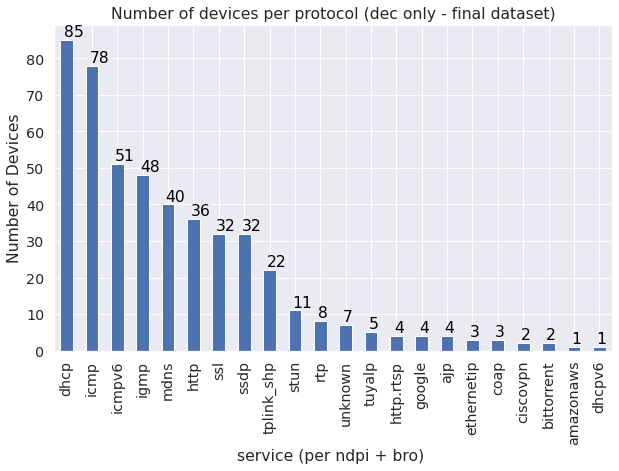

In [98]:
ax = merged_df_sorted.plot(kind='bar', rot=90, figsize=(10, 6), legend=False)
ax.set_xlabel('service (per ndpi + bro) ')
ax.set_ylabel('Number of Devices')
ax.set_title('Number of devices per protocol (dec only - final dataset)')

# Add the numbers on top of each bar
for i, v in enumerate(merged_df_sorted['device_name']):
    ax.text(i - 0.1, v + 1, str(v), color='black')

plt.show()

## Classification agreement comparison (without ndpi guessing)

In [63]:
df_ndpi_ng['first_seen'] = pd.to_datetime(df_ndpi_ng['first_seen'], unit='s')
df_ndpi_ng['last_seen'] = pd.to_datetime(df_ndpi_ng['last_seen'],  unit='s')

In [64]:
merged_df_ng = pd.merge(df_ndpi_ng, df_zeek, left_on=['src_ip', 'dst_ip', 'src_port', 'dst_port', 'device_name'], right_on=['id.orig_h', 'id.resp_h', 'id.orig_p', 'id.resp_p', 'device'], how='left')

In [65]:
merged_df_ng['ndpi_proto'] = merged_df_ng['ndpi_proto'].str.lower()
merged_df_ng['ndpi_proto_2'] = merged_df_ng['ndpi_proto'].replace('tls', 'ssl')
merged_df_ng['ndpi_proto_2'].fillna('unknown', inplace=True)
merged_df_ng['service'].fillna('unknown', inplace=True)

In [66]:
agreement_merged_df_ng = merged_df_ng[(merged_df_ng['ts'] >= merged_df_ng['first_seen']) & (merged_df_ng['ts'] <= merged_df_ng['last_seen'])]

In [67]:
agreement_merged_df_ng['classification_agreement'] = agreement_merged_df_ng['ndpi_proto_2'] == agreement_merged_df_ng['service']

/tmp/ipykernel_2200212/3270637601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agreement_merged_df_ng['classification_agreement'] = agreement_merged_df_ng['ndpi_proto_2'] == agreement_merged_df_ng['service']


In [68]:
agreement_merged_df_ng[['src_ip', 'dst_ip', 'src_port', 'dst_port', 'device_name', 'ts', 'first_seen', 'service', 'date', 'device', 'ndpi_proto_2']][agreement_merged_df_ng['classification_agreement'] == False]

,src_ip,dst_ip,src_port,dst_port,device_name,ts,first_seen,service,date,device,ndpi_proto_2
3,192.168.10.153,192.168.10.193,35211,10006,nest-camera,2022-12-29 00:12:27.125568000,2022-12-29 00:12:27.124999936,unknown,2022-12-28_15.59.06_192.168.10.153,nest-camera,stun
6,192.168.10.193,192.168.10.153,51566,8012,nest-camera,2022-12-28 22:29:57.923190016,2022-12-28 22:29:57.923000064,unknown,2022-12-28_15.59.06_192.168.10.153,nest-camera,ssl
7,192.168.10.193,192.168.10.153,51566,8012,nest-camera,2022-12-29 00:29:57.861731072,2022-12-28 22:29:57.923000064,unknown,2022-12-28_15.59.06_192.168.10.153,nest-camera,ssl
8,192.168.10.193,192.168.10.153,51566,8012,nest-camera,2022-12-29 01:27:44.368196096,2022-12-28 22:29:57.923000064,unknown,2022-12-28_15.59.06_192.168.10.153,nest-camera,ssl
17,192.168.10.228,192.168.10.153,44364,8012,nest-camera,2022-12-29 01:37:50.689785088,2022-12-29 01:27:44.360999936,unknown,2022-12-28_15.59.06_192.168.10.153,nest-camera,ssl
...,...,...,...,...,...,...,...,...,...,...,...
5625580,192.168.10.107,224.0.0.251,5353,5353,homepod,2022-12-24 07:36:56.727463936,2022-12-24 02:01:04.115000064,dns,2022-12-23_02.48.39_192.168.10.107,homepod,mdns
5625581,192.168.10.107,224.0.0.251,5353,5353,homepod,2022-12-24 07:42:24.857104896,2022-12-24 02:01:04.115000064,dns,2022-12-23_02.48.39_192.168.10.107,homepod,mdns
5625582,192.168.10.107,224.0.0.251,5353,5353,homepod,2022-12-24 07:43:10.819019008,2022-12-24 02:01:04.115000064,dns,2022-12-23_02.48.39_192.168.10.107,homepod,mdns
5625583,192.168.10.107,224.0.0.251,5353,5353,homepod,2022-12-24 07:45:57.012732928,2022-12-24 02:01:04.115000064,dns,2022-12-23_02.48.39_192.168.10.107,homepod,mdns


In [69]:
agreement_percentage = agreement_merged_df_ng['classification_agreement'].mean() * 100

print(f"Agreement Percentage: {agreement_percentage:.2f}%")

Agreement Percentage: 38.25%


In [47]:
merged_df_zeek = pd.merge(df_ndpi, df_zeek, left_on=['src_ip', 'dst_ip', 'src_port', 'dst_port', 'device_name'], right_on=['id.orig_h', 'id.resp_h', 'id.orig_p', 'id.resp_p', 'device'], how='right')

In [51]:
merged_df_zeek['ndpi_proto'].unique()

array(['MDNS', 'TLS', 'HTTP', nan, 'DHCP', 'SSDP', 'RTP', 'EthernetIP',
       'TPLINK_SHP', 'TuyaLP', 'STUN', 'CiscoVPN', 'HTTP.RTSP', 'AJP',
       'BitTorrent', 'COAP', 'DHCPV6'], dtype=object)

In [54]:
merged_df_zeek['ndpi_proto'] = merged_df_zeek['ndpi_proto'].str.lower()
merged_df_zeek['ndpi_proto_2'] = merged_df_zeek['ndpi_proto'].replace('tls', 'ssl')

In [55]:
merged_df_zeek['ndpi_proto_2'].fillna('unknown', inplace=True)
merged_df_zeek['service'].fillna('unknown', inplace=True)

In [56]:
agreement_merged_df_zeek = merged_df_zeek[(merged_df_zeek['ts'] >= merged_df_zeek['first_seen']) & (merged_df_zeek['ts'] <= merged_df_zeek['last_seen'])]

In [57]:
agreement_merged_df_zeek['classification_agreement'] = agreement_merged_df_zeek['ndpi_proto_2'] == agreement_merged_df_zeek['service']

/tmp/ipykernel_2200212/3663647714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agreement_merged_df_zeek['classification_agreement'] = agreement_merged_df_zeek['ndpi_proto_2'] == agreement_merged_df_zeek['service']


In [59]:
agreement_merged_df_zeek[['src_ip', 'dst_ip', 'src_port', 'dst_port', 'device_name', 'ts', 'first_seen', 'service', 'date', 'device', 'ndpi_proto_2']][agreement_merged_df_zeek['classification_agreement'] == False]

,src_ip,dst_ip,src_port,dst_port,device_name,ts,first_seen,service,date,device,ndpi_proto_2
3,fe80::271:47ff:fec0:9193,ff02::fb,5353,5353,echospot,2022-12-28 08:21:11.840646912,2022-12-28 08:21:11.840000000,dns,2022-12-28_03.21.11_192.168.10.201,echospot,mdns
9,192.168.10.201,224.0.0.251,5353,5353,echospot,2022-12-28 08:21:11.840352000,2022-12-28 08:21:11.840000000,dns,2022-12-28_03.21.11_192.168.10.201,echospot,mdns
16,192.168.10.201,224.0.0.251,5353,5353,echospot,2022-12-28 08:22:15.684484096,2022-12-28 08:21:11.840000000,dns,2022-12-28_03.21.11_192.168.10.201,echospot,mdns
22,fe80::271:47ff:fec0:9193,ff02::fb,5353,5353,echospot,2022-12-28 08:22:15.685094144,2022-12-28 08:21:11.840000000,dns,2022-12-28_03.21.11_192.168.10.201,echospot,mdns
33,192.168.10.201,224.0.0.251,5353,5353,echospot,2022-12-28 08:23:19.685369088,2022-12-28 08:21:11.840000000,dns,2022-12-28_03.21.11_192.168.10.201,echospot,mdns
...,...,...,...,...,...,...,...,...,...,...,...
6581718,192.168.10.133,192.168.10.118,39965,50000,amcrest-cam-wired,2022-12-27 19:42:00.222996992,2022-12-26 22:47:00.299000064,unknown,2022-12-26_15.10.23_192.168.10.133,amcrest-cam-wired,ssdp
6581726,192.168.10.133,192.168.10.238,39965,50000,amcrest-cam-wired,2022-12-27 19:43:10.841020160,2022-12-26 21:39:38.879000064,unknown,2022-12-26_15.10.23_192.168.10.133,amcrest-cam-wired,ssdp
6581753,192.168.10.133,192.168.10.100,39965,50000,amcrest-cam-wired,2022-12-27 19:52:12.810183168,2022-12-26 20:12:54.473999872,unknown,2022-12-26_15.10.23_192.168.10.133,amcrest-cam-wired,ssdp
6581762,192.168.10.133,192.168.10.148,39965,50000,amcrest-cam-wired,2022-12-27 19:53:27.513434880,2022-12-26 21:18:24.927000064,unknown,2022-12-26_15.10.23_192.168.10.133,amcrest-cam-wired,ssdp


In [60]:
agreement_percentage = agreement_merged_df_zeek['classification_agreement'].mean() * 100

print(f"Agreement Percentage: {agreement_percentage:.2f}%")

Agreement Percentage: 38.15%


In [35]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [42]:
cm = confusion_matrix(agreement_merged_df['ndpi_proto'], agreement_merged_df['service'])
precision = precision_score(agreement_merged_df['ndpi_proto_2'], agreement_merged_df['service'], average='weighted')
# recall = recall_score(merged_df['ndpi_proto'], merged_df['service'], average='weighted')
# f1 = f1_score(merged_df['ndpi_proto'], merged_df['service'], average='weighted')
# kappa = cohen_kappa_score(merged_df['ndpi_proto'], merged_df['service'])

/home/aniketh/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
precision

0.5570918670781064

In [46]:
df_zeek['service'].unique()

array(['dns', 'ssl', 'http', nan, 'dhcp'], dtype=object)